In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv('downloaded_from_mendeley/weaving_rejection_dataset - original.csv')

In [3]:
df.head()

,Construction,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Previous_pdn,Req_grey_fabric,Req_beam_length(yds),Total_Pdn(yds),Rejection,warp_count,weft_count,epi,ppi
0,40+40/2/40/110x80,31300.0,6.0,38286.9360,12.5,TOTAL,33297.872340,34797.651103,27646.0,285,double_40,80.0,110,80
1,40x40/110x90,10450.0,7.0,13057.5840,14.5,TOTAL,11236.559140,12017.350432,11019.0,39,40,40.0,110,90
2,40x40/110x80,900.0,11.5,1902.8640,12.5,TOTAL,1016.949153,1062.753843,1528.0,0,40,40.0,110,80
3,40x40/130x80,8000.0,8.0,10093.9280,14.0,TOTAL,8695.652174,9245.815159,8944.0,58,40,40.0,130,80
4,50x50/140x70,3500.0,8.1,69146.1408,9.1,TOTAL,3808.487486,3831.158751,59367.0,1043,50,50.0,140,70


In [4]:
df= df[['Req_Finish_Fabrics', 'Fabric_Allowance','Rec_Beam_length(yds)', 'Shrink_allow', 'Req_grey_fabric', 
    'Req_beam_length(yds)', 'warp_count',  'weft_count','epi', 'ppi', 'Rejection']]

In [5]:
df.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),warp_count,weft_count,epi,ppi,Rejection
0,31300.0,6.0,38286.9360,12.5,33297.872340,34797.651103,double_40,80.0,110,80,285
1,10450.0,7.0,13057.5840,14.5,11236.559140,12017.350432,40,40.0,110,90,39
2,900.0,11.5,1902.8640,12.5,1016.949153,1062.753843,40,40.0,110,80,0
3,8000.0,8.0,10093.9280,14.0,8695.652174,9245.815159,40,40.0,130,80,58
4,3500.0,8.1,69146.1408,9.1,3808.487486,3831.158751,50,50.0,140,70,1043


In [6]:
def resultant_count(x, y):
    return ((x*y)/(x+y))
    

In [7]:
def count_changer(x):
    if x== 'double_80':
        return 40
    elif x == 'double_40':
        return 20
    else:
        return int(x)

In [8]:
df['warp_count']= df['warp_count'].apply(lambda x: count_changer(x)  )

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22010 entries, 0 to 22009
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Req_Finish_Fabrics    22010 non-null  float64
 1   Fabric_Allowance      22010 non-null  float64
 2   Rec_Beam_length(yds)  22010 non-null  float64
 3   Shrink_allow          22010 non-null  float64
 4   Req_grey_fabric       22010 non-null  float64
 5   Req_beam_length(yds)  22010 non-null  float64
 6   warp_count            22010 non-null  int64  
 7   weft_count            22010 non-null  float64
 8   epi                   22010 non-null  int64  
 9   ppi                   22010 non-null  int64  
 10  Rejection             22010 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 1.8 MB


In [10]:
X = df.copy()
y = X.pop('Rejection')

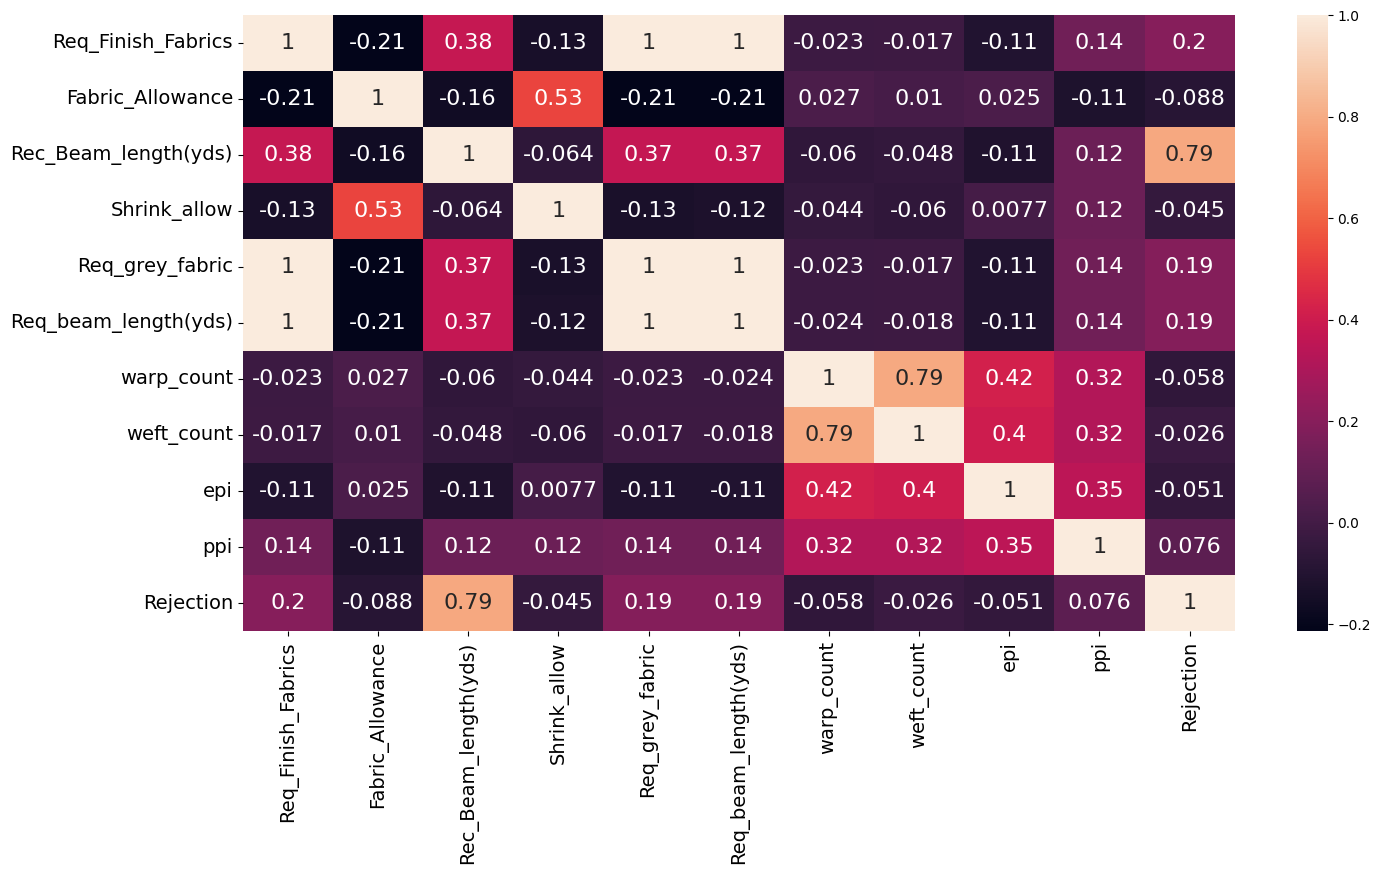

In [24]:
plt.figure(figsize=(16,8))
ax= sns.heatmap(df.corr(), annot=True, annot_kws={'fontsize':16})
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14);
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14);
# .setylabel(fontdict={'fontsize':13})

## PCA

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()
pca = PCA(n_components=10)

In [13]:
X_sc = sc.fit_transform(X)

In [14]:
X_sc = pd.DataFrame(X_sc, columns=X.columns)

In [15]:
X_pca = pd.DataFrame(pca.fit_transform(X_sc), columns=[f'PC_{i+1}' for i in range(10)])

In [16]:
eigen_vectors = pd.DataFrame(pca.components_.T, columns= X_pca.columns, index= X.columns) #eigen vectors

In [17]:
eigen_vectors
# ['eigen values']= pca.explained_variance_

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
Req_Finish_Fabrics,0.531431,0.025344,0.126188,0.146654,-0.107981,-0.018693,-0.005092,0.001009,-0.527562,-0.623818
Fabric_Allowance,-0.198928,-0.027830,0.646408,0.272344,0.145466,-0.243465,0.622198,0.007830,0.003060,-0.001352
Rec_Beam_length(yds),0.280781,-0.022505,0.027286,-0.520668,0.738638,-0.321046,-0.009908,-0.007405,0.001973,0.001562
Shrink_allow,-0.134653,-0.023564,0.717057,-0.175907,-0.029564,0.181413,-0.634227,0.008651,-0.009721,0.001120
Req_grey_fabric,0.531064,0.025291,0.127584,0.148752,-0.110004,-0.018628,-0.005289,0.000978,-0.276843,0.767990
Req_beam_length(yds),0.530570,0.024747,0.132909,0.146273,-0.111297,-0.015036,-0.015519,0.001922,0.803074,-0.145041
warp_count,-0.036585,0.569052,-0.015295,0.266065,0.269369,0.134182,-0.088342,-0.710949,0.000523,-0.000111
weft_count,-0.030101,0.566228,-0.031198,0.262237,0.288906,0.157037,-0.081608,0.702817,-0.000417,0.000141
epi,-0.087381,0.444577,0.005098,-0.165227,-0.403514,-0.763517,-0.145697,0.019512,0.000136,-0.000357
ppi,0.087325,0.392666,0.127050,-0.626020,-0.278176,0.422134,0.417782,-0.004852,0.000705,0.000362


In [334]:
pca.explained_variance_ratio_

array([3.35239719e-01, 2.33715947e-01, 1.42788513e-01, 9.07606539e-02,
       7.79031339e-02, 6.04753996e-02, 3.85483380e-02, 2.05138669e-02,
       5.10460115e-05, 3.38230262e-06])

In [18]:
eigen_vectors.loc['eigen values'] = [3.35254951e+00, 2.33726566e+00, 1.42795001e+00, 9.07647777e-01,
       7.79066735e-01, 6.04781474e-01, 3.85500895e-01, 2.05147990e-01,
       5.10483308e-04, 3.38245630e-05]
eigen_vectors.loc['explained_variance_ratio'] = pca.explained_variance_ratio_

# = pca.explained_variance_
# ('Eigen Values')
# =['Eigen values'
# = (pca.explained_variance_).T

In [19]:
eigen_vectors

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
Req_Finish_Fabrics,0.531431,0.025344,0.126188,0.146654,-0.107981,-0.018693,-0.005092,0.001009,-0.527562,-0.623818
Fabric_Allowance,-0.198928,-0.027830,0.646408,0.272344,0.145466,-0.243465,0.622198,0.007830,0.003060,-0.001352
Rec_Beam_length(yds),0.280781,-0.022505,0.027286,-0.520668,0.738638,-0.321046,-0.009908,-0.007405,0.001973,0.001562
Shrink_allow,-0.134653,-0.023564,0.717057,-0.175907,-0.029564,0.181413,-0.634227,0.008651,-0.009721,0.001120
Req_grey_fabric,0.531064,0.025291,0.127584,0.148752,-0.110004,-0.018628,-0.005289,0.000978,-0.276843,0.767990
Req_beam_length(yds),0.530570,0.024747,0.132909,0.146273,-0.111297,-0.015036,-0.015519,0.001922,0.803074,-0.145041
warp_count,-0.036585,0.569052,-0.015295,0.266065,0.269369,0.134182,-0.088342,-0.710949,0.000523,-0.000111
weft_count,-0.030101,0.566228,-0.031198,0.262237,0.288906,0.157037,-0.081608,0.702817,-0.000417,0.000141
epi,-0.087381,0.444577,0.005098,-0.165227,-0.403514,-0.763517,-0.145697,0.019512,0.000136,-0.000357
ppi,0.087325,0.392666,0.127050,-0.626020,-0.278176,0.422134,0.417782,-0.004852,0.000705,0.000362


In [ ]:
# PC1 = > Required Finish fabrics 53%, 

In [240]:
pca.explained_variance_ #eigen values

array([3.35254951e+00, 2.33726566e+00, 1.42795001e+00, 9.07647777e-01,
       7.79066735e-01, 6.04781474e-01, 3.85500895e-01, 2.05147990e-01,
       5.10483308e-04, 3.38245630e-05])

In [22]:
pca.explained_variance_ratio_

array([0.33523972, 0.23371595, 0.14278851, 0.09076065, 0.07790313,
       0.0604754 ])

In [315]:
0.33523972 + 0.23371595+ 0.14278851+ 0.09076065,

(0.8025048300000001,)

In [312]:
pca.explained_variance_ratio_

array([3.35239719e-01, 2.33715947e-01, 1.42788513e-01, 9.07606539e-02,
       7.79031339e-02, 6.04753996e-02, 3.85483380e-02, 2.05138669e-02,
       5.10460115e-05, 3.38230262e-06])

In [316]:
3.35239719e-01+ 2.33715947e-01+ 1.42788513e-01+ 9.07606539e-02 + 7.79031339e-02 + 6.04753996e-02

0.9408833664000001

In [20]:
evr = pca.explained_variance_ratio_ #explained_variance_ratio = eigen_value/ sum(eigen_value)
n= pca.n_components_

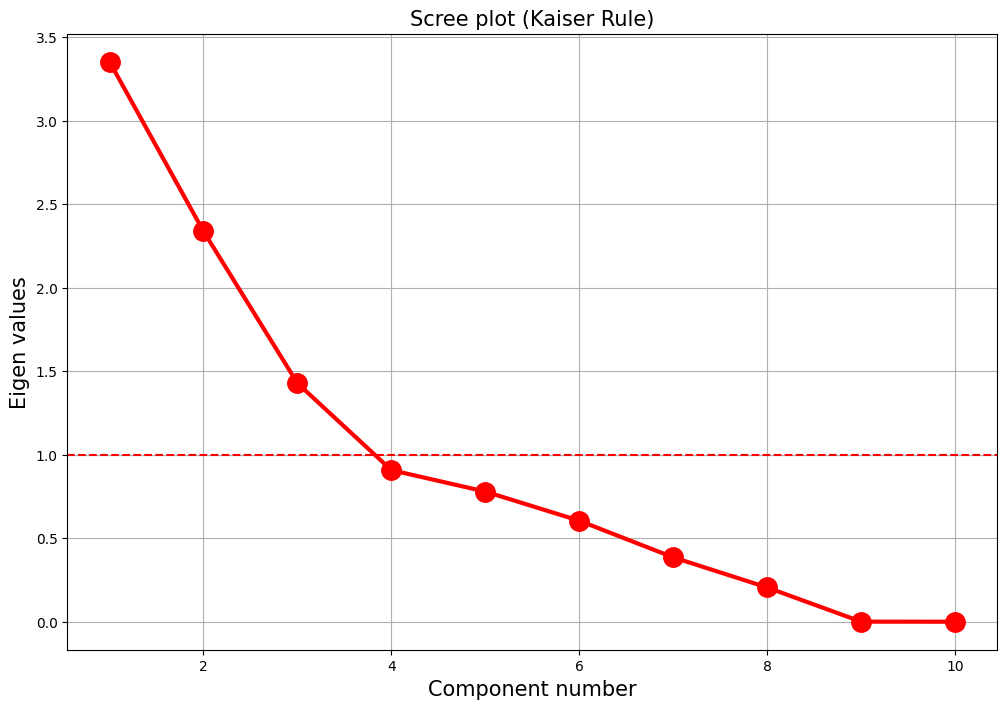

In [27]:
n= pca.n_components_
var = pca.explained_variance_
plt.figure(figsize=(12,8))
plt.plot(np.arange(1, n+1), var , 'ro-',linewidth=3,  markersize=14 )
plt.title('Scree plot (Kaiser Rule)', fontsize=15)
plt.xlabel('Component number', fontsize=15)
plt.ylabel('Eigen values', fontsize=15)
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()

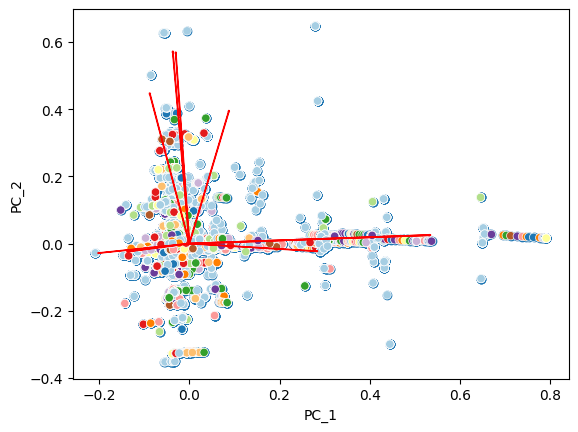

In [216]:
xs = 1/(X_pca['PC_1'].max()- X_pca['PC_1'].min())
ys = 1/(X_pca['PC_2'].max()- X_pca['PC_2'].min())
plt.scatter(X_pca['PC_1']*xs, X_pca['PC_2']*ys)
sns.scatterplot(x=X_pca['PC_1']*xs, y=X_pca['PC_2']*ys, hue=y,  palette='Paired', legend=False)
for i in range(eigen_values.shape[0]):
    plt.arrow(0,0, eigen_values[i,0], eigen_values[i,1], color='r')

In [114]:
eigen_vectors = pd.DataFrame(pca.components_.T, columns= X_pca.columns, index= X.columns) #eigen vectors

# Feature engineering and Feature selection

In [341]:
selected_cols = ['Req_Finish_Fabrics', 'warp_count', 'epi', 'ppi', 'Fabric_Allowance', 'Rejection']

In [342]:
df_after_pca = df[selected_cols]

In [344]:
df_after_pca['Req_FF_2_allownace'] = df_after_pca['Req_Finish_Fabrics']- df_after_pca['Fabric_Allowance'] 

C:\Users\Toufique\AppData\Local\Temp\ipykernel_5416\2863367761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_pca['Req_FF_2_allownace'] = df_after_pca['Req_Finish_Fabrics']- df_after_pca['Fabric_Allowance']


In [345]:
df_after_pca.head()

,Req_Finish_Fabrics,warp_count,epi,ppi,Fabric_Allowance,Rejection,Req_FF_2_allownace
0,31300.0,20,110,80,6.0,285,31294.0
1,10450.0,40,110,90,7.0,39,10443.0
2,900.0,40,110,80,11.5,0,888.5
3,8000.0,40,130,80,8.0,58,7992.0
4,3500.0,50,140,70,8.1,1043,3491.9


In [346]:
X = df_after_pca.copy()
y = X.pop('Rejection')

In [347]:
from sklearn.model_selection import train_test_split

In [348]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [349]:
from sklearn.preprocessing import StandardScaler

In [350]:
sc  = StandardScaler()

In [351]:
X_train_sc  = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns )

In [352]:
X_train_sc.index = X_train.index

In [353]:
X_test_sc  = pd.DataFrame(sc.transform(X_test), columns=X_test.columns )

In [354]:
X_test_sc.index = X_test.index

In [355]:
X_train_sc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17608 entries, 2569 to 2732
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Req_Finish_Fabrics  17608 non-null  float64
 1   warp_count          17608 non-null  float64
 2   epi                 17608 non-null  float64
 3   ppi                 17608 non-null  float64
 4   Fabric_Allowance    17608 non-null  float64
 5   Req_FF_2_allownace  17608 non-null  float64
dtypes: float64(6)
memory usage: 962.9 KB


In [31]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import lightgbm
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score

In [357]:
#models
models = {'light_gbm': lightgbm.LGBMRegressor(), 'rnf': RandomForestRegressor() , 'cat': CatBoostRegressor(), 
          'xgboost': XGBRegressor(), 'lr': LinearRegression(), 'laso': Lasso(), 'elastonet': ElasticNet(),
         'elastonet_cv': ElasticNetCV(), 'ridge': Ridge(), 'decision_tree': DecisionTreeRegressor(),
          'knn': KNeighborsRegressor(), 'adaboost': AdaBoostRegressor(), 'svm': SVR()   } 

In [358]:
cv_scores ={}

for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_restults = cross_val_score(model, X_train, y_train, cv = kfold, error_score='raise')
    cv_scores[name] = cv_restults 
    

C:\Users\Toufique\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 15847, number of used features: 6
[LightGBM] [Info] Start training from score 55.098441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000674 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 15847, number of used features: 6
[LightGBM] [Info] Start training from score 55.797122
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000456 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1

C:\Users\Toufique\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Toufique\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Learning rate set to 0.063354
0:	learn: 156.9154360	total: 5.95ms	remaining: 5.95s
1:	learn: 154.9504034	total: 10.7ms	remaining: 5.33s
2:	learn: 153.1841319	total: 15.7ms	remaining: 5.22s
3:	learn: 151.6719520	total: 20.7ms	remaining: 5.16s
4:	learn: 150.0680505	total: 25.3ms	remaining: 5.04s
5:	learn: 148.8820919	total: 30.1ms	remaining: 4.99s
6:	learn: 147.7307745	total: 35.5ms	remaining: 5.03s
7:	learn: 146.4261531	total: 40ms	remaining: 4.96s
8:	learn: 144.7261205	total: 44.3ms	remaining: 4.88s
9:	learn: 143.7199248	total: 49.2ms	remaining: 4.87s
10:	learn: 142.7834056	total: 53.9ms	remaining: 4.84s
11:	learn: 142.0760469	total: 58.3ms	remaining: 4.8s
12:	learn: 141.2886862	total: 63.1ms	remaining: 4.79s
13:	learn: 140.1760113	total: 68ms	remaining: 4.79s
14:	learn: 138.9520063	total: 72.6ms	remaining: 4.76s
15:	learn: 137.6841663	total: 77.3ms	remaining: 4.75s
16:	learn: 136.6269930	total: 82.2ms	remaining: 4.75s
17:	learn: 136.1082376	total: 86.6ms	remaining: 4.72s
18:	learn: 13

C:\Users\Toufique\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Toufique\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Toufique\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Toufique\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.786e

In [ ]:
#pca engineered data results

In [359]:
df_after_pca_engineered = pd.DataFrame(cv_scores.values())

In [360]:
df_after_pca_engineered['models'] = cv_scores.keys()

In [361]:
df_after_pca_engineered['average_score']= df_after_pca_engineered.loc[:, 0:9].mean(axis=1)

In [362]:
df_after_pca_engineered

,0,1,2,3,4,5,6,7,8,9,models,average_score
0,0.723953,0.636641,0.717926,0.708526,0.667755,0.725469,0.721774,0.515779,0.698267,0.738800,light_gbm,0.685489
1,0.780182,0.705589,0.762972,0.802923,0.740602,0.791969,0.768755,0.586501,0.795065,0.779153,rnf,0.751371
2,0.754662,0.688443,0.731229,0.771691,0.711772,0.769125,0.758443,0.562192,0.761265,0.765320,cat,0.727414
3,0.758153,0.711481,0.753729,0.779509,0.713503,0.766482,0.765756,0.587146,0.748837,0.773442,xgboost,0.735804
4,0.049853,0.018758,0.068566,0.041663,0.026967,0.086944,0.049986,0.050033,0.047926,0.062061,lr,0.050276
5,0.050859,0.018338,0.068567,0.041722,0.026866,0.087195,0.049884,0.049828,0.047885,0.061835,laso,0.050298
6,0.050853,0.018318,0.068569,0.041714,0.026880,0.087218,0.049868,0.049843,0.047883,0.061828,elastonet,0.050298
7,0.041808,0.007073,0.062225,0.035062,0.014872,0.079486,0.037444,0.041662,0.035930,0.050519,elastonet_cv,0.040608
8,0.050916,0.018385,0.068531,0.041663,0.026860,0.087083,0.049962,0.049782,0.047891,0.061895,ridge,0.050297
9,0.777557,0.707269,0.764573,0.806229,0.742366,0.788138,0.761438,0.593004,0.798166,0.781675,decision_tree,0.752041


In [ ]:
# PCs added to the df_after_pca_engineered 

In [363]:
X.head()

,Req_Finish_Fabrics,warp_count,epi,ppi,Fabric_Allowance,Req_FF_2_allownace
0,31300.0,20,110,80,6.0,31294.0
1,10450.0,40,110,90,7.0,10443.0
2,900.0,40,110,80,11.5,888.5
3,8000.0,40,130,80,8.0,7992.0
4,3500.0,50,140,70,8.1,3491.9


In [367]:
pca= PCA()

In [368]:
X_pca_engineered = pca.fit_transform(X.iloc[:, :-1])

In [372]:
X_pca_engineered_df= pd.DataFrame(X_pca_engineered, columns=[f"PC_{i+1}" for i in range(5)])

In [374]:
X_selected_with_pca = X.join(X_pca_engineered_df)

In [378]:
X_selected_with_pca.head()

,Req_Finish_Fabrics,warp_count,epi,ppi,Fabric_Allowance,Req_FF_2_allownace,PC_1,PC_2,PC_3,PC_4,PC_5
0,31300.0,20,110,80,6.0,31294.0,21456.178490,13.350333,-3.385064,-18.081351,-1.530733
1,10450.0,40,110,90,7.0,10443.0,606.179007,7.083438,10.811633,-1.296319,-1.530297
2,900.0,40,110,80,11.5,888.5,-8943.821690,10.656963,2.141426,1.109425,2.103143
3,8000.0,40,130,80,8.0,7992.0,-1843.823112,-8.279957,-5.125756,-2.008163,-1.259576
4,3500.0,50,140,70,8.1,3491.9,-6343.824505,-16.431381,-15.765006,8.319177,-2.346487


In [379]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_with_pca,y,test_size=0.2, random_state=0)

In [28]:
cv_scores ={}

for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_restults = cross_val_score(model, X_train, y_train, cv = kfold, error_score='raise')
    cv_scores[name] = cv_restults 
    

In [381]:
df_after_pca_engineered = pd.DataFrame(cv_scores.values())

In [382]:
df_after_pca_engineered['models'] = cv_scores.keys()

In [383]:
df_after_pca_engineered['average_score']= df_after_pca_engineered.loc[:, 0:9].mean(axis=1)

In [384]:
df_after_pca_engineered

,0,1,2,3,4,5,6,7,8,9,models,average_score
0,0.759067,0.674004,0.751823,0.746960,0.723365,0.770476,0.747166,0.552433,0.761258,0.766119,light_gbm,0.725267
1,0.774249,0.701465,0.764633,0.801561,0.743229,0.797092,0.769779,0.596540,0.793486,0.778052,rnf,0.752008
2,0.774032,0.701249,0.759669,0.797755,0.738393,0.786920,0.767253,0.584794,0.790150,0.777375,cat,0.747759
3,0.777366,0.706400,0.763487,0.804790,0.741502,0.789786,0.769753,0.592376,0.779899,0.781981,xgboost,0.750734
4,0.050874,0.018679,0.068497,0.041438,0.027124,0.087115,0.049975,0.049867,0.048027,0.062024,lr,0.050362
5,0.050864,0.018332,0.068564,0.041716,0.026866,0.087193,0.049890,0.049825,0.047887,0.061840,laso,0.050298
6,0.050872,0.018337,0.068560,0.041703,0.026873,0.087183,0.049898,0.049825,0.047888,0.061848,elastonet,0.050299
7,0.041808,0.007095,0.062225,0.035062,0.014872,0.079486,0.037444,0.041667,0.035930,0.050519,elastonet_cv,0.040611
8,0.050916,0.018385,0.068531,0.041663,0.026860,0.087083,0.049962,0.049782,0.047891,0.061895,ridge,0.050297
9,0.779319,0.705101,0.764618,0.806529,0.740419,0.793330,0.769151,0.592990,0.797016,0.782467,decision_tree,0.753094


# PCs of original dataset added to the selected df

In [11]:
X.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),warp_count,weft_count,epi,ppi
0,31300.0,6.0,38286.9360,12.5,33297.872340,34797.651103,20,80.0,110,80
1,10450.0,7.0,13057.5840,14.5,11236.559140,12017.350432,40,40.0,110,90
2,900.0,11.5,1902.8640,12.5,1016.949153,1062.753843,40,40.0,110,80
3,8000.0,8.0,10093.9280,14.0,8695.652174,9245.815159,40,40.0,130,80
4,3500.0,8.1,69146.1408,9.1,3808.487486,3831.158751,50,50.0,140,70


In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=6)

In [18]:
pca_df = pd.DataFrame(pca.fit_transform(X,y), columns= [f'PC{i+1}' for i in range(6)])

In [ ]:
selected_cols = ['Req_Finish_Fabrics', 'warp_count', 'epi', 'ppi', 'Fabric_Allowance'] #based on PCA analysis

In [25]:
X_selected_with_pca = X[selected_cols].join(pca_df)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_with_pca,y,test_size=0.2, random_state=0)

In [34]:
#models
models = {'light_gbm': lightgbm.LGBMRegressor(), 'rnf': RandomForestRegressor() , 'cat': CatBoostRegressor(), 
          'xgboost': XGBRegressor(), 'lr': LinearRegression(), 'laso': Lasso(), 'elastonet': ElasticNet(),
         'elastonet_cv': ElasticNetCV(), 'ridge': Ridge(), 'decision_tree': DecisionTreeRegressor(),
          'knn': KNeighborsRegressor(), 'adaboost': AdaBoostRegressor(), 'svm': SVR()   } 

In [29]:
cv_scores ={}

for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_restults = cross_val_score(model, X_train, y_train, cv = kfold, error_score='raise')
    cv_scores[name] = cv_restults 
    

In [37]:
cv_scores_pca_with_selected_cols = pd.DataFrame(cv_scores.values())

In [38]:
cv_scores_pca_with_selected_cols['models'] = cv_scores.keys()

In [39]:
cv_scores_pca_with_selected_cols['average_score']= cv_scores_pca_with_selected_cols.loc[:, 0:9].mean(axis=1)

In [40]:
cv_scores_pca_with_selected_cols

,0,1,2,3,4,5,6,7,8,9,models,average_score
0,0.941797,0.907129,0.939108,0.897652,0.902765,0.921117,0.914043,0.940377,0.929751,0.945895,light_gbm,0.923963
1,0.953153,0.922381,0.946678,0.934551,0.917899,0.930203,0.927513,0.940929,0.960665,0.960380,rnf,0.939435
2,0.951705,0.917712,0.941814,0.928466,0.892715,0.927534,0.926643,0.942359,0.966559,0.945627,cat,0.934113
3,0.939493,0.919955,0.942515,0.910093,0.920473,0.931242,0.887582,0.956338,0.972980,0.957395,xgboost,0.933807
4,0.649067,0.648064,0.633809,0.616255,0.649194,0.660940,0.689265,0.690611,0.599952,0.631880,lr,0.646904
5,0.649167,0.648084,0.633581,0.615975,0.648734,0.660632,0.689410,0.692149,0.599720,0.631856,laso,0.646931
6,0.649176,0.648080,0.633544,0.615929,0.648679,0.660611,0.689404,0.692165,0.599682,0.631836,elastonet,0.646911
7,0.638157,0.633438,0.621000,0.604498,0.638754,0.662963,0.681186,0.683360,0.589592,0.621076,elastonet_cv,0.637402
8,0.649166,0.648057,0.633673,0.616212,0.649054,0.660572,0.689418,0.691936,0.599976,0.631903,ridge,0.646997
9,0.951539,0.921511,0.945755,0.934615,0.918418,0.929276,0.919059,0.946387,0.963548,0.958343,decision_tree,0.938845


# Feature engineering with X_selected_with_pca

In [54]:
X_selected_with_pca.head()

,Req_Finish_Fabrics,warp_count,epi,ppi,Fabric_Allowance,PC1,PC2,PC3,PC4,PC5,PC6
0,31300.0,20,110,80,6.0,45961.920830,16948.422354,-214.108539,-243.074493,1.915199,10.278018
1,10450.0,40,110,90,7.0,2374.946269,3649.547370,193.404067,-53.918791,6.572849,8.403343
2,900.0,40,110,80,11.5,-17841.805353,-1946.826176,11.469735,12.239809,10.736031,3.246909
3,8000.0,40,130,80,8.0,-2773.074306,2095.779192,149.741867,18.131930,-7.602887,-6.711211
4,3500.0,50,140,70,8.1,5939.995318,61126.822026,5.240435,137.025133,-20.596911,-9.993930


In [55]:
X_selected_with_pca['FE1']  = X_selected_with_pca['Req_Finish_Fabrics']-X_selected_with_pca['Fabric_Allowance']
X_selected_with_pca['FE2']  = X_selected_with_pca['Req_Finish_Fabrics']/X_selected_with_pca['Fabric_Allowance']

In [66]:
X_selected_with_pca.head()

,Req_Finish_Fabrics,warp_count,epi,ppi,Fabric_Allowance,PC1,PC2,PC3,PC4,PC5,PC6,FE1,FE2
0,31300.0,20,110,80,6.0,45961.920830,16948.422354,-214.108539,-243.074493,1.915199,10.278018,31294.0,5216.666667
1,10450.0,40,110,90,7.0,2374.946269,3649.547370,193.404067,-53.918791,6.572849,8.403343,10443.0,1492.857143
2,900.0,40,110,80,11.5,-17841.805353,-1946.826176,11.469735,12.239809,10.736031,3.246909,888.5,78.260870
3,8000.0,40,130,80,8.0,-2773.074306,2095.779192,149.741867,18.131930,-7.602887,-6.711211,7992.0,1000.000000
4,3500.0,50,140,70,8.1,5939.995318,61126.822026,5.240435,137.025133,-20.596911,-9.993930,3491.9,432.098765


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_with_pca,y,test_size=0.2, random_state=0)

In [68]:
X_train.head(2)

,Req_Finish_Fabrics,warp_count,epi,ppi,Fabric_Allowance,PC1,PC2,PC3,PC4,PC5,PC6,FE1,FE2
2569,250.0,40,110,90,22.0,-19399.309004,-3067.709258,47.786787,6.997443,7.727492,9.603318,228.0,11.363636
2976,100.0,40,100,70,37.2,-19754.481193,-3201.143088,16.031421,12.054683,22.828440,1.401242,62.8,2.688172


In [69]:
#models
models = {'light_gbm': lightgbm.LGBMRegressor(), 'rnf': RandomForestRegressor() , 'cat': CatBoostRegressor(), 
          'xgboost': XGBRegressor(), 'lr': LinearRegression(), 'laso': Lasso(), 'elastonet': ElasticNet(),
         'elastonet_cv': ElasticNetCV(), 'ridge': Ridge(), 'decision_tree': DecisionTreeRegressor(),
          'knn': KNeighborsRegressor(), 'adaboost': AdaBoostRegressor(), 'svm': SVR()   } 

In [30]:
cv_scores ={}

for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_restults = cross_val_score(model, X_train, y_train, cv = kfold, error_score='raise')
    cv_scores[name] = cv_restults 
    

In [71]:
CV_score_X_selected_with_pca = pd.DataFrame(cv_scores.values())

In [72]:
CV_score_X_selected_with_pca['models'] = cv_scores.keys()

In [73]:
CV_score_X_selected_with_pca['average_score']= CV_score_X_selected_with_pca.loc[:, 0:9].mean(axis=1)

In [74]:
CV_score_X_selected_with_pca

,0,1,2,3,4,5,6,7,8,9,models,average_score
0,0.940489,0.907176,0.939486,0.897785,0.903779,0.921288,0.914354,0.940477,0.930688,0.945912,light_gbm,0.924143
1,0.955077,0.923779,0.946845,0.933606,0.918965,0.929467,0.927775,0.938790,0.960127,0.960058,rnf,0.939449
2,0.951517,0.918109,0.941508,0.928350,0.893584,0.927766,0.930026,0.943149,0.966428,0.955210,cat,0.935565
3,0.938877,0.920498,0.942373,0.911391,0.920518,0.931283,0.885815,0.955961,0.971837,0.959209,xgboost,0.933776
4,0.650971,0.648328,0.635564,0.615947,0.646160,0.660615,0.689458,0.688164,0.600204,0.634433,lr,0.646984
5,0.649736,0.648304,0.634164,0.616088,0.647982,0.660653,0.689570,0.691438,0.599926,0.632661,laso,0.647052
6,0.649751,0.648301,0.634133,0.616046,0.647928,0.660631,0.689567,0.691445,0.599894,0.632652,elastonet,0.647035
7,0.638157,0.633438,0.621000,0.604498,0.638754,0.662979,0.681186,0.683360,0.589592,0.621076,elastonet_cv,0.637404
8,0.650805,0.648226,0.635385,0.615921,0.646100,0.660396,0.689417,0.688912,0.600040,0.634311,ridge,0.646951
9,0.951522,0.921001,0.946219,0.934529,0.919301,0.932448,0.930796,0.946268,0.963790,0.959150,decision_tree,0.940502


# X_selected_with_pca with first 4 PCS

In [76]:
X_selected_cols_selcted_pca_fe = X_selected_with_pca.drop(['PC5', 'PC5', 'PC6'],axis=1)

In [78]:
X_selected_cols_selcted_pca_fe.head()

,Req_Finish_Fabrics,warp_count,epi,ppi,Fabric_Allowance,PC1,PC2,PC3,PC4,FE1,FE2
0,31300.0,20,110,80,6.0,45961.920830,16948.422354,-214.108539,-243.074493,31294.0,5216.666667
1,10450.0,40,110,90,7.0,2374.946269,3649.547370,193.404067,-53.918791,10443.0,1492.857143
2,900.0,40,110,80,11.5,-17841.805353,-1946.826176,11.469735,12.239809,888.5,78.260870
3,8000.0,40,130,80,8.0,-2773.074306,2095.779192,149.741867,18.131930,7992.0,1000.000000
4,3500.0,50,140,70,8.1,5939.995318,61126.822026,5.240435,137.025133,3491.9,432.098765


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols_selcted_pca_fe,y,test_size=0.2, random_state=0)

In [31]:
cv_scores ={}

for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_restults = cross_val_score(model, X_train, y_train, cv = kfold, error_score='raise')
    cv_scores[name] = cv_restults 
    

In [84]:
CV_score_X_selected_cols_sel_pca_fe = pd.DataFrame(cv_scores.values())

In [85]:
CV_score_X_selected_cols_sel_pca_fe['models'] = cv_scores.keys()

In [86]:
CV_score_X_selected_cols_sel_pca_fe['average_score']= CV_score_X_selected_cols_sel_pca_fe.loc[:, 0:9].mean(axis=1)

In [87]:
CV_score_X_selected_cols_sel_pca_fe

,0,1,2,3,4,5,6,7,8,9,models,average_score
0,0.938892,0.899558,0.938238,0.890578,0.901663,0.921491,0.908509,0.936339,0.925343,0.939279,light_gbm,0.919989
1,0.956010,0.920493,0.945338,0.932639,0.920742,0.929472,0.930649,0.939487,0.961442,0.955810,rnf,0.939208
2,0.928724,0.917854,0.929358,0.930024,0.907329,0.924812,0.924130,0.909392,0.932535,0.934228,cat,0.923839
3,0.911384,0.903306,0.926130,0.911091,0.938292,0.901698,0.921633,0.928557,0.942137,0.958843,xgboost,0.924307
4,0.650632,0.647718,0.635228,0.615588,0.645395,0.660095,0.689255,0.689198,0.599467,0.634185,lr,0.646676
5,0.649488,0.647263,0.633370,0.614805,0.646522,0.659838,0.688869,0.690594,0.598718,0.631984,laso,0.646145
6,0.649501,0.647269,0.633367,0.614809,0.646518,0.659830,0.688875,0.690593,0.598708,0.631999,elastonet,0.646147
7,0.638157,0.633438,0.621000,0.604498,0.638754,0.662979,0.681186,0.683360,0.589592,0.621076,elastonet_cv,0.637404
8,0.650737,0.647177,0.634640,0.614409,0.644262,0.659594,0.688747,0.688094,0.598543,0.633905,ridge,0.646011
9,0.949426,0.920558,0.946669,0.935170,0.921035,0.926648,0.937323,0.947564,0.966112,0.953819,decision_tree,0.940432


# X_selected_with_pca with first 2 PCS

In [90]:
X_selected_cols_selcted_2_pca = X_selected_with_pca.drop(['PC3','PC4', 'PC5', 'PC5', 'PC6', 'FE1', 'FE2'],axis=1)

In [92]:
X_selected_cols_selcted_2_pca.head()

,Req_Finish_Fabrics,warp_count,epi,ppi,Fabric_Allowance,PC1,PC2
0,31300.0,20,110,80,6.0,45961.920830,16948.422354
1,10450.0,40,110,90,7.0,2374.946269,3649.547370
2,900.0,40,110,80,11.5,-17841.805353,-1946.826176
3,8000.0,40,130,80,8.0,-2773.074306,2095.779192
4,3500.0,50,140,70,8.1,5939.995318,61126.822026


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols_selcted_2_pca,y,test_size=0.2, random_state=0)

In [32]:
cv_scores ={}

for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_restults = cross_val_score(model, X_train, y_train, cv = kfold, error_score='raise')
    cv_scores[name] = cv_restults 
    

In [96]:
CV_score_X_selected_cols_sel_2_pca = pd.DataFrame(cv_scores.values())

In [97]:
CV_score_X_selected_cols_sel_2_pca['models'] = cv_scores.keys()

In [98]:
CV_score_X_selected_cols_sel_2_pca['average_score']= CV_score_X_selected_cols_sel_2_pca.loc[:, 0:9].mean(axis=1)

In [99]:
CV_score_X_selected_cols_sel_2_pca

,0,1,2,3,4,5,6,7,8,9,models,average_score
0,0.919261,0.889817,0.931401,0.886899,0.883605,0.918900,0.912612,0.933985,0.915241,0.932584,light_gbm,0.912430
1,0.953765,0.922490,0.947544,0.931821,0.921292,0.929505,0.915334,0.938075,0.960254,0.958661,rnf,0.937874
2,0.927503,0.915922,0.927244,0.925641,0.905476,0.922455,0.923003,0.909171,0.929966,0.921487,cat,0.920787
3,0.889539,0.907131,0.920629,0.890591,0.937194,0.896258,0.934449,0.926669,0.942346,0.957374,xgboost,0.920218
4,0.640571,0.634659,0.622556,0.605948,0.640019,0.663853,0.683375,0.685431,0.589026,0.623418,lr,0.638886
5,0.639731,0.635807,0.621688,0.605983,0.640692,0.664812,0.683278,0.686195,0.589244,0.622399,laso,0.638983
6,0.639739,0.635812,0.621690,0.605983,0.640690,0.664807,0.683280,0.686196,0.589232,0.622410,elastonet,0.638984
7,0.636787,0.632905,0.619490,0.603394,0.638389,0.663579,0.680371,0.683036,0.588479,0.619452,elastonet_cv,0.636588
8,0.640571,0.634659,0.622556,0.605948,0.640019,0.663853,0.683375,0.685431,0.589026,0.623418,ridge,0.638886
9,0.954219,0.919630,0.944038,0.931715,0.920055,0.928541,0.910505,0.946687,0.967097,0.954810,decision_tree,0.937730


# with scaling 

In [100]:
X_selected_cols_selcted_2_pca_sc = X_selected_with_pca.drop(['PC3','PC4', 'PC5', 'PC5', 'PC6', 'FE1'],axis=1)

In [103]:
X_selected_cols_selcted_2_pca_sc.head()

,Req_Finish_Fabrics,warp_count,epi,ppi,Fabric_Allowance,PC1,PC2,FE2
0,31300.0,20,110,80,6.0,45961.920830,16948.422354,5216.666667
1,10450.0,40,110,90,7.0,2374.946269,3649.547370,1492.857143
2,900.0,40,110,80,11.5,-17841.805353,-1946.826176,78.260870
3,8000.0,40,130,80,8.0,-2773.074306,2095.779192,1000.000000
4,3500.0,50,140,70,8.1,5939.995318,61126.822026,432.098765


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols_selcted_2_pca_sc,y,test_size=0.2, random_state=0)

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
sc = StandardScaler()

In [108]:
X_train_sc = pd.DataFrame(sc.fit_transform(X_train), columns= X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test), columns= X_test.columns)
X_train_sc.index = X_train.index
X_test_sc.index = X_test.index


In [33]:
cv_scores ={}

for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_restults = cross_val_score(model, X_train_sc, y_train, cv = kfold, error_score='raise')
    cv_scores[name] = cv_restults 
    

In [111]:
CV_score_X_selected_cols_sel_2_pca_sc = pd.DataFrame(cv_scores.values())

In [112]:
CV_score_X_selected_cols_sel_2_pca_sc['models'] = cv_scores.keys()

In [113]:
CV_score_X_selected_cols_sel_2_pca_sc['average_score']= CV_score_X_selected_cols_sel_2_pca_sc.loc[:, 0:9].mean(axis=1)

In [114]:
CV_score_X_selected_cols_sel_2_pca_sc

,0,1,2,3,4,5,6,7,8,9,models,average_score
0,0.916739,0.876397,0.934034,0.904758,0.882364,0.918993,0.916708,0.934616,0.915883,0.930316,light_gbm,0.913081
1,0.953852,0.922562,0.944773,0.931103,0.920230,0.929373,0.922999,0.939679,0.961913,0.958461,rnf,0.938495
2,0.927965,0.915793,0.928892,0.926931,0.906111,0.921997,0.923091,0.908755,0.929128,0.931683,cat,0.922035
3,0.889316,0.907412,0.918403,0.889191,0.937856,0.896206,0.936685,0.928098,0.943318,0.958178,xgboost,0.920466
4,0.645855,0.644639,0.629338,0.613005,0.648285,0.660667,0.687826,0.692321,0.596463,0.626715,lr,0.644511
5,0.637437,0.635180,0.620698,0.605417,0.639793,0.666672,0.681970,0.685770,0.591418,0.621882,laso,0.638624
6,0.538736,0.563768,0.540874,0.537591,0.552416,0.623529,0.596019,0.614680,0.580374,0.565312,elastonet,0.571330
7,0.619851,0.626750,0.608425,0.596910,0.624106,0.670021,0.669994,0.679104,0.606431,0.620187,elastonet_cv,0.632178
8,0.642606,0.642735,0.625441,0.611021,0.647439,0.665157,0.687136,0.691659,0.594281,0.624112,ridge,0.643159
9,0.949889,0.920484,0.944216,0.929848,0.920672,0.929553,0.909976,0.946624,0.964291,0.954795,decision_tree,0.937035


# PCs of original dataset added with original dataset

In [62]:
X_pca = X.join(pca_df)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_pca,y,test_size=0.1, random_state=0)

In [64]:
#models
models = {'light_gbm': lightgbm.LGBMRegressor(), 'rnf': RandomForestRegressor() , 'cat': CatBoostRegressor(), 
          'xgboost': XGBRegressor(), 'lr': LinearRegression(), 'laso': Lasso(), 'elastonet': ElasticNet(),
         'elastonet_cv': ElasticNetCV(), 'ridge': Ridge(), 'decision_tree': DecisionTreeRegressor(),
          'knn': KNeighborsRegressor(), 'adaboost': AdaBoostRegressor(), 'svm': SVR()   } 

In [34]:
cv_scores ={}

for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_restults = cross_val_score(model, X_train, y_train, cv = kfold, error_score='raise')
    cv_scores[name] = cv_restults 
    

In [50]:
root_pca_root_dt = pd.DataFrame(cv_scores.values())

In [51]:
root_pca_root_dt['models'] = cv_scores.keys()

In [52]:
root_pca_root_dt['average_score']= root_pca_root_dt.loc[:, 0:9].mean(axis=1)

In [53]:
root_pca_root_dt

,0,1,2,3,4,5,6,7,8,9,models,average_score
0,0.941497,0.907403,0.937540,0.900926,0.904530,0.919721,0.914603,0.942715,0.939542,0.943707,light_gbm,0.925218
1,0.952019,0.921729,0.945678,0.931382,0.920448,0.929724,0.929865,0.940194,0.956016,0.958761,rnf,0.938582
2,0.952931,0.919230,0.942496,0.929074,0.916125,0.928153,0.925416,0.943946,0.961187,0.956172,cat,0.937473
3,0.957200,0.921963,0.942976,0.932984,0.917499,0.929369,0.928310,0.947937,0.969612,0.958923,xgboost,0.940677
4,0.647922,0.648050,0.634279,0.616199,0.649566,0.661250,0.688229,0.688821,0.599797,0.631381,lr,0.646549
5,0.649154,0.648104,0.633659,0.616143,0.648960,0.660635,0.689411,0.691992,0.599940,0.631868,laso,0.646987
6,0.649173,0.648140,0.633642,0.616137,0.648969,0.660629,0.689420,0.691990,0.599937,0.631869,elastonet,0.646991
7,0.637540,0.633419,0.620316,0.604191,0.638721,0.663180,0.681005,0.683388,0.589364,0.620372,elastonet_cv,0.637150
8,0.649170,0.648087,0.633657,0.616195,0.649089,0.660588,0.689422,0.691884,0.599990,0.631886,ridge,0.646997
9,0.951220,0.921109,0.946403,0.931546,0.919293,0.926662,0.933741,0.946637,0.965182,0.959740,decision_tree,0.940153


In [38]:
print(pd.read_excel('PCA.xlsx').to_latex(index=False))

\begin{tabular}{lrrrrrrrrrr}
\toprule
Features & PC_1 & PC_2 & PC_3 & PC_4 & PC_5 & PC_6 & PC_7 & PC_8 & PC_9 & PC_10 \\
\midrule
Req_Finish_Fabrics & 0.531431 & 0.025344 & 0.126188 & 0.146654 & -0.107981 & -0.018693 & -0.005092 & 0.001009 & -0.527562 & -0.623818 \\
Fabric_Allowance & -0.198928 & -0.027830 & 0.646408 & 0.272344 & 0.145466 & -0.243465 & 0.622198 & 0.007830 & 0.003060 & -0.001352 \\
Rec_Beam_length(yds) & 0.280781 & -0.022505 & 0.027286 & -0.520668 & 0.738638 & -0.321046 & -0.009908 & -0.007405 & 0.001973 & 0.001562 \\
Shrink_allow & -0.134653 & -0.023564 & 0.717057 & -0.175907 & -0.029564 & 0.181413 & -0.634227 & 0.008651 & -0.009721 & 0.001120 \\
Req_grey_fabric & 0.531064 & 0.025291 & 0.127584 & 0.148752 & -0.110004 & -0.018628 & -0.005289 & 0.000978 & -0.276843 & 0.767990 \\
Req_beam_length(yds) & 0.530570 & 0.024747 & 0.132909 & 0.146273 & -0.111297 & -0.015036 & -0.015519 & 0.001922 & 0.803074 & -0.145041 \\
warp_count & -0.036585 & 0.569052 & -0.015295 & 0.266065 

In [26]:
Df_with_PCA = pd.DataFrame(cv_scores.values())

In [28]:
Df_with_PCA['models'] = cv_scores.keys()

In [48]:
Df_with_PCA['average_score']= Df_with_PCA.loc[:, 0:9].mean(axis=1)

In [54]:
Df_with_PCA

,0,1,2,3,4,5,6,7,8,9,models,average_score
0,0.936697,0.897406,0.920077,0.900473,0.913308,0.916968,0.906665,0.912922,0.935349,0.931802,light_gbm,0.917167
1,0.950155,0.921005,0.946552,0.932896,0.920138,0.930634,0.920568,0.941527,0.968965,0.958876,rnf,0.939132
2,0.952767,0.920857,0.930381,0.933200,0.926969,0.897817,0.928008,0.944895,0.959907,0.946296,cat,0.934110
3,0.941395,0.922333,0.916322,0.938905,0.930692,0.892246,0.909880,0.915175,0.970175,0.957928,xgboost,0.929505
4,0.649170,0.648087,0.633657,0.616195,0.649089,0.660588,0.689422,0.691884,0.599990,0.631886,lr,0.646997
5,0.642539,0.636833,0.625733,0.608774,0.642213,0.664045,0.684996,0.686841,0.591744,0.626219,laso,0.640994
6,0.642558,0.636837,0.625755,0.608788,0.642178,0.664022,0.684988,0.686851,0.591733,0.626239,elastonet,0.640995
7,0.637052,0.633159,0.619754,0.603604,0.638622,0.663535,0.680702,0.683326,0.588795,0.619772,elastonet_cv,0.636832
8,0.649170,0.648087,0.633657,0.616195,0.649089,0.660588,0.689422,0.691884,0.599990,0.631886,ridge,0.646997
9,0.950492,0.922585,0.946039,0.931936,0.922488,0.930431,0.907652,0.947809,0.968308,0.957121,decision_tree,0.938486


In [52]:
sns.barplot(data= Df_with_PCA, x='models', y =[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] )

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 13 and the vector passed to `y` has length 10.

In [25]:
pd.DataFrame.from_dict(cv_scores)

,light_gbm,rnf,cat,xgboost,lr,laso,elastonet,elastonet_cv,ridge,decision_tree,knn,adaboost,svm
0,0.936697,0.950155,0.952767,0.941395,0.649170,0.642539,0.642558,0.637052,0.649170,0.950492,0.909071,0.835284,0.157509
1,0.897406,0.921005,0.920857,0.922333,0.648087,0.636833,0.636837,0.633159,0.648087,0.922585,0.914129,0.757961,0.211753
2,0.920077,0.946552,0.930381,0.916322,0.633657,0.625733,0.625755,0.619754,0.633657,0.946039,0.900856,0.822915,0.175871
3,0.900473,0.932896,0.933200,0.938905,0.616195,0.608774,0.608788,0.603604,0.616195,0.931936,0.904022,0.729102,0.212310
4,0.913308,0.920138,0.926969,0.930692,0.649089,0.642213,0.642178,0.638622,0.649089,0.922488,0.916584,0.728922,0.224221
5,0.916968,0.930634,0.897817,0.892246,0.660588,0.664045,0.664022,0.663535,0.660588,0.930431,0.895395,0.765425,0.237377
6,0.906665,0.920568,0.928008,0.909880,0.689422,0.684996,0.684988,0.680702,0.689422,0.907652,0.913533,0.764822,0.205794
7,0.912922,0.941527,0.944895,0.915175,0.691884,0.686841,0.686851,0.683326,0.691884,0.947809,0.907536,0.785815,0.236571
8,0.935349,0.968965,0.959907,0.970175,0.599990,0.591744,0.591733,0.588795,0.599990,0.968308,0.938399,0.736424,0.237674
9,0.931802,0.958876,0.946296,0.957928,0.631886,0.626219,0.626239,0.619772,0.631886,0.957121,0.923239,0.807132,0.179753


In [31]:
cv_scores ={}

for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_restults = cross_val_score(model, X_train, y_train, cv = kfold, error_score='raise')
    cv_scores[name] = cv_restults 
    

C:\Users\Toufique\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Toufique\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [32]:
cv_scores

{'rnf': array([0.95532658, 0.91997158, 0.94355443, 0.93222027, 0.91945295,
        0.930069  , 0.91731523, 0.93778323, 0.96295674, 0.96015054]),
 'XGB': array([0.94139469, 0.92233328, 0.91632183, 0.93890538, 0.93069172,
        0.89224573, 0.90988027, 0.91517488, 0.97017508, 0.95792801])}

In [86]:
cv_scores ={}

for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_restults = cross_val_score(model, X_train_sc, y_train, cv = kfold, error_score='raise')
    cv_scores[name] = cv_restults 
    

C:\Users\Toufique\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Toufique\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


428:	learn: 49.2625867	total: 975ms	remaining: 1.3s
429:	learn: 49.2558249	total: 978ms	remaining: 1.3s
430:	learn: 49.2439768	total: 980ms	remaining: 1.29s
431:	learn: 49.2339077	total: 983ms	remaining: 1.29s
432:	learn: 49.2211993	total: 985ms	remaining: 1.29s
433:	learn: 49.2096088	total: 987ms	remaining: 1.29s
434:	learn: 49.1999296	total: 989ms	remaining: 1.28s
435:	learn: 49.1902626	total: 992ms	remaining: 1.28s
436:	learn: 49.1733935	total: 994ms	remaining: 1.28s
437:	learn: 49.1617417	total: 996ms	remaining: 1.28s
438:	learn: 49.1539474	total: 999ms	remaining: 1.28s
439:	learn: 49.1451303	total: 1s	remaining: 1.27s
440:	learn: 49.1338536	total: 1s	remaining: 1.27s
441:	learn: 49.1216741	total: 1s	remaining: 1.27s
442:	learn: 49.1184139	total: 1.01s	remaining: 1.27s
443:	learn: 49.1058396	total: 1.01s	remaining: 1.26s
444:	learn: 49.1003218	total: 1.01s	remaining: 1.26s
445:	learn: 49.0908160	total: 1.01s	remaining: 1.26s
446:	learn: 49.0780351	total: 1.02s	remaining: 1.26s
447:

606:	learn: 47.7100970	total: 1.37s	remaining: 886ms
607:	learn: 47.7018055	total: 1.37s	remaining: 883ms
608:	learn: 47.6967318	total: 1.37s	remaining: 881ms
609:	learn: 47.6838675	total: 1.37s	remaining: 879ms
610:	learn: 47.6802800	total: 1.38s	remaining: 877ms
611:	learn: 47.6739155	total: 1.38s	remaining: 874ms
612:	learn: 47.6708015	total: 1.38s	remaining: 872ms
613:	learn: 47.6663899	total: 1.38s	remaining: 870ms
614:	learn: 47.6596442	total: 1.39s	remaining: 867ms
615:	learn: 47.6571186	total: 1.39s	remaining: 865ms
616:	learn: 47.6452352	total: 1.39s	remaining: 863ms
617:	learn: 47.6381139	total: 1.39s	remaining: 861ms
618:	learn: 47.6252120	total: 1.39s	remaining: 858ms
619:	learn: 47.6217094	total: 1.4s	remaining: 856ms
620:	learn: 47.6168236	total: 1.4s	remaining: 854ms
621:	learn: 47.6125808	total: 1.4s	remaining: 851ms
622:	learn: 47.6044358	total: 1.4s	remaining: 849ms
623:	learn: 47.5998138	total: 1.41s	remaining: 847ms
624:	learn: 47.5926494	total: 1.41s	remaining: 845

785:	learn: 46.9000181	total: 1.76s	remaining: 480ms
786:	learn: 46.8968953	total: 1.76s	remaining: 478ms
787:	learn: 46.8936158	total: 1.77s	remaining: 475ms
788:	learn: 46.8906884	total: 1.77s	remaining: 473ms
789:	learn: 46.8894344	total: 1.77s	remaining: 471ms
790:	learn: 46.8867430	total: 1.77s	remaining: 469ms
791:	learn: 46.8834169	total: 1.78s	remaining: 466ms
792:	learn: 46.8807931	total: 1.78s	remaining: 464ms
793:	learn: 46.8755575	total: 1.78s	remaining: 462ms
794:	learn: 46.8733171	total: 1.78s	remaining: 460ms
795:	learn: 46.8719364	total: 1.78s	remaining: 457ms
796:	learn: 46.8690458	total: 1.79s	remaining: 455ms
797:	learn: 46.8675022	total: 1.79s	remaining: 453ms
798:	learn: 46.8625198	total: 1.79s	remaining: 451ms
799:	learn: 46.8582937	total: 1.79s	remaining: 448ms
800:	learn: 46.8541700	total: 1.79s	remaining: 446ms
801:	learn: 46.8456745	total: 1.8s	remaining: 444ms
802:	learn: 46.8436350	total: 1.8s	remaining: 442ms
803:	learn: 46.8418485	total: 1.8s	remaining: 43

964:	learn: 46.3353626	total: 2.16s	remaining: 78.3ms
965:	learn: 46.3337823	total: 2.16s	remaining: 76ms
966:	learn: 46.3316416	total: 2.16s	remaining: 73.8ms
967:	learn: 46.3272297	total: 2.17s	remaining: 71.6ms
968:	learn: 46.3228303	total: 2.17s	remaining: 69.3ms
969:	learn: 46.3162757	total: 2.17s	remaining: 67.1ms
970:	learn: 46.3135944	total: 2.17s	remaining: 64.9ms
971:	learn: 46.3124289	total: 2.17s	remaining: 62.6ms
972:	learn: 46.3110443	total: 2.18s	remaining: 60.4ms
973:	learn: 46.3091111	total: 2.18s	remaining: 58.1ms
974:	learn: 46.3056590	total: 2.18s	remaining: 55.9ms
975:	learn: 46.3017885	total: 2.18s	remaining: 53.7ms
976:	learn: 46.2994773	total: 2.18s	remaining: 51.4ms
977:	learn: 46.2976654	total: 2.19s	remaining: 49.2ms
978:	learn: 46.2949729	total: 2.19s	remaining: 47ms
979:	learn: 46.2908730	total: 2.19s	remaining: 44.7ms
980:	learn: 46.2891886	total: 2.19s	remaining: 42.5ms
981:	learn: 46.2826342	total: 2.2s	remaining: 40.3ms
982:	learn: 46.2739652	total: 2.2

168:	learn: 56.5823406	total: 392ms	remaining: 1.93s
169:	learn: 56.5204370	total: 394ms	remaining: 1.92s
170:	learn: 56.4754010	total: 396ms	remaining: 1.92s
171:	learn: 56.4235620	total: 399ms	remaining: 1.92s
172:	learn: 56.4041872	total: 401ms	remaining: 1.92s
173:	learn: 56.3433631	total: 403ms	remaining: 1.91s
174:	learn: 56.3049132	total: 405ms	remaining: 1.91s
175:	learn: 56.2898333	total: 408ms	remaining: 1.91s
176:	learn: 56.2245403	total: 410ms	remaining: 1.91s
177:	learn: 56.1731073	total: 412ms	remaining: 1.9s
178:	learn: 56.1309661	total: 414ms	remaining: 1.9s
179:	learn: 56.0895284	total: 416ms	remaining: 1.9s
180:	learn: 56.0032128	total: 419ms	remaining: 1.89s
181:	learn: 55.9689036	total: 421ms	remaining: 1.89s
182:	learn: 55.9352257	total: 423ms	remaining: 1.89s
183:	learn: 55.8984408	total: 425ms	remaining: 1.89s
184:	learn: 55.8622664	total: 428ms	remaining: 1.88s
185:	learn: 55.8191966	total: 430ms	remaining: 1.88s
186:	learn: 55.7592775	total: 432ms	remaining: 1.

350:	learn: 50.0664385	total: 789ms	remaining: 1.46s
351:	learn: 50.0491931	total: 792ms	remaining: 1.46s
352:	learn: 50.0346469	total: 794ms	remaining: 1.46s
353:	learn: 49.9638073	total: 797ms	remaining: 1.45s
354:	learn: 49.9525817	total: 799ms	remaining: 1.45s
355:	learn: 49.9408238	total: 802ms	remaining: 1.45s
356:	learn: 49.9172173	total: 804ms	remaining: 1.45s
357:	learn: 49.9062184	total: 807ms	remaining: 1.45s
358:	learn: 49.8879551	total: 809ms	remaining: 1.44s
359:	learn: 49.8814719	total: 811ms	remaining: 1.44s
360:	learn: 49.8664621	total: 813ms	remaining: 1.44s
361:	learn: 49.8494058	total: 815ms	remaining: 1.44s
362:	learn: 49.8338869	total: 817ms	remaining: 1.43s
363:	learn: 49.7694985	total: 820ms	remaining: 1.43s
364:	learn: 49.7541893	total: 822ms	remaining: 1.43s
365:	learn: 49.6961815	total: 824ms	remaining: 1.43s
366:	learn: 49.6856685	total: 826ms	remaining: 1.43s
367:	learn: 49.6759080	total: 828ms	remaining: 1.42s
368:	learn: 49.6608428	total: 830ms	remaining:

528:	learn: 47.6418887	total: 1.18s	remaining: 1.05s
529:	learn: 47.6367147	total: 1.18s	remaining: 1.05s
530:	learn: 47.6296837	total: 1.19s	remaining: 1.05s
531:	learn: 47.6245845	total: 1.19s	remaining: 1.05s
532:	learn: 47.6192901	total: 1.19s	remaining: 1.04s
533:	learn: 47.6101991	total: 1.19s	remaining: 1.04s
534:	learn: 47.6025392	total: 1.2s	remaining: 1.04s
535:	learn: 47.5944619	total: 1.2s	remaining: 1.04s
536:	learn: 47.5885311	total: 1.2s	remaining: 1.03s
537:	learn: 47.5810276	total: 1.2s	remaining: 1.03s
538:	learn: 47.5777476	total: 1.2s	remaining: 1.03s
539:	learn: 47.5701965	total: 1.21s	remaining: 1.03s
540:	learn: 47.5634073	total: 1.21s	remaining: 1.02s
541:	learn: 47.5593794	total: 1.21s	remaining: 1.02s
542:	learn: 47.5445990	total: 1.21s	remaining: 1.02s
543:	learn: 47.5329943	total: 1.22s	remaining: 1.02s
544:	learn: 47.5286327	total: 1.22s	remaining: 1.02s
545:	learn: 47.5245045	total: 1.22s	remaining: 1.01s
546:	learn: 47.5195009	total: 1.22s	remaining: 1.01

707:	learn: 46.5052314	total: 1.58s	remaining: 650ms
708:	learn: 46.5025019	total: 1.58s	remaining: 648ms
709:	learn: 46.4972444	total: 1.58s	remaining: 646ms
710:	learn: 46.4931278	total: 1.58s	remaining: 644ms
711:	learn: 46.4888454	total: 1.59s	remaining: 642ms
712:	learn: 46.4842907	total: 1.59s	remaining: 639ms
713:	learn: 46.4812045	total: 1.59s	remaining: 637ms
714:	learn: 46.4767272	total: 1.59s	remaining: 635ms
715:	learn: 46.4708993	total: 1.59s	remaining: 633ms
716:	learn: 46.4656027	total: 1.6s	remaining: 630ms
717:	learn: 46.4617800	total: 1.6s	remaining: 628ms
718:	learn: 46.4578255	total: 1.6s	remaining: 626ms
719:	learn: 46.4495800	total: 1.6s	remaining: 624ms
720:	learn: 46.4456530	total: 1.61s	remaining: 622ms
721:	learn: 46.4409341	total: 1.61s	remaining: 619ms
722:	learn: 46.4381846	total: 1.61s	remaining: 617ms
723:	learn: 46.4329247	total: 1.61s	remaining: 615ms
724:	learn: 46.4296245	total: 1.61s	remaining: 613ms
725:	learn: 46.4264528	total: 1.62s	remaining: 610

889:	learn: 45.7536835	total: 1.97s	remaining: 244ms
890:	learn: 45.7387688	total: 1.98s	remaining: 242ms
891:	learn: 45.7354091	total: 1.98s	remaining: 240ms
892:	learn: 45.7306196	total: 1.98s	remaining: 237ms
893:	learn: 45.7274285	total: 1.98s	remaining: 235ms
894:	learn: 45.7247232	total: 1.99s	remaining: 233ms
895:	learn: 45.7229153	total: 1.99s	remaining: 231ms
896:	learn: 45.7201003	total: 1.99s	remaining: 229ms
897:	learn: 45.7174041	total: 1.99s	remaining: 226ms
898:	learn: 45.7143034	total: 1.99s	remaining: 224ms
899:	learn: 45.7101070	total: 2s	remaining: 222ms
900:	learn: 45.7058967	total: 2s	remaining: 220ms
901:	learn: 45.7025507	total: 2s	remaining: 217ms
902:	learn: 45.7004873	total: 2s	remaining: 215ms
903:	learn: 45.6987958	total: 2s	remaining: 213ms
904:	learn: 45.6947660	total: 2.01s	remaining: 211ms
905:	learn: 45.6881780	total: 2.01s	remaining: 209ms
906:	learn: 45.6866118	total: 2.01s	remaining: 206ms
907:	learn: 45.6852858	total: 2.01s	remaining: 204ms
908:	lea

90:	learn: 61.5279625	total: 204ms	remaining: 2.04s
91:	learn: 61.4530314	total: 207ms	remaining: 2.04s
92:	learn: 61.3911621	total: 209ms	remaining: 2.04s
93:	learn: 61.3373799	total: 211ms	remaining: 2.04s
94:	learn: 61.2716681	total: 214ms	remaining: 2.03s
95:	learn: 61.2034609	total: 216ms	remaining: 2.03s
96:	learn: 61.1550976	total: 218ms	remaining: 2.03s
97:	learn: 61.0989156	total: 220ms	remaining: 2.03s
98:	learn: 60.8502612	total: 222ms	remaining: 2.02s
99:	learn: 60.6246067	total: 225ms	remaining: 2.02s
100:	learn: 60.5757820	total: 227ms	remaining: 2.02s
101:	learn: 60.4993600	total: 229ms	remaining: 2.02s
102:	learn: 60.4293643	total: 231ms	remaining: 2.01s
103:	learn: 60.3880866	total: 233ms	remaining: 2.01s
104:	learn: 60.3371109	total: 236ms	remaining: 2.01s
105:	learn: 60.2635698	total: 238ms	remaining: 2s
106:	learn: 60.2068217	total: 240ms	remaining: 2s
107:	learn: 60.1559115	total: 242ms	remaining: 2s
108:	learn: 60.0769926	total: 244ms	remaining: 2s
109:	learn: 60.

275:	learn: 52.2124911	total: 610ms	remaining: 1.6s
276:	learn: 52.1888983	total: 613ms	remaining: 1.6s
277:	learn: 52.1167194	total: 615ms	remaining: 1.6s
278:	learn: 52.0576949	total: 617ms	remaining: 1.59s
279:	learn: 52.0362871	total: 619ms	remaining: 1.59s
280:	learn: 52.0211940	total: 621ms	remaining: 1.59s
281:	learn: 52.0030794	total: 624ms	remaining: 1.59s
282:	learn: 51.9888608	total: 626ms	remaining: 1.58s
283:	learn: 51.9489877	total: 628ms	remaining: 1.58s
284:	learn: 51.9140292	total: 630ms	remaining: 1.58s
285:	learn: 51.8777120	total: 633ms	remaining: 1.58s
286:	learn: 51.8462115	total: 635ms	remaining: 1.58s
287:	learn: 51.8248070	total: 637ms	remaining: 1.57s
288:	learn: 51.8079174	total: 639ms	remaining: 1.57s
289:	learn: 51.7895577	total: 641ms	remaining: 1.57s
290:	learn: 51.7537524	total: 643ms	remaining: 1.57s
291:	learn: 51.7396085	total: 645ms	remaining: 1.56s
292:	learn: 51.7181813	total: 648ms	remaining: 1.56s
293:	learn: 51.6987938	total: 650ms	remaining: 1.

456:	learn: 48.9614674	total: 1s	remaining: 1.19s
457:	learn: 48.9523589	total: 1.01s	remaining: 1.19s
458:	learn: 48.9457984	total: 1.01s	remaining: 1.19s
459:	learn: 48.9339590	total: 1.01s	remaining: 1.19s
460:	learn: 48.9223792	total: 1.01s	remaining: 1.19s
461:	learn: 48.9089692	total: 1.02s	remaining: 1.18s
462:	learn: 48.8885063	total: 1.02s	remaining: 1.18s
463:	learn: 48.8592858	total: 1.02s	remaining: 1.18s
464:	learn: 48.8424821	total: 1.02s	remaining: 1.18s
465:	learn: 48.8371889	total: 1.02s	remaining: 1.18s
466:	learn: 48.8249292	total: 1.03s	remaining: 1.17s
467:	learn: 48.8200883	total: 1.03s	remaining: 1.17s
468:	learn: 48.8132580	total: 1.03s	remaining: 1.17s
469:	learn: 48.8052204	total: 1.03s	remaining: 1.17s
470:	learn: 48.7930084	total: 1.04s	remaining: 1.16s
471:	learn: 48.7858391	total: 1.04s	remaining: 1.16s
472:	learn: 48.7742755	total: 1.04s	remaining: 1.16s
473:	learn: 48.7631889	total: 1.04s	remaining: 1.16s
474:	learn: 48.7549393	total: 1.04s	remaining: 1.

640:	learn: 47.5062946	total: 1.4s	remaining: 786ms
641:	learn: 47.5001649	total: 1.41s	remaining: 784ms
642:	learn: 47.4970692	total: 1.41s	remaining: 782ms
643:	learn: 47.4889362	total: 1.41s	remaining: 780ms
644:	learn: 47.4832863	total: 1.41s	remaining: 777ms
645:	learn: 47.4811135	total: 1.41s	remaining: 775ms
646:	learn: 47.4730227	total: 1.42s	remaining: 773ms
647:	learn: 47.4666245	total: 1.42s	remaining: 771ms
648:	learn: 47.4637301	total: 1.42s	remaining: 769ms
649:	learn: 47.4596702	total: 1.42s	remaining: 766ms
650:	learn: 47.4560003	total: 1.43s	remaining: 764ms
651:	learn: 47.4389573	total: 1.43s	remaining: 762ms
652:	learn: 47.4356910	total: 1.43s	remaining: 760ms
653:	learn: 47.4294904	total: 1.43s	remaining: 758ms
654:	learn: 47.4240540	total: 1.43s	remaining: 755ms
655:	learn: 47.4141263	total: 1.44s	remaining: 753ms
656:	learn: 47.4098013	total: 1.44s	remaining: 751ms
657:	learn: 47.4080344	total: 1.44s	remaining: 749ms
658:	learn: 47.3984628	total: 1.44s	remaining: 

824:	learn: 46.6532287	total: 1.8s	remaining: 381ms
825:	learn: 46.6524371	total: 1.8s	remaining: 379ms
826:	learn: 46.6491469	total: 1.8s	remaining: 377ms
827:	learn: 46.6445519	total: 1.8s	remaining: 375ms
828:	learn: 46.6420979	total: 1.8s	remaining: 373ms
829:	learn: 46.6400607	total: 1.81s	remaining: 370ms
830:	learn: 46.6379752	total: 1.81s	remaining: 368ms
831:	learn: 46.6357558	total: 1.81s	remaining: 366ms
832:	learn: 46.6294984	total: 1.81s	remaining: 364ms
833:	learn: 46.6270125	total: 1.82s	remaining: 362ms
834:	learn: 46.6223168	total: 1.82s	remaining: 359ms
835:	learn: 46.6181905	total: 1.82s	remaining: 357ms
836:	learn: 46.6144578	total: 1.82s	remaining: 355ms
837:	learn: 46.6117095	total: 1.82s	remaining: 353ms
838:	learn: 46.6060339	total: 1.83s	remaining: 351ms
839:	learn: 46.6042076	total: 1.83s	remaining: 349ms
840:	learn: 46.6035084	total: 1.83s	remaining: 346ms
841:	learn: 46.5999063	total: 1.83s	remaining: 344ms
842:	learn: 46.5975644	total: 1.84s	remaining: 342m

Learning rate set to 0.063354
0:	learn: 157.9768792	total: 9.5ms	remaining: 9.49s
1:	learn: 150.9876366	total: 18.7ms	remaining: 9.32s
2:	learn: 144.7234760	total: 27.8ms	remaining: 9.23s
3:	learn: 138.9025241	total: 35.3ms	remaining: 8.78s
4:	learn: 133.3242178	total: 40.6ms	remaining: 8.09s
5:	learn: 128.3080821	total: 43.3ms	remaining: 7.17s
6:	learn: 123.4997386	total: 45.8ms	remaining: 6.5s
7:	learn: 119.1993278	total: 48.3ms	remaining: 5.99s
8:	learn: 115.1740487	total: 50.5ms	remaining: 5.57s
9:	learn: 111.4010306	total: 52.7ms	remaining: 5.22s
10:	learn: 108.0568005	total: 54.9ms	remaining: 4.94s
11:	learn: 104.9537550	total: 57.2ms	remaining: 4.71s
12:	learn: 102.0328699	total: 59.5ms	remaining: 4.51s
13:	learn: 99.5254484	total: 62ms	remaining: 4.37s
14:	learn: 97.1628933	total: 64.6ms	remaining: 4.24s
15:	learn: 94.8445457	total: 66.9ms	remaining: 4.11s
16:	learn: 92.5879663	total: 69.1ms	remaining: 3.99s
17:	learn: 90.6223024	total: 71.2ms	remaining: 3.89s
18:	learn: 88.744

163:	learn: 57.8487894	total: 392ms	remaining: 2s
164:	learn: 57.7608245	total: 395ms	remaining: 2s
165:	learn: 57.7338122	total: 397ms	remaining: 2s
166:	learn: 57.6374817	total: 400ms	remaining: 1.99s
167:	learn: 57.4733235	total: 402ms	remaining: 1.99s
168:	learn: 57.4320795	total: 404ms	remaining: 1.99s
169:	learn: 57.4173944	total: 407ms	remaining: 1.98s
170:	learn: 57.3668378	total: 409ms	remaining: 1.98s
171:	learn: 57.3198827	total: 411ms	remaining: 1.98s
172:	learn: 57.2493945	total: 413ms	remaining: 1.98s
173:	learn: 57.2211484	total: 415ms	remaining: 1.97s
174:	learn: 57.0380563	total: 418ms	remaining: 1.97s
175:	learn: 56.9708042	total: 420ms	remaining: 1.97s
176:	learn: 56.9326066	total: 422ms	remaining: 1.96s
177:	learn: 56.7685167	total: 424ms	remaining: 1.96s
178:	learn: 56.7247807	total: 426ms	remaining: 1.96s
179:	learn: 56.6919399	total: 429ms	remaining: 1.95s
180:	learn: 56.6579788	total: 431ms	remaining: 1.95s
181:	learn: 56.6097227	total: 433ms	remaining: 1.95s
18

346:	learn: 51.4939772	total: 789ms	remaining: 1.48s
347:	learn: 51.4821976	total: 792ms	remaining: 1.48s
348:	learn: 51.4457764	total: 794ms	remaining: 1.48s
349:	learn: 51.4033258	total: 796ms	remaining: 1.48s
350:	learn: 51.3959998	total: 799ms	remaining: 1.48s
351:	learn: 51.3826678	total: 801ms	remaining: 1.47s
352:	learn: 51.3419543	total: 803ms	remaining: 1.47s
353:	learn: 51.3296053	total: 805ms	remaining: 1.47s
354:	learn: 51.3144754	total: 807ms	remaining: 1.47s
355:	learn: 51.2979154	total: 809ms	remaining: 1.46s
356:	learn: 51.2795258	total: 811ms	remaining: 1.46s
357:	learn: 51.2650319	total: 814ms	remaining: 1.46s
358:	learn: 51.2536471	total: 816ms	remaining: 1.46s
359:	learn: 51.2122265	total: 818ms	remaining: 1.45s
360:	learn: 51.2018265	total: 820ms	remaining: 1.45s
361:	learn: 51.1911862	total: 822ms	remaining: 1.45s
362:	learn: 51.1855088	total: 824ms	remaining: 1.45s
363:	learn: 51.1731605	total: 826ms	remaining: 1.44s
364:	learn: 51.1584049	total: 829ms	remaining:

531:	learn: 49.2583076	total: 1.19s	remaining: 1.04s
532:	learn: 49.2458566	total: 1.19s	remaining: 1.04s
533:	learn: 49.2377126	total: 1.19s	remaining: 1.04s
534:	learn: 49.2252399	total: 1.19s	remaining: 1.04s
535:	learn: 49.2161499	total: 1.2s	remaining: 1.03s
536:	learn: 49.2105735	total: 1.2s	remaining: 1.03s
537:	learn: 49.2044527	total: 1.2s	remaining: 1.03s
538:	learn: 49.1986241	total: 1.2s	remaining: 1.03s
539:	learn: 49.1920549	total: 1.2s	remaining: 1.03s
540:	learn: 49.1836804	total: 1.21s	remaining: 1.02s
541:	learn: 49.1733229	total: 1.21s	remaining: 1.02s
542:	learn: 49.1654838	total: 1.21s	remaining: 1.02s
543:	learn: 49.1604761	total: 1.21s	remaining: 1.02s
544:	learn: 49.1519467	total: 1.22s	remaining: 1.01s
545:	learn: 49.1448635	total: 1.22s	remaining: 1.01s
546:	learn: 49.1319950	total: 1.22s	remaining: 1.01s
547:	learn: 49.1289274	total: 1.22s	remaining: 1.01s
548:	learn: 49.1226356	total: 1.22s	remaining: 1s
549:	learn: 49.1172729	total: 1.23s	remaining: 1s
550:

719:	learn: 48.1464490	total: 1.59s	remaining: 620ms
720:	learn: 48.1339580	total: 1.6s	remaining: 618ms
721:	learn: 48.1316107	total: 1.6s	remaining: 615ms
722:	learn: 48.1284642	total: 1.6s	remaining: 613ms
723:	learn: 48.1225382	total: 1.6s	remaining: 611ms
724:	learn: 48.1175638	total: 1.6s	remaining: 609ms
725:	learn: 48.1154888	total: 1.61s	remaining: 607ms
726:	learn: 48.1109565	total: 1.61s	remaining: 604ms
727:	learn: 48.1073426	total: 1.61s	remaining: 602ms
728:	learn: 48.0992999	total: 1.61s	remaining: 600ms
729:	learn: 48.0949920	total: 1.61s	remaining: 598ms
730:	learn: 48.0913334	total: 1.62s	remaining: 595ms
731:	learn: 48.0890256	total: 1.62s	remaining: 593ms
732:	learn: 48.0847660	total: 1.62s	remaining: 591ms
733:	learn: 48.0820417	total: 1.62s	remaining: 589ms
734:	learn: 48.0796590	total: 1.63s	remaining: 586ms
735:	learn: 48.0716274	total: 1.63s	remaining: 584ms
736:	learn: 48.0691729	total: 1.63s	remaining: 582ms
737:	learn: 48.0627021	total: 1.63s	remaining: 580m

902:	learn: 47.4692792	total: 1.99s	remaining: 213ms
903:	learn: 47.4670115	total: 1.99s	remaining: 211ms
904:	learn: 47.4639503	total: 1.99s	remaining: 209ms
905:	learn: 47.4630597	total: 1.99s	remaining: 207ms
906:	learn: 47.4624745	total: 2s	remaining: 205ms
907:	learn: 47.4592904	total: 2s	remaining: 202ms
908:	learn: 47.4572784	total: 2s	remaining: 200ms
909:	learn: 47.4543986	total: 2s	remaining: 198ms
910:	learn: 47.4518519	total: 2s	remaining: 196ms
911:	learn: 47.4470689	total: 2.01s	remaining: 194ms
912:	learn: 47.4434858	total: 2.01s	remaining: 191ms
913:	learn: 47.4391026	total: 2.01s	remaining: 189ms
914:	learn: 47.4360177	total: 2.01s	remaining: 187ms
915:	learn: 47.4343961	total: 2.02s	remaining: 185ms
916:	learn: 47.4282247	total: 2.02s	remaining: 183ms
917:	learn: 47.4269775	total: 2.02s	remaining: 180ms
918:	learn: 47.4229142	total: 2.02s	remaining: 178ms
919:	learn: 47.4186771	total: 2.02s	remaining: 176ms
920:	learn: 47.4162048	total: 2.03s	remaining: 174ms
921:	lea

85:	learn: 62.8172498	total: 196ms	remaining: 2.08s
86:	learn: 62.7064689	total: 198ms	remaining: 2.08s
87:	learn: 62.6085457	total: 201ms	remaining: 2.08s
88:	learn: 62.5405262	total: 203ms	remaining: 2.08s
89:	learn: 62.4380398	total: 205ms	remaining: 2.08s
90:	learn: 62.4046030	total: 207ms	remaining: 2.07s
91:	learn: 62.3468991	total: 210ms	remaining: 2.07s
92:	learn: 62.3032150	total: 212ms	remaining: 2.07s
93:	learn: 62.1596340	total: 214ms	remaining: 2.06s
94:	learn: 62.0567856	total: 216ms	remaining: 2.06s
95:	learn: 61.9924159	total: 218ms	remaining: 2.06s
96:	learn: 61.9360953	total: 220ms	remaining: 2.05s
97:	learn: 61.8849231	total: 223ms	remaining: 2.05s
98:	learn: 61.8128472	total: 225ms	remaining: 2.05s
99:	learn: 61.7359129	total: 227ms	remaining: 2.04s
100:	learn: 61.7072920	total: 229ms	remaining: 2.04s
101:	learn: 61.6740279	total: 231ms	remaining: 2.03s
102:	learn: 61.6201651	total: 233ms	remaining: 2.03s
103:	learn: 61.5415050	total: 235ms	remaining: 2.02s
104:	lea

271:	learn: 53.0105692	total: 595ms	remaining: 1.59s
272:	learn: 52.9889218	total: 597ms	remaining: 1.59s
273:	learn: 52.9745491	total: 599ms	remaining: 1.59s
274:	learn: 52.9509386	total: 601ms	remaining: 1.58s
275:	learn: 52.9221023	total: 604ms	remaining: 1.58s
276:	learn: 52.8909883	total: 606ms	remaining: 1.58s
277:	learn: 52.8824818	total: 608ms	remaining: 1.58s
278:	learn: 52.8603731	total: 610ms	remaining: 1.58s
279:	learn: 52.8249596	total: 612ms	remaining: 1.57s
280:	learn: 52.7991166	total: 615ms	remaining: 1.57s
281:	learn: 52.7092170	total: 617ms	remaining: 1.57s
282:	learn: 52.6935831	total: 619ms	remaining: 1.57s
283:	learn: 52.6632701	total: 621ms	remaining: 1.56s
284:	learn: 52.6435128	total: 623ms	remaining: 1.56s
285:	learn: 52.6375900	total: 625ms	remaining: 1.56s
286:	learn: 52.6197105	total: 627ms	remaining: 1.56s
287:	learn: 52.6016980	total: 629ms	remaining: 1.56s
288:	learn: 52.5857200	total: 632ms	remaining: 1.55s
289:	learn: 52.5738965	total: 634ms	remaining:

456:	learn: 49.6489929	total: 992ms	remaining: 1.18s
457:	learn: 49.6076669	total: 994ms	remaining: 1.18s
458:	learn: 49.5991452	total: 996ms	remaining: 1.17s
459:	learn: 49.5911628	total: 999ms	remaining: 1.17s
460:	learn: 49.5838461	total: 1s	remaining: 1.17s
461:	learn: 49.5686353	total: 1s	remaining: 1.17s
462:	learn: 49.5577778	total: 1s	remaining: 1.17s
463:	learn: 49.5450049	total: 1.01s	remaining: 1.16s
464:	learn: 49.5295604	total: 1.01s	remaining: 1.16s
465:	learn: 49.5177387	total: 1.01s	remaining: 1.16s
466:	learn: 49.5075433	total: 1.01s	remaining: 1.16s
467:	learn: 49.4970001	total: 1.01s	remaining: 1.15s
468:	learn: 49.4861696	total: 1.02s	remaining: 1.15s
469:	learn: 49.4767227	total: 1.02s	remaining: 1.15s
470:	learn: 49.4741121	total: 1.02s	remaining: 1.15s
471:	learn: 49.4653939	total: 1.02s	remaining: 1.15s
472:	learn: 49.4246876	total: 1.03s	remaining: 1.14s
473:	learn: 49.3881476	total: 1.03s	remaining: 1.14s
474:	learn: 49.3789585	total: 1.03s	remaining: 1.14s
47

640:	learn: 48.0836242	total: 1.39s	remaining: 779ms
641:	learn: 48.0807234	total: 1.39s	remaining: 777ms
642:	learn: 48.0630589	total: 1.39s	remaining: 774ms
643:	learn: 48.0580701	total: 1.4s	remaining: 772ms
644:	learn: 48.0498178	total: 1.4s	remaining: 770ms
645:	learn: 48.0456058	total: 1.4s	remaining: 768ms
646:	learn: 48.0391367	total: 1.4s	remaining: 766ms
647:	learn: 48.0327519	total: 1.41s	remaining: 764ms
648:	learn: 48.0301211	total: 1.41s	remaining: 761ms
649:	learn: 48.0243922	total: 1.41s	remaining: 759ms
650:	learn: 48.0136600	total: 1.41s	remaining: 757ms
651:	learn: 48.0089871	total: 1.41s	remaining: 755ms
652:	learn: 48.0031491	total: 1.42s	remaining: 753ms
653:	learn: 47.9991620	total: 1.42s	remaining: 750ms
654:	learn: 47.9946009	total: 1.42s	remaining: 748ms
655:	learn: 47.9889351	total: 1.42s	remaining: 746ms
656:	learn: 47.9847508	total: 1.43s	remaining: 744ms
657:	learn: 47.9744215	total: 1.43s	remaining: 742ms
658:	learn: 47.9700922	total: 1.43s	remaining: 740

822:	learn: 47.2599090	total: 1.79s	remaining: 385ms
823:	learn: 47.2556554	total: 1.79s	remaining: 383ms
824:	learn: 47.2529909	total: 1.79s	remaining: 380ms
825:	learn: 47.2467334	total: 1.79s	remaining: 378ms
826:	learn: 47.2432911	total: 1.8s	remaining: 376ms
827:	learn: 47.2391435	total: 1.8s	remaining: 374ms
828:	learn: 47.2369060	total: 1.8s	remaining: 372ms
829:	learn: 47.2353671	total: 1.8s	remaining: 370ms
830:	learn: 47.2332461	total: 1.81s	remaining: 367ms
831:	learn: 47.2288620	total: 1.81s	remaining: 365ms
832:	learn: 47.2257412	total: 1.81s	remaining: 363ms
833:	learn: 47.2206727	total: 1.81s	remaining: 361ms
834:	learn: 47.2166214	total: 1.81s	remaining: 359ms
835:	learn: 47.2147528	total: 1.82s	remaining: 357ms
836:	learn: 47.2075699	total: 1.82s	remaining: 354ms
837:	learn: 47.2039206	total: 1.82s	remaining: 352ms
838:	learn: 47.2007478	total: 1.82s	remaining: 350ms
839:	learn: 47.1991503	total: 1.83s	remaining: 348ms
840:	learn: 47.1914610	total: 1.83s	remaining: 346

Learning rate set to 0.063354
0:	learn: 155.9509181	total: 3.11ms	remaining: 3.11s
1:	learn: 149.1532080	total: 5.87ms	remaining: 2.93s
2:	learn: 142.8612599	total: 8.67ms	remaining: 2.88s
3:	learn: 137.1608437	total: 11ms	remaining: 2.74s
4:	learn: 131.7734725	total: 13.4ms	remaining: 2.66s
5:	learn: 126.8095267	total: 15.5ms	remaining: 2.57s
6:	learn: 122.0360302	total: 17.7ms	remaining: 2.51s
7:	learn: 117.8187899	total: 19.9ms	remaining: 2.47s
8:	learn: 113.7363844	total: 22.1ms	remaining: 2.44s
9:	learn: 109.9895562	total: 24.6ms	remaining: 2.43s
10:	learn: 106.6567683	total: 26.8ms	remaining: 2.41s
11:	learn: 103.5051763	total: 29.1ms	remaining: 2.4s
12:	learn: 100.6826047	total: 31.3ms	remaining: 2.38s
13:	learn: 98.1041568	total: 33.5ms	remaining: 2.36s
14:	learn: 95.6210539	total: 35.9ms	remaining: 2.36s
15:	learn: 93.3142258	total: 38.5ms	remaining: 2.37s
16:	learn: 91.3130314	total: 40.8ms	remaining: 2.36s
17:	learn: 89.2592103	total: 42.9ms	remaining: 2.34s
18:	learn: 87.39

183:	learn: 55.1004132	total: 405ms	remaining: 1.79s
184:	learn: 55.0495401	total: 407ms	remaining: 1.79s
185:	learn: 55.0080210	total: 409ms	remaining: 1.79s
186:	learn: 54.9582098	total: 412ms	remaining: 1.79s
187:	learn: 54.9335447	total: 414ms	remaining: 1.79s
188:	learn: 54.8909576	total: 416ms	remaining: 1.78s
189:	learn: 54.8464450	total: 418ms	remaining: 1.78s
190:	learn: 54.8098262	total: 421ms	remaining: 1.78s
191:	learn: 54.6538903	total: 423ms	remaining: 1.78s
192:	learn: 54.6336280	total: 425ms	remaining: 1.77s
193:	learn: 54.6141983	total: 427ms	remaining: 1.77s
194:	learn: 54.5939579	total: 429ms	remaining: 1.77s
195:	learn: 54.5612206	total: 431ms	remaining: 1.77s
196:	learn: 54.5356845	total: 433ms	remaining: 1.76s
197:	learn: 54.4824186	total: 435ms	remaining: 1.76s
198:	learn: 54.4694339	total: 438ms	remaining: 1.76s
199:	learn: 54.4245794	total: 440ms	remaining: 1.76s
200:	learn: 54.3870106	total: 442ms	remaining: 1.76s
201:	learn: 54.3370227	total: 444ms	remaining:

369:	learn: 49.5561265	total: 802ms	remaining: 1.37s
370:	learn: 49.5337496	total: 805ms	remaining: 1.36s
371:	learn: 49.5205955	total: 807ms	remaining: 1.36s
372:	learn: 49.5060251	total: 809ms	remaining: 1.36s
373:	learn: 49.4782173	total: 812ms	remaining: 1.36s
374:	learn: 49.4621959	total: 814ms	remaining: 1.36s
375:	learn: 49.4539562	total: 816ms	remaining: 1.35s
376:	learn: 49.4439310	total: 819ms	remaining: 1.35s
377:	learn: 49.4305929	total: 821ms	remaining: 1.35s
378:	learn: 49.4047127	total: 823ms	remaining: 1.35s
379:	learn: 49.4003725	total: 825ms	remaining: 1.35s
380:	learn: 49.3858630	total: 827ms	remaining: 1.34s
381:	learn: 49.3799176	total: 829ms	remaining: 1.34s
382:	learn: 49.3689810	total: 832ms	remaining: 1.34s
383:	learn: 49.3534944	total: 834ms	remaining: 1.34s
384:	learn: 49.3280026	total: 836ms	remaining: 1.33s
385:	learn: 49.3038268	total: 838ms	remaining: 1.33s
386:	learn: 49.2406130	total: 840ms	remaining: 1.33s
387:	learn: 49.2355902	total: 842ms	remaining:

554:	learn: 47.2541848	total: 1.2s	remaining: 964ms
555:	learn: 47.2465255	total: 1.2s	remaining: 962ms
556:	learn: 47.2316200	total: 1.21s	remaining: 960ms
557:	learn: 47.2261012	total: 1.21s	remaining: 958ms
558:	learn: 47.2175880	total: 1.21s	remaining: 955ms
559:	learn: 47.2084445	total: 1.21s	remaining: 953ms
560:	learn: 47.2034248	total: 1.22s	remaining: 951ms
561:	learn: 47.1958690	total: 1.22s	remaining: 949ms
562:	learn: 47.1911706	total: 1.22s	remaining: 947ms
563:	learn: 47.1756247	total: 1.22s	remaining: 945ms
564:	learn: 47.1644176	total: 1.22s	remaining: 943ms
565:	learn: 47.1561199	total: 1.23s	remaining: 940ms
566:	learn: 47.1493583	total: 1.23s	remaining: 938ms
567:	learn: 47.1398888	total: 1.23s	remaining: 936ms
568:	learn: 47.1276583	total: 1.23s	remaining: 934ms
569:	learn: 47.1153484	total: 1.24s	remaining: 932ms
570:	learn: 47.1070566	total: 1.24s	remaining: 930ms
571:	learn: 47.0979740	total: 1.24s	remaining: 927ms
572:	learn: 47.0908750	total: 1.24s	remaining: 9

734:	learn: 46.1261101	total: 1.59s	remaining: 575ms
735:	learn: 46.1238799	total: 1.6s	remaining: 573ms
736:	learn: 46.1199791	total: 1.6s	remaining: 571ms
737:	learn: 46.1147372	total: 1.6s	remaining: 569ms
738:	learn: 46.1131585	total: 1.6s	remaining: 567ms
739:	learn: 46.1100630	total: 1.61s	remaining: 565ms
740:	learn: 46.1064205	total: 1.61s	remaining: 562ms
741:	learn: 46.1015933	total: 1.61s	remaining: 560ms
742:	learn: 46.0997971	total: 1.61s	remaining: 558ms
743:	learn: 46.0933056	total: 1.61s	remaining: 556ms
744:	learn: 46.0908829	total: 1.62s	remaining: 554ms
745:	learn: 46.0864645	total: 1.62s	remaining: 551ms
746:	learn: 46.0825674	total: 1.62s	remaining: 549ms
747:	learn: 46.0813952	total: 1.62s	remaining: 547ms
748:	learn: 46.0761058	total: 1.63s	remaining: 545ms
749:	learn: 46.0732572	total: 1.63s	remaining: 543ms
750:	learn: 46.0686094	total: 1.63s	remaining: 541ms
751:	learn: 46.0638694	total: 1.63s	remaining: 538ms
752:	learn: 46.0595385	total: 1.63s	remaining: 536

917:	learn: 45.4796961	total: 1.99s	remaining: 178ms
918:	learn: 45.4770314	total: 1.99s	remaining: 176ms
919:	learn: 45.4710411	total: 2s	remaining: 174ms
920:	learn: 45.4700207	total: 2s	remaining: 171ms
921:	learn: 45.4654287	total: 2s	remaining: 169ms
922:	learn: 45.4627176	total: 2s	remaining: 167ms
923:	learn: 45.4612513	total: 2s	remaining: 165ms
924:	learn: 45.4577395	total: 2.01s	remaining: 163ms
925:	learn: 45.4553403	total: 2.01s	remaining: 161ms
926:	learn: 45.4539736	total: 2.01s	remaining: 158ms
927:	learn: 45.4510818	total: 2.01s	remaining: 156ms
928:	learn: 45.4481604	total: 2.02s	remaining: 154ms
929:	learn: 45.4472583	total: 2.02s	remaining: 152ms
930:	learn: 45.4447029	total: 2.02s	remaining: 150ms
931:	learn: 45.4439396	total: 2.02s	remaining: 148ms
932:	learn: 45.4349177	total: 2.02s	remaining: 145ms
933:	learn: 45.4312772	total: 2.03s	remaining: 143ms
934:	learn: 45.4299383	total: 2.03s	remaining: 141ms
935:	learn: 45.4287680	total: 2.03s	remaining: 139ms
936:	lea

92:	learn: 61.7716870	total: 206ms	remaining: 2.01s
93:	learn: 61.6867938	total: 208ms	remaining: 2s
94:	learn: 61.5643106	total: 210ms	remaining: 2s
95:	learn: 61.5020861	total: 212ms	remaining: 2s
96:	learn: 61.4626680	total: 215ms	remaining: 2s
97:	learn: 61.3971363	total: 217ms	remaining: 2s
98:	learn: 61.3552758	total: 219ms	remaining: 2s
99:	learn: 61.2772667	total: 221ms	remaining: 1.99s
100:	learn: 61.2113002	total: 224ms	remaining: 1.99s
101:	learn: 61.1329380	total: 226ms	remaining: 1.99s
102:	learn: 61.0946432	total: 228ms	remaining: 1.99s
103:	learn: 61.0548095	total: 230ms	remaining: 1.98s
104:	learn: 61.0041298	total: 232ms	remaining: 1.98s
105:	learn: 60.9702564	total: 234ms	remaining: 1.98s
106:	learn: 60.9273035	total: 237ms	remaining: 1.97s
107:	learn: 60.6063042	total: 239ms	remaining: 1.97s
108:	learn: 60.5839504	total: 241ms	remaining: 1.97s
109:	learn: 60.5521638	total: 243ms	remaining: 1.96s
110:	learn: 60.5396245	total: 245ms	remaining: 1.96s
111:	learn: 60.4865

275:	learn: 52.1177245	total: 601ms	remaining: 1.58s
276:	learn: 52.0776096	total: 603ms	remaining: 1.57s
277:	learn: 52.0566155	total: 605ms	remaining: 1.57s
278:	learn: 51.9937153	total: 608ms	remaining: 1.57s
279:	learn: 51.9820556	total: 610ms	remaining: 1.57s
280:	learn: 51.9558967	total: 612ms	remaining: 1.57s
281:	learn: 51.9438503	total: 614ms	remaining: 1.56s
282:	learn: 51.9203871	total: 617ms	remaining: 1.56s
283:	learn: 51.8909096	total: 619ms	remaining: 1.56s
284:	learn: 51.8535973	total: 621ms	remaining: 1.56s
285:	learn: 51.8201030	total: 623ms	remaining: 1.55s
286:	learn: 51.8068270	total: 625ms	remaining: 1.55s
287:	learn: 51.7835941	total: 627ms	remaining: 1.55s
288:	learn: 51.7522772	total: 629ms	remaining: 1.55s
289:	learn: 51.7107019	total: 632ms	remaining: 1.55s
290:	learn: 51.6612338	total: 634ms	remaining: 1.54s
291:	learn: 51.6316500	total: 636ms	remaining: 1.54s
292:	learn: 51.6118665	total: 638ms	remaining: 1.54s
293:	learn: 51.5950648	total: 640ms	remaining:

458:	learn: 48.8013737	total: 996ms	remaining: 1.17s
459:	learn: 48.7971809	total: 999ms	remaining: 1.17s
460:	learn: 48.7875648	total: 1s	remaining: 1.17s
461:	learn: 48.7754203	total: 1s	remaining: 1.17s
462:	learn: 48.7591540	total: 1s	remaining: 1.17s
463:	learn: 48.7551696	total: 1.01s	remaining: 1.16s
464:	learn: 48.7514925	total: 1.01s	remaining: 1.16s
465:	learn: 48.7439127	total: 1.01s	remaining: 1.16s
466:	learn: 48.7337331	total: 1.01s	remaining: 1.16s
467:	learn: 48.7235781	total: 1.02s	remaining: 1.16s
468:	learn: 48.7075894	total: 1.02s	remaining: 1.15s
469:	learn: 48.6999737	total: 1.02s	remaining: 1.15s
470:	learn: 48.6847161	total: 1.02s	remaining: 1.15s
471:	learn: 48.6790656	total: 1.02s	remaining: 1.15s
472:	learn: 48.6681596	total: 1.03s	remaining: 1.14s
473:	learn: 48.6579625	total: 1.03s	remaining: 1.14s
474:	learn: 48.6498980	total: 1.03s	remaining: 1.14s
475:	learn: 48.6434933	total: 1.03s	remaining: 1.14s
476:	learn: 48.6403778	total: 1.04s	remaining: 1.14s
47

639:	learn: 47.2873241	total: 1.39s	remaining: 784ms
640:	learn: 47.2807817	total: 1.4s	remaining: 781ms
641:	learn: 47.2706802	total: 1.4s	remaining: 779ms
642:	learn: 47.2636180	total: 1.4s	remaining: 777ms
643:	learn: 47.2574571	total: 1.4s	remaining: 775ms
644:	learn: 47.2540459	total: 1.4s	remaining: 773ms
645:	learn: 47.2479910	total: 1.41s	remaining: 771ms
646:	learn: 47.2390657	total: 1.41s	remaining: 769ms
647:	learn: 47.2159905	total: 1.41s	remaining: 766ms
648:	learn: 47.2102308	total: 1.41s	remaining: 764ms
649:	learn: 47.2060890	total: 1.42s	remaining: 762ms
650:	learn: 47.1913312	total: 1.42s	remaining: 760ms
651:	learn: 47.1869688	total: 1.42s	remaining: 758ms
652:	learn: 47.1841234	total: 1.42s	remaining: 755ms
653:	learn: 47.1787194	total: 1.42s	remaining: 753ms
654:	learn: 47.1731282	total: 1.43s	remaining: 751ms
655:	learn: 47.1704268	total: 1.43s	remaining: 749ms
656:	learn: 47.1653359	total: 1.43s	remaining: 746ms
657:	learn: 47.1619520	total: 1.43s	remaining: 744m

821:	learn: 46.3852785	total: 1.79s	remaining: 387ms
822:	learn: 46.3834278	total: 1.79s	remaining: 385ms
823:	learn: 46.3818434	total: 1.79s	remaining: 383ms
824:	learn: 46.3808030	total: 1.79s	remaining: 381ms
825:	learn: 46.3759966	total: 1.79s	remaining: 378ms
826:	learn: 46.3695046	total: 1.8s	remaining: 376ms
827:	learn: 46.3656551	total: 1.8s	remaining: 374ms
828:	learn: 46.3632819	total: 1.8s	remaining: 372ms
829:	learn: 46.3598161	total: 1.8s	remaining: 370ms
830:	learn: 46.3565089	total: 1.81s	remaining: 367ms
831:	learn: 46.3549369	total: 1.81s	remaining: 365ms
832:	learn: 46.3506187	total: 1.81s	remaining: 363ms
833:	learn: 46.3482480	total: 1.81s	remaining: 361ms
834:	learn: 46.3460102	total: 1.81s	remaining: 359ms
835:	learn: 46.3449774	total: 1.82s	remaining: 357ms
836:	learn: 46.3382299	total: 1.82s	remaining: 354ms
837:	learn: 46.3359444	total: 1.82s	remaining: 352ms
838:	learn: 46.3340624	total: 1.82s	remaining: 350ms
839:	learn: 46.3321452	total: 1.83s	remaining: 348

Learning rate set to 0.063354
0:	learn: 157.6301590	total: 3.27ms	remaining: 3.26s
1:	learn: 150.7008137	total: 6.07ms	remaining: 3.03s
2:	learn: 144.3668635	total: 8.49ms	remaining: 2.82s
3:	learn: 138.6677351	total: 10.8ms	remaining: 2.68s
4:	learn: 133.2576326	total: 12.9ms	remaining: 2.57s
5:	learn: 128.1428857	total: 15.1ms	remaining: 2.49s
6:	learn: 123.3785871	total: 17.2ms	remaining: 2.44s
7:	learn: 119.0857124	total: 19.4ms	remaining: 2.4s
8:	learn: 115.0001052	total: 21.5ms	remaining: 2.37s
9:	learn: 111.2314318	total: 23.7ms	remaining: 2.34s
10:	learn: 107.7689421	total: 25.9ms	remaining: 2.32s
11:	learn: 104.6423414	total: 28ms	remaining: 2.31s
12:	learn: 101.6306749	total: 30.2ms	remaining: 2.29s
13:	learn: 99.0410469	total: 32.3ms	remaining: 2.27s
14:	learn: 96.5471269	total: 34.4ms	remaining: 2.26s
15:	learn: 94.0837210	total: 36.6ms	remaining: 2.25s
16:	learn: 91.8973364	total: 38.7ms	remaining: 2.24s
17:	learn: 89.8561763	total: 40.8ms	remaining: 2.23s
18:	learn: 87.94

182:	learn: 56.3127947	total: 396ms	remaining: 1.77s
183:	learn: 56.2590720	total: 398ms	remaining: 1.77s
184:	learn: 56.2182871	total: 401ms	remaining: 1.76s
185:	learn: 56.1547225	total: 403ms	remaining: 1.76s
186:	learn: 56.1201766	total: 405ms	remaining: 1.76s
187:	learn: 56.0650572	total: 407ms	remaining: 1.76s
188:	learn: 56.0157382	total: 410ms	remaining: 1.76s
189:	learn: 55.9795281	total: 412ms	remaining: 1.75s
190:	learn: 55.8418795	total: 414ms	remaining: 1.75s
191:	learn: 55.7111618	total: 416ms	remaining: 1.75s
192:	learn: 55.6022637	total: 418ms	remaining: 1.75s
193:	learn: 55.4923125	total: 420ms	remaining: 1.75s
194:	learn: 55.4719004	total: 422ms	remaining: 1.74s
195:	learn: 55.4523080	total: 424ms	remaining: 1.74s
196:	learn: 55.4203840	total: 426ms	remaining: 1.74s
197:	learn: 55.3696525	total: 428ms	remaining: 1.74s
198:	learn: 55.3580214	total: 430ms	remaining: 1.73s
199:	learn: 55.3385722	total: 433ms	remaining: 1.73s
200:	learn: 55.3160350	total: 435ms	remaining:

367:	learn: 50.6078671	total: 792ms	remaining: 1.36s
368:	learn: 50.5990959	total: 795ms	remaining: 1.36s
369:	learn: 50.5857582	total: 797ms	remaining: 1.36s
370:	learn: 50.5689569	total: 799ms	remaining: 1.35s
371:	learn: 50.5297670	total: 801ms	remaining: 1.35s
372:	learn: 50.5107119	total: 803ms	remaining: 1.35s
373:	learn: 50.4955196	total: 806ms	remaining: 1.35s
374:	learn: 50.4713101	total: 808ms	remaining: 1.35s
375:	learn: 50.4507129	total: 810ms	remaining: 1.34s
376:	learn: 50.4365762	total: 812ms	remaining: 1.34s
377:	learn: 50.4234048	total: 814ms	remaining: 1.34s
378:	learn: 50.3870985	total: 816ms	remaining: 1.34s
379:	learn: 50.3655838	total: 818ms	remaining: 1.33s
380:	learn: 50.3344387	total: 821ms	remaining: 1.33s
381:	learn: 50.3221380	total: 823ms	remaining: 1.33s
382:	learn: 50.3121845	total: 825ms	remaining: 1.33s
383:	learn: 50.2976376	total: 827ms	remaining: 1.33s
384:	learn: 50.2673050	total: 829ms	remaining: 1.32s
385:	learn: 50.2492360	total: 831ms	remaining:

550:	learn: 48.5750353	total: 1.19s	remaining: 968ms
551:	learn: 48.5700363	total: 1.19s	remaining: 966ms
552:	learn: 48.5604267	total: 1.19s	remaining: 964ms
553:	learn: 48.5570897	total: 1.2s	remaining: 962ms
554:	learn: 48.5501158	total: 1.2s	remaining: 960ms
555:	learn: 48.5420968	total: 1.2s	remaining: 958ms
556:	learn: 48.5319365	total: 1.2s	remaining: 956ms
557:	learn: 48.5217894	total: 1.2s	remaining: 954ms
558:	learn: 48.5139410	total: 1.21s	remaining: 952ms
559:	learn: 48.5053126	total: 1.21s	remaining: 950ms
560:	learn: 48.5022961	total: 1.21s	remaining: 948ms
561:	learn: 48.5001887	total: 1.21s	remaining: 945ms
562:	learn: 48.4972009	total: 1.22s	remaining: 943ms
563:	learn: 48.4900251	total: 1.22s	remaining: 941ms
564:	learn: 48.4836340	total: 1.22s	remaining: 939ms
565:	learn: 48.4656238	total: 1.22s	remaining: 937ms
566:	learn: 48.4574074	total: 1.22s	remaining: 935ms
567:	learn: 48.4510903	total: 1.23s	remaining: 932ms
568:	learn: 48.4384622	total: 1.23s	remaining: 930m

731:	learn: 47.5909231	total: 1.59s	remaining: 581ms
732:	learn: 47.5868727	total: 1.59s	remaining: 579ms
733:	learn: 47.5817770	total: 1.59s	remaining: 577ms
734:	learn: 47.5759825	total: 1.59s	remaining: 574ms
735:	learn: 47.5711484	total: 1.59s	remaining: 572ms
736:	learn: 47.5651999	total: 1.6s	remaining: 570ms
737:	learn: 47.5639794	total: 1.6s	remaining: 568ms
738:	learn: 47.5596383	total: 1.6s	remaining: 566ms
739:	learn: 47.5572001	total: 1.6s	remaining: 564ms
740:	learn: 47.5458971	total: 1.61s	remaining: 561ms
741:	learn: 47.5431973	total: 1.61s	remaining: 559ms
742:	learn: 47.5380653	total: 1.61s	remaining: 557ms
743:	learn: 47.5328482	total: 1.61s	remaining: 555ms
744:	learn: 47.5281296	total: 1.61s	remaining: 553ms
745:	learn: 47.5246770	total: 1.62s	remaining: 551ms
746:	learn: 47.5213510	total: 1.62s	remaining: 548ms
747:	learn: 47.5164961	total: 1.62s	remaining: 546ms
748:	learn: 47.5121429	total: 1.62s	remaining: 544ms
749:	learn: 47.5066919	total: 1.63s	remaining: 542

911:	learn: 46.9498442	total: 1.98s	remaining: 191ms
912:	learn: 46.9471513	total: 1.98s	remaining: 189ms
913:	learn: 46.9446154	total: 1.99s	remaining: 187ms
914:	learn: 46.9411603	total: 1.99s	remaining: 185ms
915:	learn: 46.9379483	total: 1.99s	remaining: 182ms
916:	learn: 46.9362811	total: 1.99s	remaining: 180ms
917:	learn: 46.9329709	total: 1.99s	remaining: 178ms
918:	learn: 46.9300456	total: 2s	remaining: 176ms
919:	learn: 46.9290709	total: 2s	remaining: 174ms
920:	learn: 46.9250280	total: 2s	remaining: 172ms
921:	learn: 46.9233135	total: 2s	remaining: 169ms
922:	learn: 46.9223190	total: 2s	remaining: 167ms
923:	learn: 46.9207378	total: 2.01s	remaining: 165ms
924:	learn: 46.9166960	total: 2.01s	remaining: 163ms
925:	learn: 46.9150891	total: 2.01s	remaining: 161ms
926:	learn: 46.9142151	total: 2.01s	remaining: 159ms
927:	learn: 46.9133411	total: 2.02s	remaining: 156ms
928:	learn: 46.9122396	total: 2.02s	remaining: 154ms
929:	learn: 46.9085156	total: 2.02s	remaining: 152ms
930:	lea

83:	learn: 62.5468824	total: 196ms	remaining: 2.14s
84:	learn: 62.2050575	total: 198ms	remaining: 2.14s
85:	learn: 62.1609389	total: 201ms	remaining: 2.13s
86:	learn: 62.1074766	total: 203ms	remaining: 2.13s
87:	learn: 62.0497251	total: 206ms	remaining: 2.13s
88:	learn: 61.9774146	total: 208ms	remaining: 2.13s
89:	learn: 61.7788642	total: 210ms	remaining: 2.13s
90:	learn: 61.7516428	total: 213ms	remaining: 2.12s
91:	learn: 61.6997951	total: 215ms	remaining: 2.12s
92:	learn: 61.5155357	total: 217ms	remaining: 2.11s
93:	learn: 61.3808245	total: 219ms	remaining: 2.11s
94:	learn: 61.3438908	total: 222ms	remaining: 2.11s
95:	learn: 61.0501558	total: 224ms	remaining: 2.11s
96:	learn: 60.9885484	total: 226ms	remaining: 2.11s
97:	learn: 60.8907000	total: 228ms	remaining: 2.1s
98:	learn: 60.8212336	total: 231ms	remaining: 2.1s
99:	learn: 60.7562325	total: 233ms	remaining: 2.09s
100:	learn: 60.7130804	total: 235ms	remaining: 2.09s
101:	learn: 60.6795767	total: 238ms	remaining: 2.09s
102:	learn: 

262:	learn: 51.8426185	total: 589ms	remaining: 1.65s
263:	learn: 51.8181626	total: 592ms	remaining: 1.65s
264:	learn: 51.7933092	total: 594ms	remaining: 1.65s
265:	learn: 51.7824351	total: 596ms	remaining: 1.64s
266:	learn: 51.7501051	total: 598ms	remaining: 1.64s
267:	learn: 51.7301613	total: 600ms	remaining: 1.64s
268:	learn: 51.7034796	total: 603ms	remaining: 1.64s
269:	learn: 51.6743839	total: 605ms	remaining: 1.64s
270:	learn: 51.6448815	total: 607ms	remaining: 1.63s
271:	learn: 51.6230596	total: 609ms	remaining: 1.63s
272:	learn: 51.5439917	total: 611ms	remaining: 1.63s
273:	learn: 51.5074895	total: 614ms	remaining: 1.63s
274:	learn: 51.4877694	total: 616ms	remaining: 1.62s
275:	learn: 51.4627104	total: 618ms	remaining: 1.62s
276:	learn: 51.4331846	total: 621ms	remaining: 1.62s
277:	learn: 51.3996586	total: 623ms	remaining: 1.62s
278:	learn: 51.3284775	total: 625ms	remaining: 1.61s
279:	learn: 51.3055871	total: 627ms	remaining: 1.61s
280:	learn: 51.2720393	total: 629ms	remaining:

441:	learn: 48.3095951	total: 981ms	remaining: 1.24s
442:	learn: 48.2955094	total: 984ms	remaining: 1.24s
443:	learn: 48.2865611	total: 986ms	remaining: 1.23s
444:	learn: 48.2770785	total: 988ms	remaining: 1.23s
445:	learn: 48.2665585	total: 990ms	remaining: 1.23s
446:	learn: 48.2616650	total: 992ms	remaining: 1.23s
447:	learn: 48.2513926	total: 995ms	remaining: 1.23s
448:	learn: 48.2357432	total: 997ms	remaining: 1.22s
449:	learn: 48.2214802	total: 999ms	remaining: 1.22s
450:	learn: 48.2174653	total: 1s	remaining: 1.22s
451:	learn: 48.2048988	total: 1s	remaining: 1.22s
452:	learn: 48.1910334	total: 1s	remaining: 1.21s
453:	learn: 48.1814987	total: 1.01s	remaining: 1.21s
454:	learn: 48.1754246	total: 1.01s	remaining: 1.21s
455:	learn: 48.1553986	total: 1.01s	remaining: 1.21s
456:	learn: 48.1462198	total: 1.01s	remaining: 1.21s
457:	learn: 48.1357006	total: 1.02s	remaining: 1.2s
458:	learn: 48.1283508	total: 1.02s	remaining: 1.2s
459:	learn: 48.1157015	total: 1.02s	remaining: 1.2s
460:	

606:	learn: 46.7709412	total: 1.38s	remaining: 891ms
607:	learn: 46.7670889	total: 1.38s	remaining: 889ms
608:	learn: 46.7547123	total: 1.38s	remaining: 887ms
609:	learn: 46.7494487	total: 1.38s	remaining: 884ms
610:	learn: 46.7410804	total: 1.39s	remaining: 882ms
611:	learn: 46.7381974	total: 1.39s	remaining: 880ms
612:	learn: 46.7319105	total: 1.39s	remaining: 878ms
613:	learn: 46.7155759	total: 1.39s	remaining: 875ms
614:	learn: 46.7096897	total: 1.39s	remaining: 873ms
615:	learn: 46.6975955	total: 1.4s	remaining: 871ms
616:	learn: 46.6918572	total: 1.4s	remaining: 868ms
617:	learn: 46.6884446	total: 1.4s	remaining: 866ms
618:	learn: 46.6807208	total: 1.4s	remaining: 864ms
619:	learn: 46.6710630	total: 1.41s	remaining: 861ms
620:	learn: 46.6656499	total: 1.41s	remaining: 859ms
621:	learn: 46.6615410	total: 1.41s	remaining: 857ms
622:	learn: 46.6577919	total: 1.41s	remaining: 854ms
623:	learn: 46.6497827	total: 1.41s	remaining: 852ms
624:	learn: 46.6445743	total: 1.42s	remaining: 850

784:	learn: 45.8325527	total: 1.77s	remaining: 485ms
785:	learn: 45.8253138	total: 1.77s	remaining: 483ms
786:	learn: 45.8192215	total: 1.77s	remaining: 480ms
787:	learn: 45.8145833	total: 1.78s	remaining: 478ms
788:	learn: 45.8117595	total: 1.78s	remaining: 476ms
789:	learn: 45.8076959	total: 1.78s	remaining: 474ms
790:	learn: 45.8064946	total: 1.78s	remaining: 471ms
791:	learn: 45.8011258	total: 1.79s	remaining: 469ms
792:	learn: 45.7953362	total: 1.79s	remaining: 467ms
793:	learn: 45.7923842	total: 1.79s	remaining: 465ms
794:	learn: 45.7880529	total: 1.79s	remaining: 462ms
795:	learn: 45.7861250	total: 1.79s	remaining: 460ms
796:	learn: 45.7818104	total: 1.8s	remaining: 458ms
797:	learn: 45.7763692	total: 1.8s	remaining: 455ms
798:	learn: 45.7655786	total: 1.8s	remaining: 453ms
799:	learn: 45.7568419	total: 1.8s	remaining: 451ms
800:	learn: 45.7542436	total: 1.81s	remaining: 449ms
801:	learn: 45.7503076	total: 1.81s	remaining: 446ms
802:	learn: 45.7465285	total: 1.81s	remaining: 444

962:	learn: 45.2402823	total: 2.17s	remaining: 83.3ms
963:	learn: 45.2385044	total: 2.17s	remaining: 81ms
964:	learn: 45.2344435	total: 2.17s	remaining: 78.8ms
965:	learn: 45.2323384	total: 2.17s	remaining: 76.5ms
966:	learn: 45.2294943	total: 2.18s	remaining: 74.3ms
967:	learn: 45.2286817	total: 2.18s	remaining: 72ms
968:	learn: 45.2274071	total: 2.18s	remaining: 69.8ms
969:	learn: 45.2266249	total: 2.18s	remaining: 67.5ms
970:	learn: 45.2226903	total: 2.19s	remaining: 65.3ms
971:	learn: 45.2197961	total: 2.19s	remaining: 63.1ms
972:	learn: 45.2171719	total: 2.19s	remaining: 60.8ms
973:	learn: 45.2162347	total: 2.19s	remaining: 58.6ms
974:	learn: 45.2133560	total: 2.2s	remaining: 56.3ms
975:	learn: 45.2108555	total: 2.2s	remaining: 54.1ms
976:	learn: 45.2071624	total: 2.2s	remaining: 51.8ms
977:	learn: 45.2049703	total: 2.2s	remaining: 49.6ms
978:	learn: 45.2040241	total: 2.21s	remaining: 47.3ms
979:	learn: 45.1994766	total: 2.21s	remaining: 45.1ms
980:	learn: 45.1975338	total: 2.21s	

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_spl

In [87]:
without_sc_no_ohe = pd.DataFrame(cv_scores.values())

In [88]:
without_sc_no_ohe

,0,1,2,3,4,5,6,7,8,9
0,0.954492,0.923459,0.944535,0.934751,0.918773,0.928895,0.923716,0.941665,0.953871,0.958853
1,0.942161,0.922259,0.918080,0.938409,0.932219,0.902718,0.919089,0.911499,0.969959,0.957031


In [89]:
without_sc_no_ohe['models'] = cv_scores.keys()

In [90]:
without_sc_no_ohe

,0,1,2,3,4,5,6,7,8,9,models
0,0.954492,0.923459,0.944535,0.934751,0.918773,0.928895,0.923716,0.941665,0.953871,0.958853,rnf
1,0.942161,0.922259,0.918080,0.938409,0.932219,0.902718,0.919089,0.911499,0.969959,0.957031,XGB


In [31]:
without_ohe_but_sc.to_csv('without_OHE_but_SC_____.csv', index= False)

In [36]:
without_ohe_but_sc

,0,1,2,3,4,5,6,7,8,9,models
0,0.892483,0.879516,0.911224,0.900711,0.929497,0.910963,0.914496,0.907223,0.889038,0.914753,light_gbm
1,0.954865,0.921955,0.945929,0.930331,0.924425,0.929295,0.903622,0.938428,0.966423,0.959792,rnf
2,0.898587,0.898514,0.903447,0.901496,0.938377,0.923880,0.907040,0.899819,0.917160,0.917821,cat
3,0.952348,0.921647,0.946079,0.931073,0.919764,0.930517,0.918031,0.947357,0.971794,0.957109,xgboost
4,0.649170,0.648087,0.633657,0.616195,0.649089,0.660588,0.689422,0.691884,0.599990,0.631886,lr
5,0.638403,0.636800,0.621275,0.606798,0.640578,0.665994,0.683566,0.687468,0.593406,0.623180,laso
6,0.524213,0.548808,0.527929,0.524301,0.536616,0.610796,0.581359,0.600955,0.569403,0.552517,elastonet
7,0.614887,0.624801,0.604815,0.594997,0.620050,0.668372,0.666970,0.677809,0.609649,0.618738,elastonet_cv
8,0.645886,0.642417,0.629539,0.613191,0.646223,0.663863,0.688027,0.690034,0.596704,0.629641,ridge
9,0.945338,0.924575,0.947672,0.933533,0.921608,0.929414,0.898114,0.948118,0.974753,0.949438,decision_tree


In [39]:
# without_ohe_but_sc.mean(axis=1, numeric_only=True)

In [38]:
# r2 value determination

In [ ]:
from sklearn.linear_model import LinearRegression


In [40]:
#models
models = {'light_gbm': lightgbm.LGBMRegressor(), 'rnf': RandomForestRegressor() , 'cat': CatBoostRegressor(), 
          'xgboost': XGBRegressor(), 'lr': LinearRegression(), 'laso': Lasso(), 'elastonet': ElasticNet(),
         'elastonet_cv': ElasticNetCV(), 'ridge': Ridge(), 'decision_tree': DecisionTreeRegressor(),
          'knn': KNeighborsRegressor(), 'adaboost': AdaBoostRegressor(), 'svm': SVR()   } 

In [41]:
r2_value= {}
for model_name, model in models.items():
    model.fit(X_train_sc, y_train)
    y_pred_model_name = model.predict(X_test_sc)
    r2_value[model_name] = r2_score(y_test, y_pred_model_name)

Learning rate set to 0.064417
0:	learn: 156.3724704	total: 3.16ms	remaining: 3.15s
1:	learn: 149.3761625	total: 5.66ms	remaining: 2.82s
2:	learn: 142.9982825	total: 8.02ms	remaining: 2.67s
3:	learn: 136.9923959	total: 10.2ms	remaining: 2.54s
4:	learn: 131.6024063	total: 12.4ms	remaining: 2.47s
5:	learn: 126.5181139	total: 14.6ms	remaining: 2.42s
6:	learn: 121.6926238	total: 17.2ms	remaining: 2.43s
7:	learn: 117.4234374	total: 19.9ms	remaining: 2.47s
8:	learn: 113.2950173	total: 22.1ms	remaining: 2.43s
9:	learn: 109.5807434	total: 24.2ms	remaining: 2.4s
10:	learn: 106.2495452	total: 26.5ms	remaining: 2.38s
11:	learn: 103.1258032	total: 28.7ms	remaining: 2.36s
12:	learn: 100.1517743	total: 30.9ms	remaining: 2.35s
13:	learn: 97.7284573	total: 33.6ms	remaining: 2.36s
14:	learn: 95.2627250	total: 35.9ms	remaining: 2.36s
15:	learn: 92.8883112	total: 38.2ms	remaining: 2.35s
16:	learn: 90.7717935	total: 40.4ms	remaining: 2.34s
17:	learn: 88.9015545	total: 42.7ms	remaining: 2.33s
18:	learn: 87.

179:	learn: 55.4021737	total: 402ms	remaining: 1.83s
180:	learn: 55.2819165	total: 404ms	remaining: 1.83s
181:	learn: 55.2580693	total: 406ms	remaining: 1.83s
182:	learn: 55.2363388	total: 409ms	remaining: 1.82s
183:	learn: 55.2073069	total: 411ms	remaining: 1.82s
184:	learn: 55.1467862	total: 414ms	remaining: 1.82s
185:	learn: 55.0812603	total: 416ms	remaining: 1.82s
186:	learn: 55.0493616	total: 419ms	remaining: 1.82s
187:	learn: 54.9249648	total: 421ms	remaining: 1.82s
188:	learn: 54.8601828	total: 423ms	remaining: 1.82s
189:	learn: 54.7182395	total: 427ms	remaining: 1.82s
190:	learn: 54.6897243	total: 429ms	remaining: 1.82s
191:	learn: 54.6302960	total: 431ms	remaining: 1.81s
192:	learn: 54.6096323	total: 434ms	remaining: 1.81s
193:	learn: 54.5671573	total: 436ms	remaining: 1.81s
194:	learn: 54.5531866	total: 438ms	remaining: 1.81s
195:	learn: 54.5144720	total: 441ms	remaining: 1.81s
196:	learn: 54.4807678	total: 444ms	remaining: 1.81s
197:	learn: 54.3896428	total: 446ms	remaining:

351:	learn: 50.1099786	total: 796ms	remaining: 1.47s
352:	learn: 50.1056238	total: 800ms	remaining: 1.47s
353:	learn: 50.0846694	total: 802ms	remaining: 1.46s
354:	learn: 50.0513701	total: 804ms	remaining: 1.46s
355:	learn: 50.0260561	total: 806ms	remaining: 1.46s
356:	learn: 50.0157604	total: 809ms	remaining: 1.46s
357:	learn: 49.9881778	total: 811ms	remaining: 1.45s
358:	learn: 49.9566693	total: 814ms	remaining: 1.45s
359:	learn: 49.9484613	total: 816ms	remaining: 1.45s
360:	learn: 49.9302237	total: 818ms	remaining: 1.45s
361:	learn: 49.9035175	total: 821ms	remaining: 1.45s
362:	learn: 49.8818021	total: 823ms	remaining: 1.44s
363:	learn: 49.8653099	total: 825ms	remaining: 1.44s
364:	learn: 49.8588422	total: 828ms	remaining: 1.44s
365:	learn: 49.8435043	total: 831ms	remaining: 1.44s
366:	learn: 49.8246152	total: 833ms	remaining: 1.44s
367:	learn: 49.8153833	total: 836ms	remaining: 1.44s
368:	learn: 49.7997438	total: 838ms	remaining: 1.43s
369:	learn: 49.7847908	total: 840ms	remaining:

521:	learn: 48.0378573	total: 1.19s	remaining: 1.09s
522:	learn: 48.0310550	total: 1.19s	remaining: 1.09s
523:	learn: 48.0257418	total: 1.2s	remaining: 1.09s
524:	learn: 48.0186610	total: 1.2s	remaining: 1.08s
525:	learn: 48.0120601	total: 1.2s	remaining: 1.08s
526:	learn: 47.9986251	total: 1.2s	remaining: 1.08s
527:	learn: 47.9926365	total: 1.21s	remaining: 1.08s
528:	learn: 47.9833772	total: 1.21s	remaining: 1.08s
529:	learn: 47.9806237	total: 1.21s	remaining: 1.07s
530:	learn: 47.9744039	total: 1.21s	remaining: 1.07s
531:	learn: 47.9645044	total: 1.22s	remaining: 1.07s
532:	learn: 47.9573178	total: 1.22s	remaining: 1.07s
533:	learn: 47.9513829	total: 1.22s	remaining: 1.06s
534:	learn: 47.9416025	total: 1.22s	remaining: 1.06s
535:	learn: 47.9362418	total: 1.22s	remaining: 1.06s
536:	learn: 47.9304650	total: 1.23s	remaining: 1.06s
537:	learn: 47.9214752	total: 1.23s	remaining: 1.05s
538:	learn: 47.9191684	total: 1.23s	remaining: 1.05s
539:	learn: 47.9127744	total: 1.23s	remaining: 1.0

698:	learn: 46.9664070	total: 1.6s	remaining: 688ms
699:	learn: 46.9624059	total: 1.6s	remaining: 686ms
700:	learn: 46.9596368	total: 1.6s	remaining: 684ms
701:	learn: 46.9545891	total: 1.6s	remaining: 682ms
702:	learn: 46.9477205	total: 1.61s	remaining: 679ms
703:	learn: 46.9454309	total: 1.61s	remaining: 677ms
704:	learn: 46.9383884	total: 1.61s	remaining: 675ms
705:	learn: 46.9339598	total: 1.61s	remaining: 673ms
706:	learn: 46.9305313	total: 1.62s	remaining: 671ms
707:	learn: 46.9280870	total: 1.62s	remaining: 668ms
708:	learn: 46.9245215	total: 1.62s	remaining: 666ms
709:	learn: 46.9218863	total: 1.63s	remaining: 664ms
710:	learn: 46.9186540	total: 1.63s	remaining: 662ms
711:	learn: 46.9144890	total: 1.63s	remaining: 659ms
712:	learn: 46.9093257	total: 1.63s	remaining: 657ms
713:	learn: 46.9063488	total: 1.63s	remaining: 655ms
714:	learn: 46.9029230	total: 1.64s	remaining: 652ms
715:	learn: 46.8962529	total: 1.64s	remaining: 650ms
716:	learn: 46.8934927	total: 1.64s	remaining: 648

869:	learn: 46.3494815	total: 2s	remaining: 299ms
870:	learn: 46.3473244	total: 2s	remaining: 296ms
871:	learn: 46.3432698	total: 2s	remaining: 294ms
872:	learn: 46.3389816	total: 2s	remaining: 292ms
873:	learn: 46.3361390	total: 2.01s	remaining: 289ms
874:	learn: 46.3339279	total: 2.01s	remaining: 287ms
875:	learn: 46.3289959	total: 2.01s	remaining: 285ms
876:	learn: 46.3247551	total: 2.01s	remaining: 282ms
877:	learn: 46.3224074	total: 2.02s	remaining: 280ms
878:	learn: 46.3205444	total: 2.02s	remaining: 278ms
879:	learn: 46.3195410	total: 2.02s	remaining: 276ms
880:	learn: 46.3182973	total: 2.02s	remaining: 273ms
881:	learn: 46.3170892	total: 2.02s	remaining: 271ms
882:	learn: 46.3128850	total: 2.03s	remaining: 269ms
883:	learn: 46.3074952	total: 2.03s	remaining: 266ms
884:	learn: 46.3063184	total: 2.03s	remaining: 264ms
885:	learn: 46.3042927	total: 2.04s	remaining: 262ms
886:	learn: 46.2997419	total: 2.04s	remaining: 260ms
887:	learn: 46.2951336	total: 2.04s	remaining: 257ms
888:	

In [64]:
r2_scores_df = pd.DataFrame(r2_value.keys())

In [66]:
r2_scores_df['r2_scores']= r2_value.values()

In [70]:
r2_scores_df= r2_scores_df.rename(columns={0: 'models'})

In [72]:
r2_scores_df.to_csv('r2_score_without_OHE_but_with_scaling.csv', index= False)

In [59]:
pd.DataFrame(r2_value.keys())['r2_score']
#

KeyError: 'r2_score'

In [50]:
import seaborn as sns

Text(0.5, 1.0, 'Cross valiation score after one hot encoding and scaling')

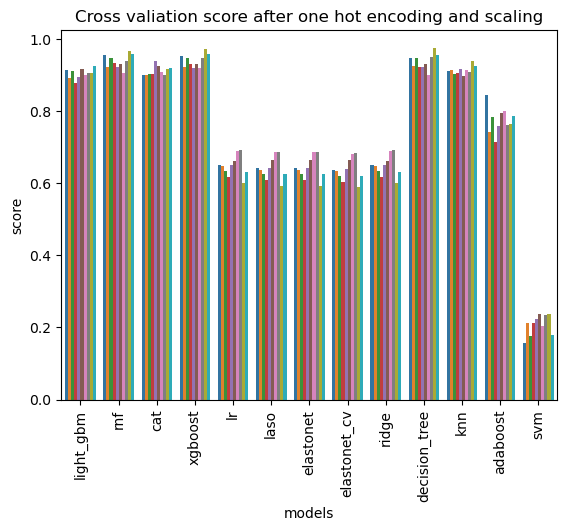

In [51]:
without_ohe_melt = without_ohe.melt(id_vars='models', value_vars= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]   )
b = sns.barplot(x='models', y='value', hue = 'variable', data=without_ohe_melt )
b.set_xticklabels(b.get_xticklabels(), rotation=90);
b.set_ylabel('score')
b.legend_.remove()
b.set_title('Cross valiation score after one hot encoding and scaling')

In [87]:
vif #due to high VIF linear regression is not suitable here rather lasso, ridge are much better

,features,VIF
0,Req_Finish_Fabrics,1313.566208
1,Fabric_Allowance,10.791360
2,Rec_Beam_length(yds),29.602872
3,Shrink_allow,32.756010
4,Req_beam_length(yds),1308.842429
5,Total_Pdn(yds),30.374412
6,Rejection,3.402947
7,epi,58.593891
8,ppi,72.146988


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [40]:
X_train.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),warp_count,weft_count,epi,ppi,FF_grs,Rec_BL_grs,SA_grs,FA_grs
2569,250.0,22.0,382.760,23.0,320.512821,380.624009,40,40,110,90,"(-122.75, 28841.667]","(-248.329, 73062.049]","(17.6, 23.4]","(18.0, 24.5]"
2976,100.0,37.2,153.104,15.1,159.235669,171.503965,40,40,100,70,"(-122.75, 28841.667]","(-248.329, 73062.049]","(11.8, 17.6]","(31.0, 37.5]"
13508,4750.0,10.2,136.700,17.0,5289.532294,5827.478488,40,40,120,80,"(-122.75, 28841.667]","(-248.329, 73062.049]","(11.8, 17.6]","(4.961, 11.5]"
5169,2250.0,8.2,2673.852,8.2,2450.980392,2441.398392,50,50,150,96,"(-122.75, 28841.667]","(-248.329, 73062.049]","(5.965, 11.8]","(4.961, 11.5]"
15152,2150.0,8.2,2679.320,13.4,2342.047930,2472.973059,50,50,130,80,"(-122.75, 28841.667]","(-248.329, 73062.049]","(11.8, 17.6]","(4.961, 11.5]"


# With OHE without scaling

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [43]:
ohe_cols = [i for i in X_train.columns if len(X_train[i].value_counts())<30]

In [44]:
non_ohe_cols = [j for j in X_train.columns if j not in ohe_cols]

In [45]:
# ohe.feature_names_in_

In [46]:
# ohe.get_feature_names_out(input_features=['warp_count', 'weft_count', 'epi', 'ppi', 'FF_grs', 'Rec_BL_grs','SA_grs', 'FA_grs' ])

In [47]:
ohe_df = pd.DataFrame(ohe.fit_transform(X_train[ohe_cols]).toarray())

In [48]:
ohe_df.index = X_train.index

In [49]:
X_train_ohe = pd.concat([X_train[non_ohe_cols], ohe_df], axis=1)

In [50]:
ohe_df_test = pd.DataFrame(ohe.transform(X_test[ohe_cols]).toarray())
ohe_df_test.index = X_test.index

In [51]:
X_test_ohe = pd.concat([X_test[non_ohe_cols], ohe_df_test], axis=1)

In [52]:
X_test_ohe.shape, X_train_ohe.shape, X_train.shape

((4402, 86), (17608, 86), (17608, 14))

In [53]:
X_train_ohe.columns= X_train_ohe.columns.astype(str)
X_test_ohe.columns = X_test_ohe.columns.astype(str)

In [56]:
X_train_ohe.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),0,1,2,3,...,70,71,72,73,74,75,76,77,78,79
2569,250.0,22.0,382.760,23.0,320.512821,380.624009,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2976,100.0,37.2,153.104,15.1,159.235669,171.503965,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13508,4750.0,10.2,136.700,17.0,5289.532294,5827.478488,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5169,2250.0,8.2,2673.852,8.2,2450.980392,2441.398392,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15152,2150.0,8.2,2679.320,13.4,2342.047930,2472.973059,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [65]:
#models
models = {'light_gbm': lightgbm.LGBMRegressor(), 'rnf': RandomForestRegressor() , 'cat': CatBoostRegressor(), 
          'xgboost': XGBRegressor(), 'lr': LinearRegression(), 'laso': Lasso(), 'elastonet': ElasticNet(),
         'elastonet_cv': ElasticNetCV(), 'ridge': Ridge(), 'decision_tree': DecisionTreeRegressor(),
          'knn': KNeighborsRegressor(), 'adaboost': AdaBoostRegressor(), 'svm': SVR()   } 

In [55]:
cv_scores ={}

for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_restults = cross_val_score(model, X_train_ohe, y_train, cv = kfold, error_score='raise')
    cv_scores[name] = cv_restults 
    

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Learning rate set to 0.063354
0:	learn: 152.5417588	total: 141ms	remaining: 2m 20s
1:	learn: 145.9130894	total: 144ms	remaining: 1m 12s
2:	learn: 139.6328921	total: 148ms	remaining: 49.1s
3:	learn: 134.0400431	total: 150ms	remaining: 37.4s
4:	learn: 128.6491209	total: 152ms	remaining: 30.3s
5:	learn: 123.6310667	total: 156ms	remaining: 25.8s
6:	learn: 118.9501569	total: 158ms	remaining: 22.5s
7:	learn: 114.6456151	total: 161ms	remaining: 19.9s
8:	learn: 110.7353138	total: 163ms	remaining: 18s
9:	learn: 107.0117614	total: 166ms	remaining: 16.4s
10:	learn: 103.8753066	total: 168ms	remaining: 15.1s
11:	learn: 100.9241983	total: 171ms	remaining: 14.1s
12:	learn: 98.0253707	total: 174ms	remaining: 13.2s
13:	learn: 95.3133067	total: 176ms	remaining: 12.4s
14:	learn: 92.8551178	total: 179ms	remaining: 11.7s
15:	learn: 90.5179098	total: 181ms	remaining: 11.1s
16:	learn: 88.4934115	total: 183ms	remaining: 10.6s
17:	learn: 86.6647931	total: 187ms	remaining: 10.2s
18:	learn: 84.9386008	total: 190

183:	learn: 52.3187114	total: 603ms	remaining: 2.67s
184:	learn: 52.2642704	total: 606ms	remaining: 2.67s
185:	learn: 52.2123685	total: 608ms	remaining: 2.66s
186:	learn: 52.1710574	total: 610ms	remaining: 2.65s
187:	learn: 52.1310407	total: 613ms	remaining: 2.65s
188:	learn: 52.1077608	total: 615ms	remaining: 2.64s
189:	learn: 52.0541982	total: 618ms	remaining: 2.63s
190:	learn: 52.0258599	total: 620ms	remaining: 2.63s
191:	learn: 51.9858543	total: 623ms	remaining: 2.62s
192:	learn: 51.9322267	total: 625ms	remaining: 2.61s
193:	learn: 51.8902436	total: 628ms	remaining: 2.61s
194:	learn: 51.8639935	total: 630ms	remaining: 2.6s
195:	learn: 51.8274837	total: 633ms	remaining: 2.6s
196:	learn: 51.8036798	total: 635ms	remaining: 2.59s
197:	learn: 51.7720430	total: 638ms	remaining: 2.58s
198:	learn: 51.7578130	total: 640ms	remaining: 2.58s
199:	learn: 51.5904412	total: 643ms	remaining: 2.57s
200:	learn: 51.5187419	total: 645ms	remaining: 2.56s
201:	learn: 51.3520172	total: 647ms	remaining: 2

346:	learn: 46.6032332	total: 999ms	remaining: 1.88s
347:	learn: 46.5540967	total: 1s	remaining: 1.88s
348:	learn: 46.5283915	total: 1s	remaining: 1.87s
349:	learn: 46.4806620	total: 1.01s	remaining: 1.87s
350:	learn: 46.4657592	total: 1.01s	remaining: 1.86s
351:	learn: 46.4488870	total: 1.01s	remaining: 1.86s
352:	learn: 46.4187092	total: 1.01s	remaining: 1.86s
353:	learn: 46.3937600	total: 1.02s	remaining: 1.85s
354:	learn: 46.3795021	total: 1.02s	remaining: 1.85s
355:	learn: 46.3633082	total: 1.02s	remaining: 1.85s
356:	learn: 46.3463083	total: 1.02s	remaining: 1.84s
357:	learn: 46.3318471	total: 1.03s	remaining: 1.84s
358:	learn: 46.3231969	total: 1.03s	remaining: 1.84s
359:	learn: 46.3139670	total: 1.03s	remaining: 1.83s
360:	learn: 46.2936029	total: 1.03s	remaining: 1.83s
361:	learn: 46.2765519	total: 1.04s	remaining: 1.83s
362:	learn: 46.2592773	total: 1.04s	remaining: 1.82s
363:	learn: 46.2326128	total: 1.04s	remaining: 1.82s
364:	learn: 46.2164500	total: 1.04s	remaining: 1.81s

510:	learn: 44.2770155	total: 1.4s	remaining: 1.34s
511:	learn: 44.2697967	total: 1.4s	remaining: 1.33s
512:	learn: 44.2657784	total: 1.4s	remaining: 1.33s
513:	learn: 44.2589134	total: 1.4s	remaining: 1.33s
514:	learn: 44.2545664	total: 1.41s	remaining: 1.32s
515:	learn: 44.2486621	total: 1.41s	remaining: 1.32s
516:	learn: 44.2372669	total: 1.41s	remaining: 1.32s
517:	learn: 44.2203294	total: 1.41s	remaining: 1.31s
518:	learn: 44.2126805	total: 1.42s	remaining: 1.31s
519:	learn: 44.2065394	total: 1.42s	remaining: 1.31s
520:	learn: 44.2033660	total: 1.42s	remaining: 1.31s
521:	learn: 44.1964813	total: 1.42s	remaining: 1.3s
522:	learn: 44.1923834	total: 1.43s	remaining: 1.3s
523:	learn: 44.1879618	total: 1.43s	remaining: 1.3s
524:	learn: 44.1717200	total: 1.43s	remaining: 1.29s
525:	learn: 44.1606426	total: 1.43s	remaining: 1.29s
526:	learn: 44.1505152	total: 1.44s	remaining: 1.29s
527:	learn: 44.1463290	total: 1.44s	remaining: 1.28s
528:	learn: 44.1417777	total: 1.44s	remaining: 1.28s


672:	learn: 42.9688136	total: 1.79s	remaining: 870ms
673:	learn: 42.9607920	total: 1.79s	remaining: 868ms
674:	learn: 42.9545108	total: 1.8s	remaining: 865ms
675:	learn: 42.9497485	total: 1.8s	remaining: 862ms
676:	learn: 42.9473242	total: 1.8s	remaining: 860ms
677:	learn: 42.9437307	total: 1.8s	remaining: 857ms
678:	learn: 42.9416098	total: 1.81s	remaining: 854ms
679:	learn: 42.9385300	total: 1.81s	remaining: 851ms
680:	learn: 42.9360242	total: 1.81s	remaining: 848ms
681:	learn: 42.9339188	total: 1.81s	remaining: 846ms
682:	learn: 42.9249725	total: 1.82s	remaining: 843ms
683:	learn: 42.9216224	total: 1.82s	remaining: 840ms
684:	learn: 42.9174383	total: 1.82s	remaining: 838ms
685:	learn: 42.9114175	total: 1.82s	remaining: 835ms
686:	learn: 42.9020237	total: 1.83s	remaining: 832ms
687:	learn: 42.8892738	total: 1.83s	remaining: 830ms
688:	learn: 42.8849847	total: 1.83s	remaining: 827ms
689:	learn: 42.8736763	total: 1.83s	remaining: 824ms
690:	learn: 42.8695692	total: 1.84s	remaining: 821

836:	learn: 42.1616979	total: 2.19s	remaining: 427ms
837:	learn: 42.1593266	total: 2.19s	remaining: 424ms
838:	learn: 42.1521144	total: 2.2s	remaining: 422ms
839:	learn: 42.1468348	total: 2.2s	remaining: 419ms
840:	learn: 42.1423683	total: 2.2s	remaining: 416ms
841:	learn: 42.1367358	total: 2.2s	remaining: 414ms
842:	learn: 42.1340374	total: 2.21s	remaining: 411ms
843:	learn: 42.1289221	total: 2.21s	remaining: 408ms
844:	learn: 42.1271805	total: 2.21s	remaining: 406ms
845:	learn: 42.1175445	total: 2.21s	remaining: 403ms
846:	learn: 42.1147054	total: 2.22s	remaining: 400ms
847:	learn: 42.1104420	total: 2.22s	remaining: 398ms
848:	learn: 42.1061676	total: 2.22s	remaining: 395ms
849:	learn: 42.0975143	total: 2.22s	remaining: 392ms
850:	learn: 42.0928077	total: 2.23s	remaining: 390ms
851:	learn: 42.0877748	total: 2.23s	remaining: 387ms
852:	learn: 42.0806039	total: 2.23s	remaining: 384ms
853:	learn: 42.0761628	total: 2.23s	remaining: 382ms
854:	learn: 42.0730202	total: 2.23s	remaining: 379

Learning rate set to 0.063354
0:	learn: 157.5061539	total: 3.48ms	remaining: 3.47s
1:	learn: 150.6396588	total: 6.73ms	remaining: 3.36s
2:	learn: 144.1980387	total: 10.1ms	remaining: 3.35s
3:	learn: 138.2681621	total: 12.5ms	remaining: 3.11s
4:	learn: 132.6007736	total: 14.9ms	remaining: 2.96s
5:	learn: 127.4548738	total: 17.2ms	remaining: 2.85s
6:	learn: 122.6483855	total: 19.6ms	remaining: 2.77s
7:	learn: 118.5372462	total: 22ms	remaining: 2.73s
8:	learn: 114.4257983	total: 24.9ms	remaining: 2.74s
9:	learn: 110.4605875	total: 27.7ms	remaining: 2.74s
10:	learn: 107.0368455	total: 30.3ms	remaining: 2.73s
11:	learn: 103.8309195	total: 32.6ms	remaining: 2.69s
12:	learn: 100.8270510	total: 35ms	remaining: 2.65s
13:	learn: 98.0668537	total: 37.7ms	remaining: 2.65s
14:	learn: 95.6159004	total: 40.4ms	remaining: 2.65s
15:	learn: 93.3100364	total: 42.8ms	remaining: 2.63s
16:	learn: 91.2087080	total: 45.7ms	remaining: 2.64s
17:	learn: 89.2943735	total: 48.4ms	remaining: 2.64s
18:	learn: 87.428

231:	learn: 51.3985392	total: 601ms	remaining: 1.99s
232:	learn: 51.3591181	total: 604ms	remaining: 1.99s
233:	learn: 51.3307417	total: 606ms	remaining: 1.98s
234:	learn: 51.3067116	total: 609ms	remaining: 1.98s
235:	learn: 51.2599572	total: 611ms	remaining: 1.98s
236:	learn: 51.2454190	total: 614ms	remaining: 1.98s
237:	learn: 51.2098786	total: 617ms	remaining: 1.97s
238:	learn: 51.1837639	total: 619ms	remaining: 1.97s
239:	learn: 51.1417847	total: 622ms	remaining: 1.97s
240:	learn: 51.0942293	total: 624ms	remaining: 1.96s
241:	learn: 51.0708221	total: 626ms	remaining: 1.96s
242:	learn: 51.0417246	total: 629ms	remaining: 1.96s
243:	learn: 51.0044945	total: 631ms	remaining: 1.96s
244:	learn: 50.9724449	total: 633ms	remaining: 1.95s
245:	learn: 50.9255321	total: 636ms	remaining: 1.95s
246:	learn: 50.9118503	total: 638ms	remaining: 1.95s
247:	learn: 50.8711109	total: 640ms	remaining: 1.94s
248:	learn: 50.8545705	total: 643ms	remaining: 1.94s
249:	learn: 50.8299462	total: 645ms	remaining:

395:	learn: 47.5465615	total: 1.01s	remaining: 1.54s
396:	learn: 47.5260609	total: 1.01s	remaining: 1.53s
397:	learn: 47.5209666	total: 1.01s	remaining: 1.53s
398:	learn: 47.5076889	total: 1.02s	remaining: 1.53s
399:	learn: 47.5002513	total: 1.02s	remaining: 1.53s
400:	learn: 47.4851866	total: 1.02s	remaining: 1.52s
401:	learn: 47.4684044	total: 1.02s	remaining: 1.52s
402:	learn: 47.4226698	total: 1.03s	remaining: 1.52s
403:	learn: 47.4145358	total: 1.03s	remaining: 1.52s
404:	learn: 47.4111713	total: 1.03s	remaining: 1.51s
405:	learn: 47.3914540	total: 1.03s	remaining: 1.51s
406:	learn: 47.3747906	total: 1.03s	remaining: 1.51s
407:	learn: 47.3622336	total: 1.04s	remaining: 1.51s
408:	learn: 47.3481493	total: 1.04s	remaining: 1.5s
409:	learn: 47.3295713	total: 1.04s	remaining: 1.5s
410:	learn: 47.3169714	total: 1.04s	remaining: 1.5s
411:	learn: 47.3078866	total: 1.05s	remaining: 1.5s
412:	learn: 47.2965503	total: 1.05s	remaining: 1.49s
413:	learn: 47.2934584	total: 1.05s	remaining: 1.4

558:	learn: 45.8317042	total: 1.4s	remaining: 1.11s
559:	learn: 45.8261360	total: 1.41s	remaining: 1.1s
560:	learn: 45.8213793	total: 1.41s	remaining: 1.1s
561:	learn: 45.8102187	total: 1.41s	remaining: 1.1s
562:	learn: 45.7970891	total: 1.41s	remaining: 1.1s
563:	learn: 45.7841636	total: 1.42s	remaining: 1.09s
564:	learn: 45.7711692	total: 1.42s	remaining: 1.09s
565:	learn: 45.7675607	total: 1.42s	remaining: 1.09s
566:	learn: 45.7595049	total: 1.42s	remaining: 1.09s
567:	learn: 45.7530718	total: 1.43s	remaining: 1.08s
568:	learn: 45.7434948	total: 1.43s	remaining: 1.08s
569:	learn: 45.7395590	total: 1.43s	remaining: 1.08s
570:	learn: 45.7315280	total: 1.43s	remaining: 1.08s
571:	learn: 45.7173415	total: 1.44s	remaining: 1.07s
572:	learn: 45.7088842	total: 1.44s	remaining: 1.07s
573:	learn: 45.7048697	total: 1.44s	remaining: 1.07s
574:	learn: 45.6960620	total: 1.44s	remaining: 1.07s
575:	learn: 45.6879579	total: 1.45s	remaining: 1.06s
576:	learn: 45.6805741	total: 1.45s	remaining: 1.06

722:	learn: 44.7088472	total: 1.8s	remaining: 691ms
723:	learn: 44.7063973	total: 1.81s	remaining: 689ms
724:	learn: 44.6990366	total: 1.81s	remaining: 686ms
725:	learn: 44.6958852	total: 1.81s	remaining: 684ms
726:	learn: 44.6891999	total: 1.81s	remaining: 681ms
727:	learn: 44.6863585	total: 1.82s	remaining: 679ms
728:	learn: 44.6834937	total: 1.82s	remaining: 676ms
729:	learn: 44.6767776	total: 1.82s	remaining: 674ms
730:	learn: 44.6750452	total: 1.82s	remaining: 671ms
731:	learn: 44.6667616	total: 1.83s	remaining: 669ms
732:	learn: 44.6620674	total: 1.83s	remaining: 666ms
733:	learn: 44.6589685	total: 1.83s	remaining: 664ms
734:	learn: 44.6544676	total: 1.83s	remaining: 661ms
735:	learn: 44.6468733	total: 1.83s	remaining: 659ms
736:	learn: 44.6409260	total: 1.84s	remaining: 656ms
737:	learn: 44.6358512	total: 1.84s	remaining: 654ms
738:	learn: 44.6314814	total: 1.84s	remaining: 651ms
739:	learn: 44.6255032	total: 1.84s	remaining: 648ms
740:	learn: 44.6216763	total: 1.85s	remaining: 

886:	learn: 44.0062521	total: 2.2s	remaining: 280ms
887:	learn: 44.0032814	total: 2.2s	remaining: 278ms
888:	learn: 43.9985210	total: 2.21s	remaining: 275ms
889:	learn: 43.9958006	total: 2.21s	remaining: 273ms
890:	learn: 43.9923290	total: 2.21s	remaining: 271ms
891:	learn: 43.9870657	total: 2.21s	remaining: 268ms
892:	learn: 43.9850968	total: 2.22s	remaining: 266ms
893:	learn: 43.9816631	total: 2.22s	remaining: 263ms
894:	learn: 43.9791493	total: 2.22s	remaining: 261ms
895:	learn: 43.9767191	total: 2.22s	remaining: 258ms
896:	learn: 43.9720469	total: 2.23s	remaining: 256ms
897:	learn: 43.9689357	total: 2.23s	remaining: 253ms
898:	learn: 43.9638266	total: 2.23s	remaining: 251ms
899:	learn: 43.9610086	total: 2.23s	remaining: 248ms
900:	learn: 43.9587380	total: 2.23s	remaining: 246ms
901:	learn: 43.9414541	total: 2.24s	remaining: 243ms
902:	learn: 43.9376377	total: 2.24s	remaining: 241ms
903:	learn: 43.9363919	total: 2.24s	remaining: 238ms
904:	learn: 43.9335295	total: 2.24s	remaining: 2

78:	learn: 62.5443063	total: 197ms	remaining: 2.29s
79:	learn: 62.4714213	total: 199ms	remaining: 2.29s
80:	learn: 62.4038854	total: 202ms	remaining: 2.29s
81:	learn: 62.0321025	total: 204ms	remaining: 2.29s
82:	learn: 61.9583733	total: 207ms	remaining: 2.29s
83:	learn: 61.8707421	total: 209ms	remaining: 2.28s
84:	learn: 61.7761476	total: 212ms	remaining: 2.28s
85:	learn: 61.7251848	total: 214ms	remaining: 2.28s
86:	learn: 61.6263128	total: 217ms	remaining: 2.28s
87:	learn: 61.5454667	total: 220ms	remaining: 2.27s
88:	learn: 61.4757471	total: 222ms	remaining: 2.27s
89:	learn: 61.3889655	total: 224ms	remaining: 2.27s
90:	learn: 61.2963435	total: 227ms	remaining: 2.27s
91:	learn: 61.2545819	total: 229ms	remaining: 2.26s
92:	learn: 61.1724941	total: 231ms	remaining: 2.26s
93:	learn: 61.1360984	total: 234ms	remaining: 2.25s
94:	learn: 60.9512653	total: 236ms	remaining: 2.25s
95:	learn: 60.8961395	total: 238ms	remaining: 2.24s
96:	learn: 60.8601179	total: 241ms	remaining: 2.24s
97:	learn: 6

243:	learn: 52.0535574	total: 593ms	remaining: 1.84s
244:	learn: 51.8455166	total: 596ms	remaining: 1.84s
245:	learn: 51.8352668	total: 599ms	remaining: 1.83s
246:	learn: 51.8163631	total: 601ms	remaining: 1.83s
247:	learn: 51.7743597	total: 604ms	remaining: 1.83s
248:	learn: 51.7376554	total: 606ms	remaining: 1.83s
249:	learn: 51.7139414	total: 609ms	remaining: 1.83s
250:	learn: 51.5259916	total: 611ms	remaining: 1.82s
251:	learn: 51.5080750	total: 613ms	remaining: 1.82s
252:	learn: 51.4886038	total: 616ms	remaining: 1.82s
253:	learn: 51.4628301	total: 618ms	remaining: 1.81s
254:	learn: 51.4433469	total: 621ms	remaining: 1.81s
255:	learn: 51.4074011	total: 623ms	remaining: 1.81s
256:	learn: 51.3832351	total: 625ms	remaining: 1.81s
257:	learn: 51.3698944	total: 628ms	remaining: 1.8s
258:	learn: 51.3467801	total: 630ms	remaining: 1.8s
259:	learn: 51.3004565	total: 632ms	remaining: 1.8s
260:	learn: 51.2745659	total: 635ms	remaining: 1.8s
261:	learn: 51.1004935	total: 637ms	remaining: 1.7

407:	learn: 47.6924176	total: 993ms	remaining: 1.44s
408:	learn: 47.6840242	total: 995ms	remaining: 1.44s
409:	learn: 47.6678470	total: 998ms	remaining: 1.44s
410:	learn: 47.6600081	total: 1s	remaining: 1.43s
411:	learn: 47.6521515	total: 1s	remaining: 1.43s
412:	learn: 47.6389710	total: 1s	remaining: 1.43s
413:	learn: 47.6284539	total: 1.01s	remaining: 1.43s
414:	learn: 47.6231687	total: 1.01s	remaining: 1.42s
415:	learn: 47.6124735	total: 1.01s	remaining: 1.42s
416:	learn: 47.6003077	total: 1.01s	remaining: 1.42s
417:	learn: 47.5706852	total: 1.02s	remaining: 1.42s
418:	learn: 47.5597767	total: 1.02s	remaining: 1.41s
419:	learn: 47.5426687	total: 1.02s	remaining: 1.41s
420:	learn: 47.5243685	total: 1.02s	remaining: 1.41s
421:	learn: 47.5158971	total: 1.03s	remaining: 1.41s
422:	learn: 47.4986579	total: 1.03s	remaining: 1.4s
423:	learn: 47.4132306	total: 1.03s	remaining: 1.4s
424:	learn: 47.3483359	total: 1.03s	remaining: 1.4s
425:	learn: 47.3261867	total: 1.04s	remaining: 1.4s
426:	l

568:	learn: 45.7946128	total: 1.39s	remaining: 1.05s
569:	learn: 45.7918782	total: 1.39s	remaining: 1.05s
570:	learn: 45.7896187	total: 1.39s	remaining: 1.05s
571:	learn: 45.7834620	total: 1.4s	remaining: 1.04s
572:	learn: 45.7752433	total: 1.4s	remaining: 1.04s
573:	learn: 45.7705252	total: 1.4s	remaining: 1.04s
574:	learn: 45.7647971	total: 1.4s	remaining: 1.04s
575:	learn: 45.7582559	total: 1.41s	remaining: 1.03s
576:	learn: 45.7504282	total: 1.41s	remaining: 1.03s
577:	learn: 45.7441561	total: 1.41s	remaining: 1.03s
578:	learn: 45.7348986	total: 1.41s	remaining: 1.03s
579:	learn: 45.7322496	total: 1.42s	remaining: 1.02s
580:	learn: 45.7188521	total: 1.42s	remaining: 1.02s
581:	learn: 45.7129274	total: 1.42s	remaining: 1.02s
582:	learn: 45.7073239	total: 1.42s	remaining: 1.02s
583:	learn: 45.7021265	total: 1.43s	remaining: 1.01s
584:	learn: 45.6991801	total: 1.43s	remaining: 1.01s
585:	learn: 45.6969609	total: 1.43s	remaining: 1.01s
586:	learn: 45.6916874	total: 1.43s	remaining: 1.0

730:	learn: 44.6335771	total: 1.79s	remaining: 658ms
731:	learn: 44.6298931	total: 1.79s	remaining: 656ms
732:	learn: 44.6216597	total: 1.79s	remaining: 653ms
733:	learn: 44.6161377	total: 1.79s	remaining: 651ms
734:	learn: 44.6123343	total: 1.8s	remaining: 648ms
735:	learn: 44.5827371	total: 1.8s	remaining: 646ms
736:	learn: 44.5746991	total: 1.8s	remaining: 644ms
737:	learn: 44.5732709	total: 1.81s	remaining: 641ms
738:	learn: 44.5695289	total: 1.81s	remaining: 639ms
739:	learn: 44.5603162	total: 1.81s	remaining: 636ms
740:	learn: 44.5573552	total: 1.81s	remaining: 634ms
741:	learn: 44.5562066	total: 1.81s	remaining: 631ms
742:	learn: 44.5500462	total: 1.82s	remaining: 629ms
743:	learn: 44.5406305	total: 1.82s	remaining: 627ms
744:	learn: 44.5355947	total: 1.82s	remaining: 624ms
745:	learn: 44.5312284	total: 1.82s	remaining: 622ms
746:	learn: 44.5255909	total: 1.83s	remaining: 619ms
747:	learn: 44.5176733	total: 1.83s	remaining: 617ms
748:	learn: 44.5134762	total: 1.83s	remaining: 61

891:	learn: 43.9114308	total: 2.19s	remaining: 265ms
892:	learn: 43.9078128	total: 2.19s	remaining: 262ms
893:	learn: 43.9025215	total: 2.19s	remaining: 260ms
894:	learn: 43.9009422	total: 2.19s	remaining: 257ms
895:	learn: 43.8998599	total: 2.19s	remaining: 255ms
896:	learn: 43.8978625	total: 2.2s	remaining: 252ms
897:	learn: 43.8897163	total: 2.2s	remaining: 250ms
898:	learn: 43.8871446	total: 2.2s	remaining: 248ms
899:	learn: 43.8862756	total: 2.21s	remaining: 245ms
900:	learn: 43.8844439	total: 2.21s	remaining: 243ms
901:	learn: 43.8826881	total: 2.21s	remaining: 240ms
902:	learn: 43.8795461	total: 2.21s	remaining: 238ms
903:	learn: 43.8746748	total: 2.21s	remaining: 235ms
904:	learn: 43.8717711	total: 2.22s	remaining: 233ms
905:	learn: 43.8688555	total: 2.22s	remaining: 230ms
906:	learn: 43.8681098	total: 2.22s	remaining: 228ms
907:	learn: 43.8636476	total: 2.22s	remaining: 225ms
908:	learn: 43.8619832	total: 2.23s	remaining: 223ms
909:	learn: 43.8610890	total: 2.23s	remaining: 22

80:	learn: 61.9290165	total: 199ms	remaining: 2.26s
81:	learn: 61.8216715	total: 202ms	remaining: 2.26s
82:	learn: 61.7277752	total: 204ms	remaining: 2.25s
83:	learn: 61.6593091	total: 207ms	remaining: 2.25s
84:	learn: 61.5598565	total: 209ms	remaining: 2.25s
85:	learn: 61.4919810	total: 212ms	remaining: 2.25s
86:	learn: 61.4247295	total: 215ms	remaining: 2.25s
87:	learn: 61.3508625	total: 217ms	remaining: 2.25s
88:	learn: 61.2331736	total: 219ms	remaining: 2.25s
89:	learn: 61.1117961	total: 222ms	remaining: 2.24s
90:	learn: 60.9899242	total: 224ms	remaining: 2.24s
91:	learn: 60.9032152	total: 226ms	remaining: 2.23s
92:	learn: 60.8205205	total: 229ms	remaining: 2.23s
93:	learn: 60.7894208	total: 231ms	remaining: 2.23s
94:	learn: 60.7232529	total: 234ms	remaining: 2.23s
95:	learn: 60.6716534	total: 236ms	remaining: 2.22s
96:	learn: 60.6442176	total: 238ms	remaining: 2.22s
97:	learn: 60.5903641	total: 241ms	remaining: 2.22s
98:	learn: 60.5316439	total: 243ms	remaining: 2.21s
99:	learn: 6

244:	learn: 52.0214054	total: 597ms	remaining: 1.84s
245:	learn: 51.9033564	total: 600ms	remaining: 1.84s
246:	learn: 51.8855137	total: 603ms	remaining: 1.84s
247:	learn: 51.8476829	total: 605ms	remaining: 1.83s
248:	learn: 51.8344121	total: 608ms	remaining: 1.83s
249:	learn: 51.8186432	total: 610ms	remaining: 1.83s
250:	learn: 51.8047461	total: 613ms	remaining: 1.83s
251:	learn: 51.7789324	total: 615ms	remaining: 1.82s
252:	learn: 51.6836178	total: 618ms	remaining: 1.82s
253:	learn: 51.6651066	total: 620ms	remaining: 1.82s
254:	learn: 51.5634474	total: 623ms	remaining: 1.82s
255:	learn: 51.5216358	total: 626ms	remaining: 1.82s
256:	learn: 51.4811327	total: 629ms	remaining: 1.82s
257:	learn: 51.4537520	total: 631ms	remaining: 1.81s
258:	learn: 51.4293276	total: 634ms	remaining: 1.81s
259:	learn: 51.4028465	total: 636ms	remaining: 1.81s
260:	learn: 51.3798027	total: 639ms	remaining: 1.81s
261:	learn: 51.3412819	total: 642ms	remaining: 1.81s
262:	learn: 51.3103659	total: 644ms	remaining:

409:	learn: 48.1671753	total: 1s	remaining: 1.44s
410:	learn: 48.1608680	total: 1s	remaining: 1.44s
411:	learn: 48.1459284	total: 1.01s	remaining: 1.44s
412:	learn: 48.1337597	total: 1.01s	remaining: 1.44s
413:	learn: 48.1298347	total: 1.01s	remaining: 1.43s
414:	learn: 48.1240299	total: 1.01s	remaining: 1.43s
415:	learn: 48.1205208	total: 1.02s	remaining: 1.43s
416:	learn: 48.1013966	total: 1.02s	remaining: 1.43s
417:	learn: 48.0958930	total: 1.02s	remaining: 1.42s
418:	learn: 48.0852292	total: 1.02s	remaining: 1.42s
419:	learn: 48.0698012	total: 1.03s	remaining: 1.42s
420:	learn: 48.0518569	total: 1.03s	remaining: 1.42s
421:	learn: 48.0426170	total: 1.03s	remaining: 1.41s
422:	learn: 48.0166537	total: 1.03s	remaining: 1.41s
423:	learn: 48.0047888	total: 1.04s	remaining: 1.41s
424:	learn: 47.9908040	total: 1.04s	remaining: 1.41s
425:	learn: 47.9481162	total: 1.04s	remaining: 1.4s
426:	learn: 47.9340905	total: 1.04s	remaining: 1.4s
427:	learn: 47.9213904	total: 1.05s	remaining: 1.4s
42

570:	learn: 46.3989833	total: 1.4s	remaining: 1.05s
571:	learn: 46.3932945	total: 1.4s	remaining: 1.05s
572:	learn: 46.3863552	total: 1.4s	remaining: 1.04s
573:	learn: 46.3786528	total: 1.41s	remaining: 1.04s
574:	learn: 46.3762779	total: 1.41s	remaining: 1.04s
575:	learn: 46.3684358	total: 1.41s	remaining: 1.04s
576:	learn: 46.3595027	total: 1.41s	remaining: 1.04s
577:	learn: 46.3525169	total: 1.42s	remaining: 1.03s
578:	learn: 46.3427620	total: 1.42s	remaining: 1.03s
579:	learn: 46.3330471	total: 1.42s	remaining: 1.03s
580:	learn: 46.3314906	total: 1.42s	remaining: 1.03s
581:	learn: 46.3301264	total: 1.43s	remaining: 1.02s
582:	learn: 46.3249920	total: 1.43s	remaining: 1.02s
583:	learn: 46.3189150	total: 1.43s	remaining: 1.02s
584:	learn: 46.3148138	total: 1.43s	remaining: 1.02s
585:	learn: 46.3087781	total: 1.44s	remaining: 1.01s
586:	learn: 46.2923031	total: 1.44s	remaining: 1.01s
587:	learn: 46.2891584	total: 1.44s	remaining: 1.01s
588:	learn: 46.2820482	total: 1.44s	remaining: 1.

734:	learn: 45.3197721	total: 1.8s	remaining: 651ms
735:	learn: 45.3123011	total: 1.81s	remaining: 648ms
736:	learn: 45.3083476	total: 1.81s	remaining: 646ms
737:	learn: 45.2998589	total: 1.81s	remaining: 643ms
738:	learn: 45.2974106	total: 1.81s	remaining: 641ms
739:	learn: 45.2927350	total: 1.82s	remaining: 639ms
740:	learn: 45.2902128	total: 1.82s	remaining: 636ms
741:	learn: 45.2859269	total: 1.82s	remaining: 634ms
742:	learn: 45.2825851	total: 1.82s	remaining: 631ms
743:	learn: 45.2760808	total: 1.83s	remaining: 629ms
744:	learn: 45.2717728	total: 1.83s	remaining: 626ms
745:	learn: 45.2672323	total: 1.83s	remaining: 624ms
746:	learn: 45.2649455	total: 1.83s	remaining: 621ms
747:	learn: 45.2635753	total: 1.84s	remaining: 619ms
748:	learn: 45.2604452	total: 1.84s	remaining: 616ms
749:	learn: 45.2574388	total: 1.84s	remaining: 614ms
750:	learn: 45.2537601	total: 1.84s	remaining: 612ms
751:	learn: 45.2507508	total: 1.85s	remaining: 609ms
752:	learn: 45.2478482	total: 1.85s	remaining: 

895:	learn: 44.6988830	total: 2.2s	remaining: 256ms
896:	learn: 44.6973674	total: 2.2s	remaining: 253ms
897:	learn: 44.6947501	total: 2.21s	remaining: 251ms
898:	learn: 44.6923638	total: 2.21s	remaining: 248ms
899:	learn: 44.6876111	total: 2.21s	remaining: 246ms
900:	learn: 44.6804148	total: 2.21s	remaining: 243ms
901:	learn: 44.6767281	total: 2.22s	remaining: 241ms
902:	learn: 44.6715235	total: 2.22s	remaining: 238ms
903:	learn: 44.6684030	total: 2.22s	remaining: 236ms
904:	learn: 44.6648668	total: 2.22s	remaining: 233ms
905:	learn: 44.6634889	total: 2.23s	remaining: 231ms
906:	learn: 44.6620954	total: 2.23s	remaining: 228ms
907:	learn: 44.6539387	total: 2.23s	remaining: 226ms
908:	learn: 44.6510595	total: 2.23s	remaining: 224ms
909:	learn: 44.6470209	total: 2.23s	remaining: 221ms
910:	learn: 44.6385041	total: 2.24s	remaining: 219ms
911:	learn: 44.6372969	total: 2.24s	remaining: 216ms
912:	learn: 44.6347577	total: 2.24s	remaining: 214ms
913:	learn: 44.6316652	total: 2.25s	remaining: 2

83:	learn: 62.2819761	total: 206ms	remaining: 2.25s
84:	learn: 62.2196216	total: 209ms	remaining: 2.25s
85:	learn: 62.1502156	total: 211ms	remaining: 2.25s
86:	learn: 62.0544590	total: 214ms	remaining: 2.24s
87:	learn: 61.9767575	total: 216ms	remaining: 2.24s
88:	learn: 61.8576457	total: 219ms	remaining: 2.24s
89:	learn: 61.7140492	total: 221ms	remaining: 2.24s
90:	learn: 61.6131373	total: 224ms	remaining: 2.23s
91:	learn: 61.5491942	total: 226ms	remaining: 2.23s
92:	learn: 61.3787130	total: 229ms	remaining: 2.23s
93:	learn: 61.3384611	total: 231ms	remaining: 2.23s
94:	learn: 61.2737291	total: 233ms	remaining: 2.22s
95:	learn: 61.2373369	total: 235ms	remaining: 2.22s
96:	learn: 61.2125696	total: 238ms	remaining: 2.21s
97:	learn: 61.1629057	total: 240ms	remaining: 2.21s
98:	learn: 61.1138789	total: 242ms	remaining: 2.21s
99:	learn: 61.0812373	total: 245ms	remaining: 2.2s
100:	learn: 60.9916086	total: 247ms	remaining: 2.2s
101:	learn: 60.8839926	total: 250ms	remaining: 2.2s
102:	learn: 6

246:	learn: 51.9023698	total: 603ms	remaining: 1.84s
247:	learn: 51.8574167	total: 606ms	remaining: 1.84s
248:	learn: 51.8102863	total: 609ms	remaining: 1.83s
249:	learn: 51.7820981	total: 611ms	remaining: 1.83s
250:	learn: 51.7560612	total: 614ms	remaining: 1.83s
251:	learn: 51.7330769	total: 616ms	remaining: 1.83s
252:	learn: 51.7255970	total: 619ms	remaining: 1.83s
253:	learn: 51.6925694	total: 621ms	remaining: 1.82s
254:	learn: 51.6710214	total: 624ms	remaining: 1.82s
255:	learn: 51.6376571	total: 626ms	remaining: 1.82s
256:	learn: 51.6099088	total: 629ms	remaining: 1.82s
257:	learn: 51.5135574	total: 631ms	remaining: 1.81s
258:	learn: 51.4669698	total: 634ms	remaining: 1.81s
259:	learn: 51.4271289	total: 636ms	remaining: 1.81s
260:	learn: 51.4042382	total: 638ms	remaining: 1.81s
261:	learn: 51.3823837	total: 641ms	remaining: 1.8s
262:	learn: 51.3206654	total: 643ms	remaining: 1.8s
263:	learn: 51.2871450	total: 645ms	remaining: 1.8s
264:	learn: 51.2404419	total: 648ms	remaining: 1.

407:	learn: 48.4569617	total: 1s	remaining: 1.45s
408:	learn: 48.4413537	total: 1s	remaining: 1.45s
409:	learn: 48.4235803	total: 1.01s	remaining: 1.45s
410:	learn: 48.4147352	total: 1.01s	remaining: 1.45s
411:	learn: 48.4039739	total: 1.01s	remaining: 1.45s
412:	learn: 48.3854477	total: 1.01s	remaining: 1.44s
413:	learn: 48.3742638	total: 1.02s	remaining: 1.44s
414:	learn: 48.3603209	total: 1.02s	remaining: 1.44s
415:	learn: 48.3457366	total: 1.02s	remaining: 1.44s
416:	learn: 48.3286149	total: 1.02s	remaining: 1.43s
417:	learn: 48.3191042	total: 1.03s	remaining: 1.43s
418:	learn: 48.3116154	total: 1.03s	remaining: 1.43s
419:	learn: 48.3083640	total: 1.03s	remaining: 1.43s
420:	learn: 48.3001132	total: 1.03s	remaining: 1.42s
421:	learn: 48.2704526	total: 1.04s	remaining: 1.42s
422:	learn: 48.2611935	total: 1.04s	remaining: 1.42s
423:	learn: 48.2566263	total: 1.04s	remaining: 1.42s
424:	learn: 48.2443105	total: 1.04s	remaining: 1.41s
425:	learn: 48.2276463	total: 1.05s	remaining: 1.41s

568:	learn: 46.7752105	total: 1.4s	remaining: 1.06s
569:	learn: 46.7724128	total: 1.4s	remaining: 1.06s
570:	learn: 46.7432520	total: 1.4s	remaining: 1.05s
571:	learn: 46.7335356	total: 1.41s	remaining: 1.05s
572:	learn: 46.7301471	total: 1.41s	remaining: 1.05s
573:	learn: 46.7187569	total: 1.41s	remaining: 1.05s
574:	learn: 46.7114889	total: 1.41s	remaining: 1.04s
575:	learn: 46.6987875	total: 1.42s	remaining: 1.04s
576:	learn: 46.6913136	total: 1.42s	remaining: 1.04s
577:	learn: 46.6868807	total: 1.42s	remaining: 1.04s
578:	learn: 46.6752375	total: 1.42s	remaining: 1.03s
579:	learn: 46.6716659	total: 1.43s	remaining: 1.03s
580:	learn: 46.6576565	total: 1.43s	remaining: 1.03s
581:	learn: 46.6298935	total: 1.43s	remaining: 1.03s
582:	learn: 46.6185997	total: 1.43s	remaining: 1.02s
583:	learn: 46.6150962	total: 1.44s	remaining: 1.02s
584:	learn: 46.5995001	total: 1.44s	remaining: 1.02s
585:	learn: 46.5867466	total: 1.44s	remaining: 1.02s
586:	learn: 46.5765616	total: 1.44s	remaining: 1.

727:	learn: 45.6772005	total: 1.79s	remaining: 670ms
728:	learn: 45.6759344	total: 1.8s	remaining: 668ms
729:	learn: 45.6757019	total: 1.8s	remaining: 665ms
730:	learn: 45.6709901	total: 1.8s	remaining: 663ms
731:	learn: 45.6676792	total: 1.8s	remaining: 660ms
732:	learn: 45.6615829	total: 1.8s	remaining: 658ms
733:	learn: 45.6587925	total: 1.81s	remaining: 655ms
734:	learn: 45.6564673	total: 1.81s	remaining: 653ms
735:	learn: 45.6512043	total: 1.81s	remaining: 650ms
736:	learn: 45.6453258	total: 1.81s	remaining: 648ms
737:	learn: 45.6383061	total: 1.82s	remaining: 645ms
738:	learn: 45.6348590	total: 1.82s	remaining: 643ms
739:	learn: 45.6277095	total: 1.82s	remaining: 641ms
740:	learn: 45.6261833	total: 1.82s	remaining: 638ms
741:	learn: 45.6229535	total: 1.83s	remaining: 636ms
742:	learn: 45.6178889	total: 1.83s	remaining: 633ms
743:	learn: 45.6143459	total: 1.83s	remaining: 631ms
744:	learn: 45.6100780	total: 1.83s	remaining: 628ms
745:	learn: 45.6068381	total: 1.84s	remaining: 626m

894:	learn: 45.0347290	total: 2.2s	remaining: 258ms
895:	learn: 45.0329785	total: 2.21s	remaining: 256ms
896:	learn: 45.0310614	total: 2.21s	remaining: 254ms
897:	learn: 45.0275167	total: 2.21s	remaining: 251ms
898:	learn: 45.0257857	total: 2.21s	remaining: 249ms
899:	learn: 45.0212326	total: 2.22s	remaining: 246ms
900:	learn: 45.0183257	total: 2.22s	remaining: 244ms
901:	learn: 45.0150049	total: 2.22s	remaining: 241ms
902:	learn: 45.0127154	total: 2.22s	remaining: 239ms
903:	learn: 45.0050748	total: 2.23s	remaining: 237ms
904:	learn: 45.0018528	total: 2.23s	remaining: 234ms
905:	learn: 44.9997627	total: 2.23s	remaining: 232ms
906:	learn: 44.9958241	total: 2.23s	remaining: 229ms
907:	learn: 44.9911323	total: 2.24s	remaining: 227ms
908:	learn: 44.9905958	total: 2.24s	remaining: 224ms
909:	learn: 44.9890168	total: 2.24s	remaining: 222ms
910:	learn: 44.9873199	total: 2.24s	remaining: 219ms
911:	learn: 44.9845746	total: 2.25s	remaining: 217ms
912:	learn: 44.9801054	total: 2.25s	remaining: 

77:	learn: 62.8758695	total: 194ms	remaining: 2.29s
78:	learn: 62.7754549	total: 196ms	remaining: 2.29s
79:	learn: 62.6916294	total: 199ms	remaining: 2.29s
80:	learn: 62.6169035	total: 201ms	remaining: 2.28s
81:	learn: 62.5211057	total: 204ms	remaining: 2.28s
82:	learn: 62.3458644	total: 206ms	remaining: 2.28s
83:	learn: 62.2224036	total: 209ms	remaining: 2.28s
84:	learn: 62.1284685	total: 212ms	remaining: 2.28s
85:	learn: 62.0767185	total: 214ms	remaining: 2.28s
86:	learn: 62.0407369	total: 217ms	remaining: 2.27s
87:	learn: 61.9565520	total: 219ms	remaining: 2.27s
88:	learn: 61.8642647	total: 221ms	remaining: 2.27s
89:	learn: 61.7667843	total: 224ms	remaining: 2.27s
90:	learn: 61.3649196	total: 227ms	remaining: 2.26s
91:	learn: 61.3157147	total: 229ms	remaining: 2.26s
92:	learn: 61.2012339	total: 231ms	remaining: 2.26s
93:	learn: 61.1565388	total: 234ms	remaining: 2.25s
94:	learn: 61.0868625	total: 236ms	remaining: 2.25s
95:	learn: 61.0459024	total: 239ms	remaining: 2.25s
96:	learn: 6

239:	learn: 52.0473866	total: 591ms	remaining: 1.87s
240:	learn: 52.0273355	total: 594ms	remaining: 1.87s
241:	learn: 52.0068926	total: 596ms	remaining: 1.87s
242:	learn: 51.9815165	total: 598ms	remaining: 1.86s
243:	learn: 51.9462205	total: 601ms	remaining: 1.86s
244:	learn: 51.9126736	total: 604ms	remaining: 1.86s
245:	learn: 51.9009455	total: 606ms	remaining: 1.86s
246:	learn: 51.8857220	total: 608ms	remaining: 1.85s
247:	learn: 51.8639826	total: 611ms	remaining: 1.85s
248:	learn: 51.8400730	total: 613ms	remaining: 1.85s
249:	learn: 51.6562122	total: 616ms	remaining: 1.85s
250:	learn: 51.6368380	total: 618ms	remaining: 1.84s
251:	learn: 51.6248785	total: 621ms	remaining: 1.84s
252:	learn: 51.6108546	total: 623ms	remaining: 1.84s
253:	learn: 51.5863963	total: 625ms	remaining: 1.84s
254:	learn: 51.5515781	total: 628ms	remaining: 1.83s
255:	learn: 51.3966983	total: 630ms	remaining: 1.83s
256:	learn: 51.3663382	total: 633ms	remaining: 1.83s
257:	learn: 51.3077264	total: 635ms	remaining:

400:	learn: 48.1274918	total: 984ms	remaining: 1.47s
401:	learn: 48.1169128	total: 987ms	remaining: 1.47s
402:	learn: 48.0288033	total: 989ms	remaining: 1.47s
403:	learn: 48.0150177	total: 992ms	remaining: 1.46s
404:	learn: 48.0085664	total: 994ms	remaining: 1.46s
405:	learn: 47.9977844	total: 996ms	remaining: 1.46s
406:	learn: 47.9774389	total: 999ms	remaining: 1.46s
407:	learn: 47.9644346	total: 1s	remaining: 1.45s
408:	learn: 47.9484278	total: 1s	remaining: 1.45s
409:	learn: 47.9342470	total: 1.01s	remaining: 1.45s
410:	learn: 47.9176408	total: 1.01s	remaining: 1.45s
411:	learn: 47.9067282	total: 1.01s	remaining: 1.44s
412:	learn: 47.8985884	total: 1.01s	remaining: 1.44s
413:	learn: 47.8812493	total: 1.02s	remaining: 1.44s
414:	learn: 47.8705211	total: 1.02s	remaining: 1.44s
415:	learn: 47.8590094	total: 1.02s	remaining: 1.43s
416:	learn: 47.8508765	total: 1.02s	remaining: 1.43s
417:	learn: 47.8261097	total: 1.03s	remaining: 1.43s
418:	learn: 47.8155146	total: 1.03s	remaining: 1.43s

563:	learn: 46.0004848	total: 1.39s	remaining: 1.07s
564:	learn: 45.9930972	total: 1.39s	remaining: 1.07s
565:	learn: 45.9855187	total: 1.39s	remaining: 1.07s
566:	learn: 45.9815254	total: 1.39s	remaining: 1.06s
567:	learn: 45.9683646	total: 1.4s	remaining: 1.06s
568:	learn: 45.9619514	total: 1.4s	remaining: 1.06s
569:	learn: 45.9546480	total: 1.4s	remaining: 1.06s
570:	learn: 45.9519592	total: 1.4s	remaining: 1.05s
571:	learn: 45.9485687	total: 1.41s	remaining: 1.05s
572:	learn: 45.9397760	total: 1.41s	remaining: 1.05s
573:	learn: 45.9344712	total: 1.41s	remaining: 1.05s
574:	learn: 45.9311723	total: 1.41s	remaining: 1.04s
575:	learn: 45.9201832	total: 1.42s	remaining: 1.04s
576:	learn: 45.9088136	total: 1.42s	remaining: 1.04s
577:	learn: 45.9040942	total: 1.42s	remaining: 1.04s
578:	learn: 45.8980055	total: 1.42s	remaining: 1.03s
579:	learn: 45.8913198	total: 1.43s	remaining: 1.03s
580:	learn: 45.8790331	total: 1.43s	remaining: 1.03s
581:	learn: 45.8767701	total: 1.43s	remaining: 1.0

728:	learn: 44.8886995	total: 1.79s	remaining: 667ms
729:	learn: 44.8854158	total: 1.8s	remaining: 665ms
730:	learn: 44.8755765	total: 1.8s	remaining: 663ms
731:	learn: 44.8694099	total: 1.8s	remaining: 660ms
732:	learn: 44.8644159	total: 1.8s	remaining: 658ms
733:	learn: 44.8597413	total: 1.81s	remaining: 655ms
734:	learn: 44.8508159	total: 1.81s	remaining: 653ms
735:	learn: 44.8443371	total: 1.81s	remaining: 651ms
736:	learn: 44.8382470	total: 1.82s	remaining: 648ms
737:	learn: 44.8300540	total: 1.82s	remaining: 646ms
738:	learn: 44.8259169	total: 1.82s	remaining: 643ms
739:	learn: 44.8188223	total: 1.82s	remaining: 641ms
740:	learn: 44.8161194	total: 1.83s	remaining: 638ms
741:	learn: 44.8091361	total: 1.83s	remaining: 636ms
742:	learn: 44.8039862	total: 1.83s	remaining: 633ms
743:	learn: 44.7960347	total: 1.83s	remaining: 631ms
744:	learn: 44.7938202	total: 1.83s	remaining: 628ms
745:	learn: 44.7873329	total: 1.84s	remaining: 626ms
746:	learn: 44.7823957	total: 1.84s	remaining: 623

886:	learn: 44.1534618	total: 2.19s	remaining: 279ms
887:	learn: 44.1506026	total: 2.19s	remaining: 277ms
888:	learn: 44.1489061	total: 2.19s	remaining: 274ms
889:	learn: 44.1431066	total: 2.2s	remaining: 272ms
890:	learn: 44.1417616	total: 2.2s	remaining: 269ms
891:	learn: 44.1368976	total: 2.2s	remaining: 267ms
892:	learn: 44.1361716	total: 2.21s	remaining: 264ms
893:	learn: 44.1354499	total: 2.21s	remaining: 262ms
894:	learn: 44.1312729	total: 2.21s	remaining: 259ms
895:	learn: 44.1297575	total: 2.21s	remaining: 257ms
896:	learn: 44.1180231	total: 2.21s	remaining: 254ms
897:	learn: 44.1137627	total: 2.22s	remaining: 252ms
898:	learn: 44.1123938	total: 2.22s	remaining: 249ms
899:	learn: 44.1113288	total: 2.22s	remaining: 247ms
900:	learn: 44.1087772	total: 2.23s	remaining: 244ms
901:	learn: 44.1062499	total: 2.23s	remaining: 242ms
902:	learn: 44.1019041	total: 2.23s	remaining: 240ms
903:	learn: 44.0998223	total: 2.23s	remaining: 237ms
904:	learn: 44.0952765	total: 2.23s	remaining: 23

73:	learn: 62.6580949	total: 195ms	remaining: 2.44s
74:	learn: 62.5868240	total: 198ms	remaining: 2.44s
75:	learn: 62.4247104	total: 200ms	remaining: 2.44s
76:	learn: 62.3669918	total: 203ms	remaining: 2.43s
77:	learn: 62.3079771	total: 205ms	remaining: 2.43s
78:	learn: 62.1722613	total: 208ms	remaining: 2.42s
79:	learn: 62.1191550	total: 211ms	remaining: 2.42s
80:	learn: 62.0302818	total: 213ms	remaining: 2.42s
81:	learn: 61.8491621	total: 215ms	remaining: 2.41s
82:	learn: 61.7363534	total: 218ms	remaining: 2.4s
83:	learn: 61.6269233	total: 220ms	remaining: 2.4s
84:	learn: 61.5272156	total: 223ms	remaining: 2.4s
85:	learn: 61.4471361	total: 225ms	remaining: 2.39s
86:	learn: 61.3533956	total: 228ms	remaining: 2.39s
87:	learn: 61.3019100	total: 230ms	remaining: 2.38s
88:	learn: 61.1575200	total: 233ms	remaining: 2.38s
89:	learn: 61.0460637	total: 235ms	remaining: 2.38s
90:	learn: 61.0019915	total: 237ms	remaining: 2.37s
91:	learn: 60.9568482	total: 240ms	remaining: 2.37s
92:	learn: 60.8

234:	learn: 51.3091963	total: 593ms	remaining: 1.93s
235:	learn: 51.2590420	total: 596ms	remaining: 1.93s
236:	learn: 51.2269902	total: 598ms	remaining: 1.93s
237:	learn: 51.1839970	total: 601ms	remaining: 1.93s
238:	learn: 51.1407764	total: 604ms	remaining: 1.92s
239:	learn: 51.1254964	total: 607ms	remaining: 1.92s
240:	learn: 51.0593280	total: 609ms	remaining: 1.92s
241:	learn: 51.0187776	total: 612ms	remaining: 1.92s
242:	learn: 50.9823091	total: 614ms	remaining: 1.91s
243:	learn: 50.9696106	total: 616ms	remaining: 1.91s
244:	learn: 50.9463121	total: 619ms	remaining: 1.91s
245:	learn: 50.9284849	total: 621ms	remaining: 1.9s
246:	learn: 50.9065060	total: 624ms	remaining: 1.9s
247:	learn: 50.8487585	total: 626ms	remaining: 1.9s
248:	learn: 50.8204963	total: 629ms	remaining: 1.9s
249:	learn: 50.7960837	total: 631ms	remaining: 1.89s
250:	learn: 50.7502629	total: 633ms	remaining: 1.89s
251:	learn: 50.7411364	total: 636ms	remaining: 1.89s
252:	learn: 50.7255969	total: 639ms	remaining: 1.8

396:	learn: 47.3955945	total: 991ms	remaining: 1.5s
397:	learn: 47.3841075	total: 994ms	remaining: 1.5s
398:	learn: 47.3739423	total: 996ms	remaining: 1.5s
399:	learn: 47.3570700	total: 999ms	remaining: 1.5s
400:	learn: 47.3401927	total: 1s	remaining: 1.5s
401:	learn: 47.3162390	total: 1s	remaining: 1.49s
402:	learn: 47.2942417	total: 1.01s	remaining: 1.49s
403:	learn: 47.2899114	total: 1.01s	remaining: 1.49s
404:	learn: 47.2802530	total: 1.01s	remaining: 1.49s
405:	learn: 47.2713006	total: 1.01s	remaining: 1.48s
406:	learn: 47.2587116	total: 1.02s	remaining: 1.48s
407:	learn: 47.2397182	total: 1.02s	remaining: 1.48s
408:	learn: 47.2277183	total: 1.02s	remaining: 1.48s
409:	learn: 47.2182776	total: 1.02s	remaining: 1.47s
410:	learn: 47.2133399	total: 1.02s	remaining: 1.47s
411:	learn: 47.2016250	total: 1.03s	remaining: 1.47s
412:	learn: 47.1859535	total: 1.03s	remaining: 1.47s
413:	learn: 47.1629557	total: 1.03s	remaining: 1.46s
414:	learn: 47.1415000	total: 1.03s	remaining: 1.46s
415:

556:	learn: 45.4705632	total: 1.39s	remaining: 1.1s
557:	learn: 45.4657479	total: 1.39s	remaining: 1.1s
558:	learn: 45.4587377	total: 1.39s	remaining: 1.1s
559:	learn: 45.4541400	total: 1.39s	remaining: 1.1s
560:	learn: 45.4474305	total: 1.4s	remaining: 1.09s
561:	learn: 45.4440385	total: 1.4s	remaining: 1.09s
562:	learn: 45.4409114	total: 1.4s	remaining: 1.09s
563:	learn: 45.4332779	total: 1.4s	remaining: 1.09s
564:	learn: 45.4175514	total: 1.41s	remaining: 1.08s
565:	learn: 45.4071124	total: 1.41s	remaining: 1.08s
566:	learn: 45.4017121	total: 1.41s	remaining: 1.08s
567:	learn: 45.3971572	total: 1.41s	remaining: 1.08s
568:	learn: 45.3833629	total: 1.42s	remaining: 1.07s
569:	learn: 45.3783617	total: 1.42s	remaining: 1.07s
570:	learn: 45.3756878	total: 1.42s	remaining: 1.07s
571:	learn: 45.3628047	total: 1.42s	remaining: 1.06s
572:	learn: 45.3591786	total: 1.43s	remaining: 1.06s
573:	learn: 45.3576686	total: 1.43s	remaining: 1.06s
574:	learn: 45.3460471	total: 1.43s	remaining: 1.06s
5

720:	learn: 44.4024363	total: 1.79s	remaining: 692ms
721:	learn: 44.3961040	total: 1.79s	remaining: 690ms
722:	learn: 44.3955245	total: 1.79s	remaining: 687ms
723:	learn: 44.3889336	total: 1.79s	remaining: 685ms
724:	learn: 44.3792209	total: 1.8s	remaining: 682ms
725:	learn: 44.3751420	total: 1.8s	remaining: 680ms
726:	learn: 44.3724386	total: 1.8s	remaining: 677ms
727:	learn: 44.3661048	total: 1.8s	remaining: 675ms
728:	learn: 44.3585536	total: 1.81s	remaining: 672ms
729:	learn: 44.3518843	total: 1.81s	remaining: 670ms
730:	learn: 44.3496178	total: 1.81s	remaining: 667ms
731:	learn: 44.3465303	total: 1.81s	remaining: 665ms
732:	learn: 44.3439808	total: 1.82s	remaining: 662ms
733:	learn: 44.3424506	total: 1.82s	remaining: 660ms
734:	learn: 44.3340875	total: 1.82s	remaining: 657ms
735:	learn: 44.3257529	total: 1.83s	remaining: 655ms
736:	learn: 44.3220999	total: 1.83s	remaining: 652ms
737:	learn: 44.3163473	total: 1.83s	remaining: 650ms
738:	learn: 44.3118585	total: 1.83s	remaining: 647

881:	learn: 43.6624780	total: 2.19s	remaining: 292ms
882:	learn: 43.6591922	total: 2.19s	remaining: 290ms
883:	learn: 43.6563519	total: 2.19s	remaining: 287ms
884:	learn: 43.6553275	total: 2.19s	remaining: 285ms
885:	learn: 43.6535315	total: 2.19s	remaining: 283ms
886:	learn: 43.6515616	total: 2.2s	remaining: 280ms
887:	learn: 43.6471762	total: 2.2s	remaining: 278ms
888:	learn: 43.6441396	total: 2.2s	remaining: 275ms
889:	learn: 43.6414911	total: 2.21s	remaining: 273ms
890:	learn: 43.6392731	total: 2.21s	remaining: 270ms
891:	learn: 43.6341850	total: 2.21s	remaining: 268ms
892:	learn: 43.6321248	total: 2.21s	remaining: 265ms
893:	learn: 43.6238440	total: 2.21s	remaining: 263ms
894:	learn: 43.6204613	total: 2.22s	remaining: 260ms
895:	learn: 43.6180067	total: 2.22s	remaining: 258ms
896:	learn: 43.6133526	total: 2.22s	remaining: 255ms
897:	learn: 43.6078225	total: 2.23s	remaining: 253ms
898:	learn: 43.6012842	total: 2.23s	remaining: 250ms
899:	learn: 43.5997934	total: 2.23s	remaining: 24

82:	learn: 62.9607026	total: 208ms	remaining: 2.3s
83:	learn: 62.8663972	total: 211ms	remaining: 2.3s
84:	learn: 62.8024573	total: 214ms	remaining: 2.3s
85:	learn: 62.7515356	total: 216ms	remaining: 2.3s
86:	learn: 62.3696963	total: 219ms	remaining: 2.3s
87:	learn: 62.3108285	total: 222ms	remaining: 2.29s
88:	learn: 62.2428099	total: 224ms	remaining: 2.29s
89:	learn: 61.8203841	total: 226ms	remaining: 2.29s
90:	learn: 61.7588620	total: 229ms	remaining: 2.28s
91:	learn: 61.6116547	total: 231ms	remaining: 2.28s
92:	learn: 61.4664221	total: 234ms	remaining: 2.28s
93:	learn: 61.4272897	total: 236ms	remaining: 2.27s
94:	learn: 61.3511350	total: 239ms	remaining: 2.27s
95:	learn: 61.3044903	total: 241ms	remaining: 2.27s
96:	learn: 61.1808984	total: 243ms	remaining: 2.26s
97:	learn: 61.1225725	total: 246ms	remaining: 2.26s
98:	learn: 61.0203440	total: 248ms	remaining: 2.26s
99:	learn: 60.7368832	total: 250ms	remaining: 2.25s
100:	learn: 60.5434379	total: 253ms	remaining: 2.25s
101:	learn: 60.4

242:	learn: 51.7991934	total: 603ms	remaining: 1.88s
243:	learn: 51.7761013	total: 605ms	remaining: 1.88s
244:	learn: 51.7658654	total: 608ms	remaining: 1.87s
245:	learn: 51.7348839	total: 610ms	remaining: 1.87s
246:	learn: 51.6955425	total: 613ms	remaining: 1.87s
247:	learn: 51.6623954	total: 615ms	remaining: 1.86s
248:	learn: 51.6399598	total: 618ms	remaining: 1.86s
249:	learn: 51.6089678	total: 620ms	remaining: 1.86s
250:	learn: 51.5621241	total: 623ms	remaining: 1.86s
251:	learn: 51.5334789	total: 625ms	remaining: 1.86s
252:	learn: 51.5033935	total: 628ms	remaining: 1.85s
253:	learn: 51.4848871	total: 630ms	remaining: 1.85s
254:	learn: 51.4428517	total: 633ms	remaining: 1.85s
255:	learn: 51.2870089	total: 636ms	remaining: 1.85s
256:	learn: 51.2542813	total: 639ms	remaining: 1.85s
257:	learn: 51.2048590	total: 641ms	remaining: 1.84s
258:	learn: 51.0766009	total: 644ms	remaining: 1.84s
259:	learn: 51.0601168	total: 646ms	remaining: 1.84s
260:	learn: 50.9412476	total: 648ms	remaining:

404:	learn: 47.8738462	total: 1s	remaining: 1.47s
405:	learn: 47.8605046	total: 1s	remaining: 1.47s
406:	learn: 47.8432874	total: 1.01s	remaining: 1.47s
407:	learn: 47.8240285	total: 1.01s	remaining: 1.46s
408:	learn: 47.8174814	total: 1.01s	remaining: 1.46s
409:	learn: 47.8050786	total: 1.01s	remaining: 1.46s
410:	learn: 47.7989948	total: 1.02s	remaining: 1.46s
411:	learn: 47.7762989	total: 1.02s	remaining: 1.46s
412:	learn: 47.7634326	total: 1.02s	remaining: 1.45s
413:	learn: 47.7509512	total: 1.02s	remaining: 1.45s
414:	learn: 47.7454950	total: 1.03s	remaining: 1.45s
415:	learn: 47.7308127	total: 1.03s	remaining: 1.45s
416:	learn: 47.7213359	total: 1.03s	remaining: 1.44s
417:	learn: 47.7056898	total: 1.03s	remaining: 1.44s
418:	learn: 47.6894524	total: 1.04s	remaining: 1.44s
419:	learn: 47.6858570	total: 1.04s	remaining: 1.44s
420:	learn: 47.6744373	total: 1.04s	remaining: 1.43s
421:	learn: 47.6162148	total: 1.04s	remaining: 1.43s
422:	learn: 47.6111760	total: 1.05s	remaining: 1.43s

565:	learn: 46.0099570	total: 1.4s	remaining: 1.07s
566:	learn: 45.9934182	total: 1.4s	remaining: 1.07s
567:	learn: 45.9882856	total: 1.4s	remaining: 1.07s
568:	learn: 45.9804016	total: 1.41s	remaining: 1.06s
569:	learn: 45.9593008	total: 1.41s	remaining: 1.06s
570:	learn: 45.9391509	total: 1.41s	remaining: 1.06s
571:	learn: 45.9300102	total: 1.41s	remaining: 1.06s
572:	learn: 45.9176920	total: 1.42s	remaining: 1.06s
573:	learn: 45.9141048	total: 1.42s	remaining: 1.05s
574:	learn: 45.9041072	total: 1.42s	remaining: 1.05s
575:	learn: 45.9017428	total: 1.42s	remaining: 1.05s
576:	learn: 45.8993900	total: 1.43s	remaining: 1.05s
577:	learn: 45.8843493	total: 1.43s	remaining: 1.04s
578:	learn: 45.8630955	total: 1.43s	remaining: 1.04s
579:	learn: 45.8486405	total: 1.43s	remaining: 1.04s
580:	learn: 45.8440232	total: 1.44s	remaining: 1.04s
581:	learn: 45.8317789	total: 1.44s	remaining: 1.03s
582:	learn: 45.8257086	total: 1.44s	remaining: 1.03s
583:	learn: 45.8228666	total: 1.44s	remaining: 1.

727:	learn: 44.8206509	total: 1.8s	remaining: 672ms
728:	learn: 44.8155406	total: 1.8s	remaining: 670ms
729:	learn: 44.8102977	total: 1.8s	remaining: 667ms
730:	learn: 44.8064729	total: 1.81s	remaining: 665ms
731:	learn: 44.7860855	total: 1.81s	remaining: 663ms
732:	learn: 44.7775906	total: 1.81s	remaining: 660ms
733:	learn: 44.7725727	total: 1.81s	remaining: 658ms
734:	learn: 44.7643925	total: 1.82s	remaining: 655ms
735:	learn: 44.7574447	total: 1.82s	remaining: 653ms
736:	learn: 44.7531427	total: 1.82s	remaining: 650ms
737:	learn: 44.7466652	total: 1.82s	remaining: 648ms
738:	learn: 44.7388078	total: 1.83s	remaining: 645ms
739:	learn: 44.7310073	total: 1.83s	remaining: 643ms
740:	learn: 44.7268823	total: 1.83s	remaining: 641ms
741:	learn: 44.7211647	total: 1.83s	remaining: 638ms
742:	learn: 44.7192519	total: 1.84s	remaining: 635ms
743:	learn: 44.7142610	total: 1.84s	remaining: 633ms
744:	learn: 44.7110807	total: 1.84s	remaining: 630ms
745:	learn: 44.7086661	total: 1.84s	remaining: 62

889:	learn: 44.0486726	total: 2.19s	remaining: 271ms
890:	learn: 44.0419999	total: 2.2s	remaining: 269ms
891:	learn: 44.0380423	total: 2.2s	remaining: 267ms
892:	learn: 44.0338853	total: 2.2s	remaining: 264ms
893:	learn: 44.0275770	total: 2.21s	remaining: 262ms
894:	learn: 44.0227869	total: 2.21s	remaining: 259ms
895:	learn: 44.0160687	total: 2.21s	remaining: 257ms
896:	learn: 44.0133277	total: 2.21s	remaining: 254ms
897:	learn: 44.0113519	total: 2.22s	remaining: 252ms
898:	learn: 44.0093394	total: 2.22s	remaining: 249ms
899:	learn: 44.0062045	total: 2.22s	remaining: 247ms
900:	learn: 44.0049049	total: 2.22s	remaining: 244ms
901:	learn: 44.0013585	total: 2.23s	remaining: 242ms
902:	learn: 43.9959441	total: 2.23s	remaining: 239ms
903:	learn: 43.9929398	total: 2.23s	remaining: 237ms
904:	learn: 43.9882731	total: 2.23s	remaining: 235ms
905:	learn: 43.9802066	total: 2.24s	remaining: 232ms
906:	learn: 43.9754082	total: 2.24s	remaining: 230ms
907:	learn: 43.9704814	total: 2.24s	remaining: 22

82:	learn: 61.9723386	total: 207ms	remaining: 2.29s
83:	learn: 61.8702939	total: 210ms	remaining: 2.29s
84:	learn: 61.8091188	total: 213ms	remaining: 2.29s
85:	learn: 61.7626112	total: 215ms	remaining: 2.29s
86:	learn: 61.6190748	total: 218ms	remaining: 2.29s
87:	learn: 61.5705439	total: 221ms	remaining: 2.29s
88:	learn: 61.5078253	total: 224ms	remaining: 2.29s
89:	learn: 61.4060592	total: 226ms	remaining: 2.29s
90:	learn: 61.2649796	total: 228ms	remaining: 2.28s
91:	learn: 61.1868744	total: 231ms	remaining: 2.28s
92:	learn: 61.1466903	total: 233ms	remaining: 2.28s
93:	learn: 61.1093979	total: 236ms	remaining: 2.27s
94:	learn: 60.9701212	total: 239ms	remaining: 2.27s
95:	learn: 60.9310664	total: 241ms	remaining: 2.27s
96:	learn: 60.8868592	total: 243ms	remaining: 2.27s
97:	learn: 60.8400786	total: 246ms	remaining: 2.26s
98:	learn: 60.7197174	total: 248ms	remaining: 2.26s
99:	learn: 60.6984563	total: 251ms	remaining: 2.26s
100:	learn: 60.5131956	total: 253ms	remaining: 2.25s
101:	learn:

245:	learn: 51.9455056	total: 606ms	remaining: 1.86s
246:	learn: 51.9135302	total: 608ms	remaining: 1.85s
247:	learn: 51.8620982	total: 611ms	remaining: 1.85s
248:	learn: 51.8347440	total: 614ms	remaining: 1.85s
249:	learn: 51.8153061	total: 616ms	remaining: 1.85s
250:	learn: 51.7827405	total: 619ms	remaining: 1.85s
251:	learn: 51.7369015	total: 622ms	remaining: 1.85s
252:	learn: 51.7097726	total: 625ms	remaining: 1.84s
253:	learn: 51.6738319	total: 627ms	remaining: 1.84s
254:	learn: 51.6474252	total: 629ms	remaining: 1.84s
255:	learn: 51.6288554	total: 632ms	remaining: 1.83s
256:	learn: 51.5936887	total: 634ms	remaining: 1.83s
257:	learn: 51.5630497	total: 636ms	remaining: 1.83s
258:	learn: 51.5240667	total: 639ms	remaining: 1.83s
259:	learn: 51.5074882	total: 641ms	remaining: 1.82s
260:	learn: 51.4757299	total: 644ms	remaining: 1.82s
261:	learn: 51.4606356	total: 646ms	remaining: 1.82s
262:	learn: 51.4302171	total: 649ms	remaining: 1.82s
263:	learn: 51.4026376	total: 651ms	remaining:

406:	learn: 48.3747019	total: 1s	remaining: 1.46s
407:	learn: 48.3611275	total: 1s	remaining: 1.45s
408:	learn: 48.3499835	total: 1s	remaining: 1.45s
409:	learn: 48.3443244	total: 1.01s	remaining: 1.45s
410:	learn: 48.3361265	total: 1.01s	remaining: 1.45s
411:	learn: 48.3313259	total: 1.01s	remaining: 1.44s
412:	learn: 48.3102098	total: 1.01s	remaining: 1.44s
413:	learn: 48.3060775	total: 1.02s	remaining: 1.44s
414:	learn: 48.2965651	total: 1.02s	remaining: 1.44s
415:	learn: 48.2834272	total: 1.02s	remaining: 1.44s
416:	learn: 48.2610367	total: 1.02s	remaining: 1.43s
417:	learn: 48.2461751	total: 1.03s	remaining: 1.43s
418:	learn: 48.2386757	total: 1.03s	remaining: 1.43s
419:	learn: 48.2240748	total: 1.03s	remaining: 1.43s
420:	learn: 48.2119000	total: 1.03s	remaining: 1.42s
421:	learn: 48.2061536	total: 1.04s	remaining: 1.42s
422:	learn: 48.2003808	total: 1.04s	remaining: 1.42s
423:	learn: 48.1932843	total: 1.04s	remaining: 1.42s
424:	learn: 48.1757906	total: 1.04s	remaining: 1.41s
42

569:	learn: 46.6477597	total: 1.4s	remaining: 1.05s
570:	learn: 46.6402927	total: 1.4s	remaining: 1.05s
571:	learn: 46.6378473	total: 1.4s	remaining: 1.05s
572:	learn: 46.6310594	total: 1.41s	remaining: 1.05s
573:	learn: 46.6264309	total: 1.41s	remaining: 1.05s
574:	learn: 46.6136511	total: 1.41s	remaining: 1.04s
575:	learn: 46.6050830	total: 1.42s	remaining: 1.04s
576:	learn: 46.6006896	total: 1.42s	remaining: 1.04s
577:	learn: 46.5969242	total: 1.42s	remaining: 1.04s
578:	learn: 46.5906802	total: 1.42s	remaining: 1.03s
579:	learn: 46.5768144	total: 1.43s	remaining: 1.03s
580:	learn: 46.5669597	total: 1.43s	remaining: 1.03s
581:	learn: 46.5530006	total: 1.43s	remaining: 1.03s
582:	learn: 46.5460293	total: 1.43s	remaining: 1.02s
583:	learn: 46.5429720	total: 1.44s	remaining: 1.02s
584:	learn: 46.5373446	total: 1.44s	remaining: 1.02s
585:	learn: 46.5313011	total: 1.44s	remaining: 1.02s
586:	learn: 46.5174738	total: 1.44s	remaining: 1.01s
587:	learn: 46.5105788	total: 1.44s	remaining: 1.

730:	learn: 45.6936332	total: 1.8s	remaining: 661ms
731:	learn: 45.6922925	total: 1.8s	remaining: 659ms
732:	learn: 45.6871912	total: 1.8s	remaining: 656ms
733:	learn: 45.6822761	total: 1.8s	remaining: 654ms
734:	learn: 45.6809396	total: 1.81s	remaining: 651ms
735:	learn: 45.6784921	total: 1.81s	remaining: 649ms
736:	learn: 45.6740570	total: 1.81s	remaining: 646ms
737:	learn: 45.6687314	total: 1.81s	remaining: 644ms
738:	learn: 45.6661261	total: 1.82s	remaining: 642ms
739:	learn: 45.6624721	total: 1.82s	remaining: 639ms
740:	learn: 45.6569890	total: 1.82s	remaining: 637ms
741:	learn: 45.6541868	total: 1.82s	remaining: 634ms
742:	learn: 45.6518252	total: 1.82s	remaining: 632ms
743:	learn: 45.6467240	total: 1.83s	remaining: 629ms
744:	learn: 45.6442232	total: 1.83s	remaining: 627ms
745:	learn: 45.6417695	total: 1.83s	remaining: 624ms
746:	learn: 45.6371636	total: 1.83s	remaining: 622ms
747:	learn: 45.6345470	total: 1.84s	remaining: 619ms
748:	learn: 45.6323506	total: 1.84s	remaining: 617

893:	learn: 44.9762226	total: 2.19s	remaining: 260ms
894:	learn: 44.9738247	total: 2.2s	remaining: 258ms
895:	learn: 44.9724886	total: 2.2s	remaining: 255ms
896:	learn: 44.9671181	total: 2.2s	remaining: 253ms
897:	learn: 44.9630657	total: 2.21s	remaining: 251ms
898:	learn: 44.9575440	total: 2.21s	remaining: 248ms
899:	learn: 44.9470732	total: 2.21s	remaining: 246ms
900:	learn: 44.9433479	total: 2.21s	remaining: 243ms
901:	learn: 44.9365939	total: 2.21s	remaining: 241ms
902:	learn: 44.9316263	total: 2.22s	remaining: 238ms
903:	learn: 44.9276102	total: 2.22s	remaining: 236ms
904:	learn: 44.9248264	total: 2.22s	remaining: 233ms
905:	learn: 44.9224360	total: 2.23s	remaining: 231ms
906:	learn: 44.9131206	total: 2.23s	remaining: 228ms
907:	learn: 44.9091532	total: 2.23s	remaining: 226ms
908:	learn: 44.9066157	total: 2.23s	remaining: 224ms
909:	learn: 44.9013993	total: 2.23s	remaining: 221ms
910:	learn: 44.8989496	total: 2.24s	remaining: 219ms
911:	learn: 44.8971267	total: 2.24s	remaining: 21

78:	learn: 62.0403947	total: 199ms	remaining: 2.32s
79:	learn: 61.9885596	total: 202ms	remaining: 2.32s
80:	learn: 61.9197302	total: 204ms	remaining: 2.32s
81:	learn: 61.7941331	total: 207ms	remaining: 2.32s
82:	learn: 61.6852244	total: 210ms	remaining: 2.32s
83:	learn: 61.2603057	total: 212ms	remaining: 2.31s
84:	learn: 61.1603485	total: 215ms	remaining: 2.32s
85:	learn: 61.0901880	total: 218ms	remaining: 2.31s
86:	learn: 61.0586366	total: 220ms	remaining: 2.31s
87:	learn: 61.0063032	total: 223ms	remaining: 2.31s
88:	learn: 60.9228611	total: 225ms	remaining: 2.3s
89:	learn: 60.8099267	total: 227ms	remaining: 2.3s
90:	learn: 60.7030327	total: 230ms	remaining: 2.3s
91:	learn: 60.6229675	total: 233ms	remaining: 2.29s
92:	learn: 60.4899982	total: 235ms	remaining: 2.29s
93:	learn: 60.4238271	total: 237ms	remaining: 2.29s
94:	learn: 60.3685803	total: 240ms	remaining: 2.28s
95:	learn: 60.3089950	total: 242ms	remaining: 2.28s
96:	learn: 60.1996652	total: 245ms	remaining: 2.28s
97:	learn: 60.1

242:	learn: 51.0943926	total: 598ms	remaining: 1.86s
243:	learn: 51.0620838	total: 601ms	remaining: 1.86s
244:	learn: 51.0242380	total: 603ms	remaining: 1.86s
245:	learn: 50.9818726	total: 606ms	remaining: 1.86s
246:	learn: 50.9576420	total: 609ms	remaining: 1.85s
247:	learn: 50.9198985	total: 611ms	remaining: 1.85s
248:	learn: 50.8879922	total: 614ms	remaining: 1.85s
249:	learn: 50.8631338	total: 616ms	remaining: 1.85s
250:	learn: 50.8149689	total: 618ms	remaining: 1.84s
251:	learn: 50.7863411	total: 621ms	remaining: 1.84s
252:	learn: 50.7751530	total: 623ms	remaining: 1.84s
253:	learn: 50.7457182	total: 626ms	remaining: 1.84s
254:	learn: 50.6904993	total: 629ms	remaining: 1.84s
255:	learn: 50.5883329	total: 631ms	remaining: 1.83s
256:	learn: 50.5660487	total: 633ms	remaining: 1.83s
257:	learn: 50.5371370	total: 636ms	remaining: 1.83s
258:	learn: 50.5132190	total: 638ms	remaining: 1.82s
259:	learn: 50.4844631	total: 640ms	remaining: 1.82s
260:	learn: 50.4450403	total: 643ms	remaining:

403:	learn: 47.1802897	total: 993ms	remaining: 1.46s
404:	learn: 47.1743133	total: 996ms	remaining: 1.46s
405:	learn: 47.1655997	total: 998ms	remaining: 1.46s
406:	learn: 47.1523351	total: 1s	remaining: 1.46s
407:	learn: 47.1322713	total: 1s	remaining: 1.46s
408:	learn: 47.1261906	total: 1s	remaining: 1.45s
409:	learn: 47.1159165	total: 1.01s	remaining: 1.45s
410:	learn: 47.1031340	total: 1.01s	remaining: 1.45s
411:	learn: 47.0738107	total: 1.01s	remaining: 1.45s
412:	learn: 47.0664595	total: 1.01s	remaining: 1.44s
413:	learn: 47.0512418	total: 1.02s	remaining: 1.44s
414:	learn: 47.0462243	total: 1.02s	remaining: 1.44s
415:	learn: 47.0282558	total: 1.02s	remaining: 1.44s
416:	learn: 47.0191491	total: 1.02s	remaining: 1.43s
417:	learn: 47.0109460	total: 1.03s	remaining: 1.43s
418:	learn: 46.9691943	total: 1.03s	remaining: 1.43s
419:	learn: 46.9481008	total: 1.03s	remaining: 1.43s
420:	learn: 46.9306302	total: 1.03s	remaining: 1.42s
421:	learn: 46.9232879	total: 1.04s	remaining: 1.42s
42

564:	learn: 45.2440815	total: 1.39s	remaining: 1.07s
565:	learn: 45.2414388	total: 1.39s	remaining: 1.07s
566:	learn: 45.2345290	total: 1.4s	remaining: 1.06s
567:	learn: 45.2256701	total: 1.4s	remaining: 1.06s
568:	learn: 45.2141810	total: 1.4s	remaining: 1.06s
569:	learn: 45.2095554	total: 1.4s	remaining: 1.06s
570:	learn: 45.2044759	total: 1.41s	remaining: 1.06s
571:	learn: 45.1920941	total: 1.41s	remaining: 1.05s
572:	learn: 45.1820610	total: 1.41s	remaining: 1.05s
573:	learn: 45.1605508	total: 1.41s	remaining: 1.05s
574:	learn: 45.1538363	total: 1.42s	remaining: 1.05s
575:	learn: 45.1496063	total: 1.42s	remaining: 1.04s
576:	learn: 45.1450454	total: 1.42s	remaining: 1.04s
577:	learn: 45.1394999	total: 1.42s	remaining: 1.04s
578:	learn: 45.1295599	total: 1.43s	remaining: 1.04s
579:	learn: 45.1063409	total: 1.43s	remaining: 1.03s
580:	learn: 45.1018576	total: 1.43s	remaining: 1.03s
581:	learn: 45.0981693	total: 1.43s	remaining: 1.03s
582:	learn: 45.0785421	total: 1.43s	remaining: 1.0

722:	learn: 44.1883284	total: 1.79s	remaining: 685ms
723:	learn: 44.1847577	total: 1.79s	remaining: 683ms
724:	learn: 44.1781575	total: 1.79s	remaining: 680ms
725:	learn: 44.1741500	total: 1.8s	remaining: 678ms
726:	learn: 44.1691173	total: 1.8s	remaining: 676ms
727:	learn: 44.1626596	total: 1.8s	remaining: 673ms
728:	learn: 44.1607905	total: 1.8s	remaining: 671ms
729:	learn: 44.1478583	total: 1.81s	remaining: 668ms
730:	learn: 44.1396238	total: 1.81s	remaining: 666ms
731:	learn: 44.1378744	total: 1.81s	remaining: 664ms
732:	learn: 44.1320336	total: 1.81s	remaining: 661ms
733:	learn: 44.1287194	total: 1.82s	remaining: 659ms
734:	learn: 44.1258932	total: 1.82s	remaining: 656ms
735:	learn: 44.1192496	total: 1.82s	remaining: 654ms
736:	learn: 44.1142175	total: 1.83s	remaining: 652ms
737:	learn: 44.1092196	total: 1.83s	remaining: 649ms
738:	learn: 44.1002548	total: 1.83s	remaining: 647ms
739:	learn: 44.0956551	total: 1.83s	remaining: 644ms
740:	learn: 44.0934229	total: 1.84s	remaining: 642

943:	learn: 43.2251750	total: 2.38s	remaining: 141ms
944:	learn: 43.2213858	total: 2.39s	remaining: 139ms
945:	learn: 43.2185053	total: 2.39s	remaining: 136ms
946:	learn: 43.2160223	total: 2.39s	remaining: 134ms
947:	learn: 43.2138262	total: 2.4s	remaining: 131ms
948:	learn: 43.2122934	total: 2.4s	remaining: 129ms
949:	learn: 43.2102746	total: 2.4s	remaining: 126ms
950:	learn: 43.2084157	total: 2.4s	remaining: 124ms
951:	learn: 43.2072786	total: 2.41s	remaining: 121ms
952:	learn: 43.2016291	total: 2.41s	remaining: 119ms
953:	learn: 43.2003567	total: 2.41s	remaining: 116ms
954:	learn: 43.1995040	total: 2.42s	remaining: 114ms
955:	learn: 43.1981688	total: 2.42s	remaining: 111ms
956:	learn: 43.1955108	total: 2.42s	remaining: 109ms
957:	learn: 43.1931532	total: 2.42s	remaining: 106ms
958:	learn: 43.1895609	total: 2.43s	remaining: 104ms
959:	learn: 43.1859503	total: 2.43s	remaining: 101ms
960:	learn: 43.1850361	total: 2.43s	remaining: 98.8ms
961:	learn: 43.1823285	total: 2.44s	remaining: 96

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.275e+07, tolerance: 4.037e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\miniconda

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47175.72424918413, tolerance: 35284.025637356055
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 145741.06164741516, tolerance: 35888.55208560499
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36687.39850576222, tolerance: 36201.56390259526
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\l

In [56]:
cv_scores

{'light_gbm': array([0.91906627, 0.88617714, 0.91332694, 0.89023395, 0.88947528,
        0.90103228, 0.90479785, 0.91428911, 0.90584606, 0.92570758]),
 'rnf': array([0.95765062, 0.91881578, 0.94632058, 0.93277257, 0.92308538,
        0.93198954, 0.91171315, 0.93873708, 0.96683352, 0.95916329]),
 'cat': array([0.91292199, 0.89048663, 0.91782796, 0.91911287, 0.92676382,
        0.90528635, 0.92577053, 0.91235279, 0.93300992, 0.93074248]),
 'xgboost': array([0.95207019, 0.92151555, 0.94638189, 0.93288301, 0.91947805,
        0.93014151, 0.92557952, 0.94876247, 0.97086612, 0.95589045]),
 'lr': array([0.6641588 , 0.65435761, 0.65889682, 0.63900952, 0.66639366,
        0.67772806, 0.69942531, 0.69952019, 0.61031423, 0.64140464]),
 'laso': array([0.64151071, 0.63563596, 0.62411056, 0.60723632, 0.64067022,
        0.66295732, 0.68342468, 0.68579731, 0.59069866, 0.62479909]),
 'elastonet': array([0.64151698, 0.63513563, 0.62406208, 0.60693188, 0.64035535,
        0.66273794, 0.68333392, 0.68541

In [57]:
# cv_scores = {}
# for name, model in models.items():
#     kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
#     cv_results = cross_val_score(model, X_train_ohe, y_train, cv= kfold)
#     cv_scores[name] = cv_results

In [58]:
cv_scores_df = pd.DataFrame(cv_scores.values())

In [59]:
cv_scores_df['models'] = cv_scores.keys()

In [81]:
# cv_scores_df.to_csv('Cross-validation-with_scaling_score-okay.csv', index=False)

In [61]:
cv_scores_df.to_csv('with OHE without scaling.csv', index=False)

# With OHE without scaling

In [67]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_ohe_sc = pd.DataFrame(sc.fit_transform(X_train_ohe), columns= X_train_ohe.columns)

X_test_ohe_sc = pd.DataFrame(sc.transform(X_test_ohe), columns= X_test_ohe.columns)



In [68]:
#models
models = {'light_gbm': lightgbm.LGBMRegressor(), 'rnf': RandomForestRegressor() , 'cat': CatBoostRegressor(), 
          'xgboost': XGBRegressor(), 'lr': LinearRegression(), 'laso': Lasso(), 'elastonet': ElasticNet(),
         'elastonet_cv': ElasticNetCV(), 'ridge': Ridge(), 'decision_tree': DecisionTreeRegressor(),
          'knn': KNeighborsRegressor(), 'adaboost': AdaBoostRegressor(), 'svm': SVR()   } 

In [69]:
cv_scores ={}

for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_restults = cross_val_score(model, X_train_ohe_sc, y_train, cv = kfold, error_score='raise')
    cv_scores[name] = cv_restults 
    

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Learning rate set to 0.063354
0:	learn: 152.5417588	total: 213ms	remaining: 3m 32s
1:	learn: 145.9130894	total: 217ms	remaining: 1m 48s
2:	learn: 139.6328921	total: 220ms	remaining: 1m 13s
3:	learn: 134.0400431	total: 223ms	remaining: 55.4s
4:	learn: 128.6491209	total: 225ms	remaining: 44.8s
5:	learn: 123.6310667	total: 228ms	remaining: 37.8s
6:	learn: 118.9501569	total: 231ms	remaining: 32.7s
7:	learn: 114.6456151	total: 233ms	remaining: 28.9s
8:	learn: 110.7353138	total: 236ms	remaining: 25.9s
9:	learn: 107.0117614	total: 238ms	remaining: 23.6s
10:	learn: 103.8753066	total: 240ms	remaining: 21.6s
11:	learn: 100.9241983	total: 243ms	remaining: 20s
12:	learn: 98.0253707	total: 245ms	remaining: 18.6s
13:	learn: 95.3133067	total: 248ms	remaining: 17.5s
14:	learn: 92.8551178	total: 251ms	remaining: 16.5s
15:	learn: 90.5179098	total: 253ms	remaining: 15.6s
16:	learn: 88.4934115	total: 256ms	remaining: 14.8s
17:	learn: 86.6647931	total: 258ms	remaining: 14.1s
18:	learn: 84.9386008	total: 26

164:	learn: 53.8681742	total: 617ms	remaining: 3.12s
165:	learn: 53.6348445	total: 620ms	remaining: 3.12s
166:	learn: 53.5893211	total: 623ms	remaining: 3.1s
167:	learn: 53.5507771	total: 625ms	remaining: 3.1s
168:	learn: 53.5020156	total: 628ms	remaining: 3.09s
169:	learn: 53.4605329	total: 633ms	remaining: 3.09s
170:	learn: 53.3648006	total: 636ms	remaining: 3.08s
171:	learn: 53.3246111	total: 638ms	remaining: 3.07s
172:	learn: 53.0626783	total: 641ms	remaining: 3.06s
173:	learn: 53.0204485	total: 643ms	remaining: 3.05s
174:	learn: 52.9609486	total: 646ms	remaining: 3.04s
175:	learn: 52.8735649	total: 649ms	remaining: 3.04s
176:	learn: 52.8380346	total: 652ms	remaining: 3.03s
177:	learn: 52.6049680	total: 654ms	remaining: 3.02s
178:	learn: 52.5814601	total: 656ms	remaining: 3.01s
179:	learn: 52.5235884	total: 659ms	remaining: 3s
180:	learn: 52.4951190	total: 661ms	remaining: 2.99s
181:	learn: 52.4422284	total: 665ms	remaining: 2.99s
182:	learn: 52.3679553	total: 667ms	remaining: 2.98

321:	learn: 47.1279679	total: 1.01s	remaining: 2.12s
322:	learn: 47.1115635	total: 1.01s	remaining: 2.12s
323:	learn: 47.0779983	total: 1.01s	remaining: 2.11s
324:	learn: 47.0447808	total: 1.01s	remaining: 2.11s
325:	learn: 47.0142003	total: 1.02s	remaining: 2.1s
326:	learn: 46.9870475	total: 1.02s	remaining: 2.1s
327:	learn: 46.9706844	total: 1.02s	remaining: 2.09s
328:	learn: 46.9521048	total: 1.02s	remaining: 2.09s
329:	learn: 46.9326225	total: 1.03s	remaining: 2.08s
330:	learn: 46.9203209	total: 1.03s	remaining: 2.08s
331:	learn: 46.8997384	total: 1.03s	remaining: 2.08s
332:	learn: 46.8806311	total: 1.03s	remaining: 2.07s
333:	learn: 46.8675097	total: 1.04s	remaining: 2.07s
334:	learn: 46.8477027	total: 1.04s	remaining: 2.06s
335:	learn: 46.8228454	total: 1.04s	remaining: 2.06s
336:	learn: 46.7659327	total: 1.04s	remaining: 2.05s
337:	learn: 46.7573101	total: 1.05s	remaining: 2.05s
338:	learn: 46.7406611	total: 1.05s	remaining: 2.04s
339:	learn: 46.7295269	total: 1.05s	remaining: 2

487:	learn: 44.5131034	total: 1.4s	remaining: 1.47s
488:	learn: 44.5021207	total: 1.41s	remaining: 1.47s
489:	learn: 44.4921060	total: 1.41s	remaining: 1.47s
490:	learn: 44.4793073	total: 1.41s	remaining: 1.46s
491:	learn: 44.4609303	total: 1.41s	remaining: 1.46s
492:	learn: 44.4529828	total: 1.42s	remaining: 1.46s
493:	learn: 44.4491065	total: 1.42s	remaining: 1.45s
494:	learn: 44.4349586	total: 1.42s	remaining: 1.45s
495:	learn: 44.4281230	total: 1.42s	remaining: 1.45s
496:	learn: 44.4206472	total: 1.43s	remaining: 1.44s
497:	learn: 44.4099508	total: 1.43s	remaining: 1.44s
498:	learn: 44.3971671	total: 1.43s	remaining: 1.44s
499:	learn: 44.3837242	total: 1.43s	remaining: 1.43s
500:	learn: 44.3769462	total: 1.44s	remaining: 1.43s
501:	learn: 44.3670817	total: 1.44s	remaining: 1.43s
502:	learn: 44.3608559	total: 1.44s	remaining: 1.42s
503:	learn: 44.3504497	total: 1.44s	remaining: 1.42s
504:	learn: 44.3352606	total: 1.45s	remaining: 1.42s
505:	learn: 44.3193053	total: 1.45s	remaining: 

652:	learn: 43.0934201	total: 1.8s	remaining: 956ms
653:	learn: 43.0854870	total: 1.8s	remaining: 953ms
654:	learn: 43.0816854	total: 1.8s	remaining: 950ms
655:	learn: 43.0731601	total: 1.8s	remaining: 947ms
656:	learn: 43.0633567	total: 1.81s	remaining: 944ms
657:	learn: 43.0608882	total: 1.81s	remaining: 941ms
658:	learn: 43.0522950	total: 1.81s	remaining: 938ms
659:	learn: 43.0447468	total: 1.81s	remaining: 935ms
660:	learn: 43.0394619	total: 1.82s	remaining: 932ms
661:	learn: 43.0343897	total: 1.82s	remaining: 929ms
662:	learn: 43.0296798	total: 1.82s	remaining: 926ms
663:	learn: 43.0265890	total: 1.82s	remaining: 923ms
664:	learn: 43.0193557	total: 1.83s	remaining: 921ms
665:	learn: 43.0135457	total: 1.83s	remaining: 918ms
666:	learn: 43.0055595	total: 1.83s	remaining: 915ms
667:	learn: 43.0016356	total: 1.83s	remaining: 912ms
668:	learn: 42.9938087	total: 1.84s	remaining: 909ms
669:	learn: 42.9885419	total: 1.84s	remaining: 906ms
670:	learn: 42.9835750	total: 1.84s	remaining: 903

817:	learn: 42.2452785	total: 2.19s	remaining: 488ms
818:	learn: 42.2346431	total: 2.2s	remaining: 486ms
819:	learn: 42.2316035	total: 2.2s	remaining: 483ms
820:	learn: 42.2296881	total: 2.2s	remaining: 480ms
821:	learn: 42.2250555	total: 2.21s	remaining: 478ms
822:	learn: 42.2182380	total: 2.21s	remaining: 475ms
823:	learn: 42.2120799	total: 2.21s	remaining: 472ms
824:	learn: 42.2076713	total: 2.21s	remaining: 469ms
825:	learn: 42.2062317	total: 2.21s	remaining: 467ms
826:	learn: 42.2001514	total: 2.22s	remaining: 464ms
827:	learn: 42.1960480	total: 2.22s	remaining: 461ms
828:	learn: 42.1939667	total: 2.22s	remaining: 458ms
829:	learn: 42.1899287	total: 2.22s	remaining: 456ms
830:	learn: 42.1881549	total: 2.23s	remaining: 453ms
831:	learn: 42.1834736	total: 2.23s	remaining: 450ms
832:	learn: 42.1794899	total: 2.23s	remaining: 447ms
833:	learn: 42.1757520	total: 2.23s	remaining: 445ms
834:	learn: 42.1690641	total: 2.24s	remaining: 442ms
835:	learn: 42.1652702	total: 2.24s	remaining: 43

982:	learn: 41.6387597	total: 2.59s	remaining: 44.8ms
983:	learn: 41.6365177	total: 2.59s	remaining: 42.2ms
984:	learn: 41.6313259	total: 2.6s	remaining: 39.5ms
985:	learn: 41.6293405	total: 2.6s	remaining: 36.9ms
986:	learn: 41.6268037	total: 2.6s	remaining: 34.3ms
987:	learn: 41.6232044	total: 2.6s	remaining: 31.6ms
988:	learn: 41.6217074	total: 2.6s	remaining: 29ms
989:	learn: 41.6195224	total: 2.61s	remaining: 26.3ms
990:	learn: 41.6153896	total: 2.61s	remaining: 23.7ms
991:	learn: 41.6139127	total: 2.61s	remaining: 21.1ms
992:	learn: 41.6118175	total: 2.62s	remaining: 18.4ms
993:	learn: 41.6055321	total: 2.62s	remaining: 15.8ms
994:	learn: 41.6026390	total: 2.62s	remaining: 13.2ms
995:	learn: 41.5988342	total: 2.62s	remaining: 10.5ms
996:	learn: 41.5967405	total: 2.63s	remaining: 7.9ms
997:	learn: 41.5959372	total: 2.63s	remaining: 5.26ms
998:	learn: 41.5926384	total: 2.63s	remaining: 2.63ms
999:	learn: 41.5869039	total: 2.63s	remaining: 0us
Learning rate set to 0.063354
0:	learn:

147:	learn: 56.4931594	total: 375ms	remaining: 2.16s
148:	learn: 56.4806852	total: 378ms	remaining: 2.16s
149:	learn: 56.4120267	total: 380ms	remaining: 2.15s
150:	learn: 56.3444725	total: 382ms	remaining: 2.15s
151:	learn: 56.2804152	total: 385ms	remaining: 2.15s
152:	learn: 56.0354993	total: 387ms	remaining: 2.14s
153:	learn: 55.9812991	total: 390ms	remaining: 2.14s
154:	learn: 55.8822772	total: 393ms	remaining: 2.14s
155:	learn: 55.8175172	total: 395ms	remaining: 2.14s
156:	learn: 55.6612471	total: 398ms	remaining: 2.13s
157:	learn: 55.6150563	total: 400ms	remaining: 2.13s
158:	learn: 55.5745799	total: 402ms	remaining: 2.13s
159:	learn: 55.5085652	total: 405ms	remaining: 2.13s
160:	learn: 55.3882435	total: 408ms	remaining: 2.13s
161:	learn: 55.3406348	total: 410ms	remaining: 2.12s
162:	learn: 55.2462990	total: 413ms	remaining: 2.12s
163:	learn: 55.1604921	total: 415ms	remaining: 2.12s
164:	learn: 55.1063413	total: 417ms	remaining: 2.11s
165:	learn: 55.0208537	total: 420ms	remaining:

312:	learn: 48.9908819	total: 772ms	remaining: 1.7s
313:	learn: 48.9598277	total: 775ms	remaining: 1.69s
314:	learn: 48.9274258	total: 777ms	remaining: 1.69s
315:	learn: 48.9205847	total: 780ms	remaining: 1.69s
316:	learn: 48.9063673	total: 782ms	remaining: 1.69s
317:	learn: 48.8972449	total: 784ms	remaining: 1.68s
318:	learn: 48.8910773	total: 787ms	remaining: 1.68s
319:	learn: 48.8659118	total: 789ms	remaining: 1.68s
320:	learn: 48.8477988	total: 792ms	remaining: 1.67s
321:	learn: 48.8324443	total: 794ms	remaining: 1.67s
322:	learn: 48.8099387	total: 796ms	remaining: 1.67s
323:	learn: 48.8035277	total: 799ms	remaining: 1.67s
324:	learn: 48.7923381	total: 801ms	remaining: 1.66s
325:	learn: 48.7808209	total: 803ms	remaining: 1.66s
326:	learn: 48.7574377	total: 806ms	remaining: 1.66s
327:	learn: 48.7424250	total: 808ms	remaining: 1.66s
328:	learn: 48.7261472	total: 810ms	remaining: 1.65s
329:	learn: 48.7206185	total: 813ms	remaining: 1.65s
330:	learn: 48.7061423	total: 815ms	remaining: 

478:	learn: 46.5717334	total: 1.17s	remaining: 1.27s
479:	learn: 46.5596233	total: 1.17s	remaining: 1.27s
480:	learn: 46.5573869	total: 1.17s	remaining: 1.26s
481:	learn: 46.5443999	total: 1.17s	remaining: 1.26s
482:	learn: 46.5347924	total: 1.18s	remaining: 1.26s
483:	learn: 46.5232268	total: 1.18s	remaining: 1.26s
484:	learn: 46.5176209	total: 1.18s	remaining: 1.25s
485:	learn: 46.4779181	total: 1.18s	remaining: 1.25s
486:	learn: 46.4712674	total: 1.19s	remaining: 1.25s
487:	learn: 46.4622709	total: 1.19s	remaining: 1.25s
488:	learn: 46.4545549	total: 1.19s	remaining: 1.24s
489:	learn: 46.4509617	total: 1.19s	remaining: 1.24s
490:	learn: 46.4455057	total: 1.2s	remaining: 1.24s
491:	learn: 46.4344148	total: 1.2s	remaining: 1.24s
492:	learn: 46.4290113	total: 1.2s	remaining: 1.23s
493:	learn: 46.4045735	total: 1.2s	remaining: 1.23s
494:	learn: 46.4014113	total: 1.21s	remaining: 1.23s
495:	learn: 46.3926770	total: 1.21s	remaining: 1.23s
496:	learn: 46.3884248	total: 1.21s	remaining: 1.2

645:	learn: 45.1884577	total: 1.56s	remaining: 858ms
646:	learn: 45.1824646	total: 1.57s	remaining: 855ms
647:	learn: 45.1740431	total: 1.57s	remaining: 853ms
648:	learn: 45.1699729	total: 1.57s	remaining: 851ms
649:	learn: 45.1645970	total: 1.57s	remaining: 848ms
650:	learn: 45.1512866	total: 1.58s	remaining: 846ms
651:	learn: 45.1464663	total: 1.58s	remaining: 843ms
652:	learn: 45.1182110	total: 1.58s	remaining: 841ms
653:	learn: 45.1161613	total: 1.58s	remaining: 839ms
654:	learn: 45.1078762	total: 1.59s	remaining: 836ms
655:	learn: 45.0976083	total: 1.59s	remaining: 834ms
656:	learn: 45.0950239	total: 1.59s	remaining: 831ms
657:	learn: 45.0875327	total: 1.59s	remaining: 829ms
658:	learn: 45.0798975	total: 1.6s	remaining: 826ms
659:	learn: 45.0744802	total: 1.6s	remaining: 824ms
660:	learn: 45.0695805	total: 1.6s	remaining: 822ms
661:	learn: 45.0647429	total: 1.6s	remaining: 819ms
662:	learn: 45.0604415	total: 1.61s	remaining: 817ms
663:	learn: 45.0534404	total: 1.61s	remaining: 814

810:	learn: 44.2975121	total: 1.96s	remaining: 458ms
811:	learn: 44.2899886	total: 1.97s	remaining: 455ms
812:	learn: 44.2848605	total: 1.97s	remaining: 453ms
813:	learn: 44.2804976	total: 1.97s	remaining: 450ms
814:	learn: 44.2617560	total: 1.97s	remaining: 448ms
815:	learn: 44.2578167	total: 1.98s	remaining: 446ms
816:	learn: 44.2539724	total: 1.98s	remaining: 443ms
817:	learn: 44.2487508	total: 1.98s	remaining: 441ms
818:	learn: 44.2450346	total: 1.98s	remaining: 438ms
819:	learn: 44.2425439	total: 1.99s	remaining: 436ms
820:	learn: 44.2408152	total: 1.99s	remaining: 433ms
821:	learn: 44.2378878	total: 1.99s	remaining: 431ms
822:	learn: 44.2341730	total: 1.99s	remaining: 429ms
823:	learn: 44.2292576	total: 2s	remaining: 426ms
824:	learn: 44.2274901	total: 2s	remaining: 424ms
825:	learn: 44.2221978	total: 2s	remaining: 421ms
826:	learn: 44.2205656	total: 2s	remaining: 419ms
827:	learn: 44.2169507	total: 2s	remaining: 416ms
828:	learn: 44.2137806	total: 2.01s	remaining: 414ms
829:	lea

975:	learn: 43.7135297	total: 2.36s	remaining: 58ms
976:	learn: 43.7123417	total: 2.36s	remaining: 55.6ms
977:	learn: 43.7089025	total: 2.36s	remaining: 53.2ms
978:	learn: 43.7074816	total: 2.37s	remaining: 50.8ms
979:	learn: 43.7054012	total: 2.37s	remaining: 48.3ms
980:	learn: 43.7028957	total: 2.37s	remaining: 45.9ms
981:	learn: 43.7001067	total: 2.37s	remaining: 43.5ms
982:	learn: 43.6998221	total: 2.38s	remaining: 41.1ms
983:	learn: 43.6987177	total: 2.38s	remaining: 38.7ms
984:	learn: 43.6964831	total: 2.38s	remaining: 36.3ms
985:	learn: 43.6942542	total: 2.38s	remaining: 33.8ms
986:	learn: 43.6904617	total: 2.38s	remaining: 31.4ms
987:	learn: 43.6875919	total: 2.39s	remaining: 29ms
988:	learn: 43.6734356	total: 2.39s	remaining: 26.6ms
989:	learn: 43.6701874	total: 2.39s	remaining: 24.2ms
990:	learn: 43.6688437	total: 2.39s	remaining: 21.8ms
991:	learn: 43.6663781	total: 2.4s	remaining: 19.3ms
992:	learn: 43.6624046	total: 2.4s	remaining: 16.9ms
993:	learn: 43.6583369	total: 2.4s

166:	learn: 55.8571432	total: 404ms	remaining: 2.02s
167:	learn: 55.8234091	total: 407ms	remaining: 2.01s
168:	learn: 55.7732105	total: 409ms	remaining: 2.01s
169:	learn: 55.7458648	total: 411ms	remaining: 2.01s
170:	learn: 55.6453635	total: 414ms	remaining: 2.01s
171:	learn: 55.5917841	total: 416ms	remaining: 2s
172:	learn: 55.5451880	total: 419ms	remaining: 2s
173:	learn: 55.4776739	total: 421ms	remaining: 2s
174:	learn: 55.4398444	total: 423ms	remaining: 2s
175:	learn: 55.3894798	total: 426ms	remaining: 1.99s
176:	learn: 55.3611855	total: 428ms	remaining: 1.99s
177:	learn: 55.2904748	total: 430ms	remaining: 1.99s
178:	learn: 55.2547456	total: 433ms	remaining: 1.98s
179:	learn: 55.2091738	total: 435ms	remaining: 1.98s
180:	learn: 55.1210693	total: 437ms	remaining: 1.98s
181:	learn: 55.0419795	total: 440ms	remaining: 1.98s
182:	learn: 55.0223814	total: 442ms	remaining: 1.97s
183:	learn: 54.9793217	total: 444ms	remaining: 1.97s
184:	learn: 54.7462445	total: 447ms	remaining: 1.97s
185:	

331:	learn: 48.9337083	total: 799ms	remaining: 1.61s
332:	learn: 48.9172105	total: 802ms	remaining: 1.61s
333:	learn: 48.8954214	total: 804ms	remaining: 1.6s
334:	learn: 48.8803678	total: 807ms	remaining: 1.6s
335:	learn: 48.8652188	total: 810ms	remaining: 1.6s
336:	learn: 48.8534726	total: 812ms	remaining: 1.6s
337:	learn: 48.8323412	total: 814ms	remaining: 1.59s
338:	learn: 48.8176569	total: 817ms	remaining: 1.59s
339:	learn: 48.7789538	total: 819ms	remaining: 1.59s
340:	learn: 48.7636905	total: 822ms	remaining: 1.59s
341:	learn: 48.7485079	total: 824ms	remaining: 1.58s
342:	learn: 48.7392771	total: 827ms	remaining: 1.58s
343:	learn: 48.7220493	total: 829ms	remaining: 1.58s
344:	learn: 48.6994761	total: 831ms	remaining: 1.58s
345:	learn: 48.6916645	total: 834ms	remaining: 1.58s
346:	learn: 48.6718960	total: 836ms	remaining: 1.57s
347:	learn: 48.6485733	total: 839ms	remaining: 1.57s
348:	learn: 48.6210049	total: 841ms	remaining: 1.57s
349:	learn: 48.5908254	total: 844ms	remaining: 1.5

494:	learn: 46.3926378	total: 1.2s	remaining: 1.22s
495:	learn: 46.3872845	total: 1.2s	remaining: 1.22s
496:	learn: 46.3767522	total: 1.2s	remaining: 1.22s
497:	learn: 46.3710263	total: 1.2s	remaining: 1.21s
498:	learn: 46.3576622	total: 1.21s	remaining: 1.21s
499:	learn: 46.3455592	total: 1.21s	remaining: 1.21s
500:	learn: 46.3337637	total: 1.21s	remaining: 1.21s
501:	learn: 46.3270561	total: 1.21s	remaining: 1.2s
502:	learn: 46.3232092	total: 1.22s	remaining: 1.2s
503:	learn: 46.3157727	total: 1.22s	remaining: 1.2s
504:	learn: 46.3026278	total: 1.22s	remaining: 1.2s
505:	learn: 46.2861184	total: 1.22s	remaining: 1.19s
506:	learn: 46.2750053	total: 1.23s	remaining: 1.19s
507:	learn: 46.2699365	total: 1.23s	remaining: 1.19s
508:	learn: 46.2603952	total: 1.23s	remaining: 1.19s
509:	learn: 46.2499498	total: 1.23s	remaining: 1.18s
510:	learn: 46.2433642	total: 1.24s	remaining: 1.18s
511:	learn: 46.2329976	total: 1.24s	remaining: 1.18s
512:	learn: 46.2263400	total: 1.24s	remaining: 1.18s
5

657:	learn: 45.0979771	total: 1.59s	remaining: 829ms
658:	learn: 45.0934714	total: 1.6s	remaining: 826ms
659:	learn: 45.0893834	total: 1.6s	remaining: 824ms
660:	learn: 45.0836633	total: 1.6s	remaining: 822ms
661:	learn: 45.0787650	total: 1.6s	remaining: 820ms
662:	learn: 45.0743123	total: 1.61s	remaining: 817ms
663:	learn: 45.0701421	total: 1.61s	remaining: 815ms
664:	learn: 45.0635507	total: 1.61s	remaining: 812ms
665:	learn: 45.0549824	total: 1.61s	remaining: 810ms
666:	learn: 45.0495878	total: 1.62s	remaining: 807ms
667:	learn: 45.0465825	total: 1.62s	remaining: 805ms
668:	learn: 45.0403148	total: 1.62s	remaining: 803ms
669:	learn: 45.0359468	total: 1.62s	remaining: 800ms
670:	learn: 45.0318838	total: 1.63s	remaining: 798ms
671:	learn: 45.0271759	total: 1.63s	remaining: 795ms
672:	learn: 45.0250656	total: 1.63s	remaining: 793ms
673:	learn: 45.0162825	total: 1.63s	remaining: 791ms
674:	learn: 45.0111723	total: 1.64s	remaining: 788ms
675:	learn: 45.0062070	total: 1.64s	remaining: 786

814:	learn: 44.2182066	total: 1.98s	remaining: 449ms
815:	learn: 44.2119039	total: 1.98s	remaining: 447ms
816:	learn: 44.2058977	total: 1.98s	remaining: 444ms
817:	learn: 44.1818436	total: 1.99s	remaining: 442ms
818:	learn: 44.1777944	total: 1.99s	remaining: 440ms
819:	learn: 44.1722343	total: 1.99s	remaining: 437ms
820:	learn: 44.1651994	total: 1.99s	remaining: 435ms
821:	learn: 44.1610926	total: 2s	remaining: 432ms
822:	learn: 44.1560704	total: 2s	remaining: 430ms
823:	learn: 44.1514959	total: 2s	remaining: 427ms
824:	learn: 44.1452806	total: 2s	remaining: 425ms
825:	learn: 44.1433666	total: 2s	remaining: 423ms
826:	learn: 44.1384266	total: 2.01s	remaining: 420ms
827:	learn: 44.1334352	total: 2.01s	remaining: 418ms
828:	learn: 44.1310922	total: 2.01s	remaining: 415ms
829:	learn: 44.1280884	total: 2.02s	remaining: 413ms
830:	learn: 44.1236019	total: 2.02s	remaining: 411ms
831:	learn: 44.1176251	total: 2.02s	remaining: 408ms
832:	learn: 44.1154561	total: 2.02s	remaining: 406ms
833:	lea

975:	learn: 43.6421097	total: 2.37s	remaining: 58.4ms
976:	learn: 43.6381917	total: 2.38s	remaining: 55.9ms
977:	learn: 43.6345925	total: 2.38s	remaining: 53.5ms
978:	learn: 43.6336392	total: 2.38s	remaining: 51.1ms
979:	learn: 43.6304353	total: 2.38s	remaining: 48.7ms
980:	learn: 43.6272962	total: 2.39s	remaining: 46.2ms
981:	learn: 43.6254439	total: 2.39s	remaining: 43.8ms
982:	learn: 43.6208573	total: 2.39s	remaining: 41.4ms
983:	learn: 43.6193980	total: 2.39s	remaining: 38.9ms
984:	learn: 43.6142802	total: 2.4s	remaining: 36.5ms
985:	learn: 43.5971281	total: 2.4s	remaining: 34.1ms
986:	learn: 43.5963009	total: 2.4s	remaining: 31.6ms
987:	learn: 43.5946306	total: 2.4s	remaining: 29.2ms
988:	learn: 43.5922216	total: 2.41s	remaining: 26.8ms
989:	learn: 43.5907481	total: 2.41s	remaining: 24.3ms
990:	learn: 43.5892764	total: 2.41s	remaining: 21.9ms
991:	learn: 43.5861309	total: 2.41s	remaining: 19.5ms
992:	learn: 43.5823690	total: 2.42s	remaining: 17ms
993:	learn: 43.5779806	total: 2.42

166:	learn: 55.5733729	total: 403ms	remaining: 2.01s
167:	learn: 55.5444623	total: 405ms	remaining: 2.01s
168:	learn: 55.5165642	total: 408ms	remaining: 2s
169:	learn: 55.4969975	total: 410ms	remaining: 2s
170:	learn: 55.4412430	total: 413ms	remaining: 2s
171:	learn: 55.4167666	total: 415ms	remaining: 2s
172:	learn: 55.3538205	total: 418ms	remaining: 2s
173:	learn: 55.3035679	total: 420ms	remaining: 1.99s
174:	learn: 55.2750403	total: 422ms	remaining: 1.99s
175:	learn: 55.1805300	total: 425ms	remaining: 1.99s
176:	learn: 55.1009224	total: 427ms	remaining: 1.99s
177:	learn: 55.0771148	total: 429ms	remaining: 1.98s
178:	learn: 55.0321304	total: 432ms	remaining: 1.98s
179:	learn: 54.9848729	total: 434ms	remaining: 1.98s
180:	learn: 54.9254239	total: 436ms	remaining: 1.97s
181:	learn: 54.8842248	total: 439ms	remaining: 1.97s
182:	learn: 54.8477044	total: 441ms	remaining: 1.97s
183:	learn: 54.8140981	total: 444ms	remaining: 1.97s
184:	learn: 54.6156620	total: 446ms	remaining: 1.97s
185:	lea

331:	learn: 49.6632055	total: 802ms	remaining: 1.61s
332:	learn: 49.6385479	total: 804ms	remaining: 1.61s
333:	learn: 49.6255661	total: 807ms	remaining: 1.61s
334:	learn: 49.5969835	total: 809ms	remaining: 1.61s
335:	learn: 49.5720737	total: 812ms	remaining: 1.6s
336:	learn: 49.5515134	total: 814ms	remaining: 1.6s
337:	learn: 49.5311657	total: 817ms	remaining: 1.6s
338:	learn: 49.5148554	total: 819ms	remaining: 1.6s
339:	learn: 49.5087729	total: 822ms	remaining: 1.59s
340:	learn: 49.4809617	total: 824ms	remaining: 1.59s
341:	learn: 49.4585313	total: 827ms	remaining: 1.59s
342:	learn: 49.4281501	total: 829ms	remaining: 1.59s
343:	learn: 49.3950729	total: 831ms	remaining: 1.58s
344:	learn: 49.3800664	total: 834ms	remaining: 1.58s
345:	learn: 49.3584691	total: 836ms	remaining: 1.58s
346:	learn: 49.3347137	total: 839ms	remaining: 1.58s
347:	learn: 49.2654788	total: 841ms	remaining: 1.57s
348:	learn: 49.2359722	total: 843ms	remaining: 1.57s
349:	learn: 49.2250839	total: 846ms	remaining: 1.5

494:	learn: 47.0788067	total: 1.2s	remaining: 1.22s
495:	learn: 47.0668755	total: 1.2s	remaining: 1.22s
496:	learn: 47.0592132	total: 1.2s	remaining: 1.22s
497:	learn: 47.0419211	total: 1.21s	remaining: 1.22s
498:	learn: 47.0349504	total: 1.21s	remaining: 1.21s
499:	learn: 47.0274097	total: 1.21s	remaining: 1.21s
500:	learn: 47.0236421	total: 1.21s	remaining: 1.21s
501:	learn: 47.0143347	total: 1.22s	remaining: 1.21s
502:	learn: 47.0037605	total: 1.22s	remaining: 1.2s
503:	learn: 46.9918385	total: 1.22s	remaining: 1.2s
504:	learn: 46.9800290	total: 1.22s	remaining: 1.2s
505:	learn: 46.9725678	total: 1.23s	remaining: 1.2s
506:	learn: 46.9671982	total: 1.23s	remaining: 1.19s
507:	learn: 46.9567928	total: 1.23s	remaining: 1.19s
508:	learn: 46.9417883	total: 1.23s	remaining: 1.19s
509:	learn: 46.9293346	total: 1.24s	remaining: 1.19s
510:	learn: 46.9258282	total: 1.24s	remaining: 1.18s
511:	learn: 46.9145232	total: 1.24s	remaining: 1.18s
512:	learn: 46.8860505	total: 1.24s	remaining: 1.18s


657:	learn: 45.7831298	total: 1.6s	remaining: 830ms
658:	learn: 45.7715585	total: 1.6s	remaining: 828ms
659:	learn: 45.7643633	total: 1.6s	remaining: 825ms
660:	learn: 45.7517235	total: 1.6s	remaining: 823ms
661:	learn: 45.7420803	total: 1.61s	remaining: 820ms
662:	learn: 45.7378985	total: 1.61s	remaining: 818ms
663:	learn: 45.7326541	total: 1.61s	remaining: 816ms
664:	learn: 45.7263637	total: 1.61s	remaining: 813ms
665:	learn: 45.7215728	total: 1.62s	remaining: 811ms
666:	learn: 45.7130418	total: 1.62s	remaining: 808ms
667:	learn: 45.7047891	total: 1.62s	remaining: 806ms
668:	learn: 45.6926748	total: 1.62s	remaining: 804ms
669:	learn: 45.6893368	total: 1.63s	remaining: 801ms
670:	learn: 45.6835053	total: 1.63s	remaining: 799ms
671:	learn: 45.6794651	total: 1.63s	remaining: 796ms
672:	learn: 45.6741172	total: 1.63s	remaining: 794ms
673:	learn: 45.6681076	total: 1.64s	remaining: 792ms
674:	learn: 45.6650045	total: 1.64s	remaining: 789ms
675:	learn: 45.6614372	total: 1.64s	remaining: 787

820:	learn: 44.9590649	total: 1.99s	remaining: 435ms
821:	learn: 44.9550886	total: 2s	remaining: 432ms
822:	learn: 44.9517413	total: 2s	remaining: 430ms
823:	learn: 44.9467274	total: 2s	remaining: 428ms
824:	learn: 44.9449528	total: 2s	remaining: 425ms
825:	learn: 44.9443063	total: 2.01s	remaining: 423ms
826:	learn: 44.9412173	total: 2.01s	remaining: 420ms
827:	learn: 44.9364160	total: 2.01s	remaining: 418ms
828:	learn: 44.9326522	total: 2.01s	remaining: 416ms
829:	learn: 44.9296013	total: 2.02s	remaining: 413ms
830:	learn: 44.9217022	total: 2.02s	remaining: 411ms
831:	learn: 44.9165868	total: 2.02s	remaining: 408ms
832:	learn: 44.9125894	total: 2.02s	remaining: 406ms
833:	learn: 44.9109436	total: 2.03s	remaining: 403ms
834:	learn: 44.9076124	total: 2.03s	remaining: 401ms
835:	learn: 44.8990360	total: 2.03s	remaining: 399ms
836:	learn: 44.8970091	total: 2.03s	remaining: 396ms
837:	learn: 44.8950789	total: 2.04s	remaining: 394ms
838:	learn: 44.8916967	total: 2.04s	remaining: 391ms
839:	

982:	learn: 44.4046691	total: 2.39s	remaining: 41.4ms
983:	learn: 44.4019151	total: 2.4s	remaining: 38.9ms
984:	learn: 44.3996178	total: 2.4s	remaining: 36.5ms
985:	learn: 44.3973749	total: 2.4s	remaining: 34.1ms
986:	learn: 44.3938381	total: 2.4s	remaining: 31.6ms
987:	learn: 44.3904458	total: 2.4s	remaining: 29.2ms
988:	learn: 44.3869197	total: 2.41s	remaining: 26.8ms
989:	learn: 44.3832126	total: 2.41s	remaining: 24.3ms
990:	learn: 44.3800261	total: 2.41s	remaining: 21.9ms
991:	learn: 44.3788221	total: 2.41s	remaining: 19.5ms
992:	learn: 44.3769299	total: 2.42s	remaining: 17ms
993:	learn: 44.3757594	total: 2.42s	remaining: 14.6ms
994:	learn: 44.3696133	total: 2.42s	remaining: 12.2ms
995:	learn: 44.3658431	total: 2.42s	remaining: 9.74ms
996:	learn: 44.3647233	total: 2.43s	remaining: 7.3ms
997:	learn: 44.3628116	total: 2.43s	remaining: 4.87ms
998:	learn: 44.3612276	total: 2.43s	remaining: 2.43ms
999:	learn: 44.3580513	total: 2.43s	remaining: 0us
Learning rate set to 0.063354
0:	learn:

158:	learn: 56.7529443	total: 399ms	remaining: 2.11s
159:	learn: 56.4895045	total: 402ms	remaining: 2.11s
160:	learn: 56.4288763	total: 404ms	remaining: 2.11s
161:	learn: 56.3731569	total: 407ms	remaining: 2.1s
162:	learn: 56.3279797	total: 410ms	remaining: 2.1s
163:	learn: 56.2690893	total: 412ms	remaining: 2.1s
164:	learn: 56.1943525	total: 415ms	remaining: 2.1s
165:	learn: 56.1253169	total: 417ms	remaining: 2.1s
166:	learn: 56.0715502	total: 419ms	remaining: 2.09s
167:	learn: 56.0437056	total: 422ms	remaining: 2.09s
168:	learn: 56.0001379	total: 424ms	remaining: 2.08s
169:	learn: 55.9274140	total: 426ms	remaining: 2.08s
170:	learn: 55.8778534	total: 429ms	remaining: 2.08s
171:	learn: 55.7856633	total: 431ms	remaining: 2.08s
172:	learn: 55.7016868	total: 434ms	remaining: 2.07s
173:	learn: 55.6462805	total: 436ms	remaining: 2.07s
174:	learn: 55.6002102	total: 439ms	remaining: 2.07s
175:	learn: 55.3683148	total: 441ms	remaining: 2.06s
176:	learn: 55.3252315	total: 443ms	remaining: 2.06

323:	learn: 49.7991787	total: 799ms	remaining: 1.67s
324:	learn: 49.7842828	total: 801ms	remaining: 1.66s
325:	learn: 49.7754144	total: 804ms	remaining: 1.66s
326:	learn: 49.7579509	total: 806ms	remaining: 1.66s
327:	learn: 49.7342951	total: 809ms	remaining: 1.66s
328:	learn: 49.7220035	total: 811ms	remaining: 1.65s
329:	learn: 49.7158881	total: 813ms	remaining: 1.65s
330:	learn: 49.6940920	total: 816ms	remaining: 1.65s
331:	learn: 49.6884578	total: 818ms	remaining: 1.65s
332:	learn: 49.6737559	total: 820ms	remaining: 1.64s
333:	learn: 49.6632049	total: 823ms	remaining: 1.64s
334:	learn: 49.6520035	total: 825ms	remaining: 1.64s
335:	learn: 49.6239839	total: 828ms	remaining: 1.64s
336:	learn: 49.5982725	total: 830ms	remaining: 1.63s
337:	learn: 49.5783567	total: 832ms	remaining: 1.63s
338:	learn: 49.5565056	total: 835ms	remaining: 1.63s
339:	learn: 49.5279345	total: 837ms	remaining: 1.62s
340:	learn: 49.5044284	total: 840ms	remaining: 1.62s
341:	learn: 49.4784119	total: 842ms	remaining:

485:	learn: 47.5602623	total: 1.19s	remaining: 1.26s
486:	learn: 47.5529873	total: 1.2s	remaining: 1.26s
487:	learn: 47.5482600	total: 1.2s	remaining: 1.26s
488:	learn: 47.5387658	total: 1.2s	remaining: 1.25s
489:	learn: 47.5301455	total: 1.2s	remaining: 1.25s
490:	learn: 47.5146753	total: 1.2s	remaining: 1.25s
491:	learn: 47.5063912	total: 1.21s	remaining: 1.25s
492:	learn: 47.4979672	total: 1.21s	remaining: 1.24s
493:	learn: 47.4567774	total: 1.21s	remaining: 1.24s
494:	learn: 47.4501371	total: 1.21s	remaining: 1.24s
495:	learn: 47.4451235	total: 1.22s	remaining: 1.24s
496:	learn: 47.4384394	total: 1.22s	remaining: 1.23s
497:	learn: 47.4328342	total: 1.22s	remaining: 1.23s
498:	learn: 47.4210567	total: 1.22s	remaining: 1.23s
499:	learn: 47.4190825	total: 1.23s	remaining: 1.23s
500:	learn: 47.4054956	total: 1.23s	remaining: 1.22s
501:	learn: 47.3971361	total: 1.23s	remaining: 1.22s
502:	learn: 47.3842751	total: 1.23s	remaining: 1.22s
503:	learn: 47.3769894	total: 1.24s	remaining: 1.22

648:	learn: 46.1238764	total: 1.59s	remaining: 861ms
649:	learn: 46.1141794	total: 1.59s	remaining: 859ms
650:	learn: 46.1081839	total: 1.6s	remaining: 856ms
651:	learn: 46.1038824	total: 1.6s	remaining: 854ms
652:	learn: 46.0951418	total: 1.6s	remaining: 851ms
653:	learn: 46.0890637	total: 1.6s	remaining: 849ms
654:	learn: 46.0817609	total: 1.61s	remaining: 847ms
655:	learn: 46.0715956	total: 1.61s	remaining: 844ms
656:	learn: 46.0596862	total: 1.61s	remaining: 842ms
657:	learn: 46.0531313	total: 1.61s	remaining: 839ms
658:	learn: 46.0494078	total: 1.62s	remaining: 837ms
659:	learn: 46.0417182	total: 1.62s	remaining: 834ms
660:	learn: 46.0325549	total: 1.62s	remaining: 832ms
661:	learn: 46.0279691	total: 1.62s	remaining: 830ms
662:	learn: 46.0240054	total: 1.63s	remaining: 827ms
663:	learn: 46.0206409	total: 1.63s	remaining: 825ms
664:	learn: 46.0149098	total: 1.63s	remaining: 822ms
665:	learn: 46.0079988	total: 1.63s	remaining: 820ms
666:	learn: 45.9998199	total: 1.64s	remaining: 817

816:	learn: 45.3440680	total: 2s	remaining: 449ms
817:	learn: 45.3396625	total: 2.01s	remaining: 447ms
818:	learn: 45.3370702	total: 2.01s	remaining: 444ms
819:	learn: 45.3327350	total: 2.01s	remaining: 442ms
820:	learn: 45.3283010	total: 2.02s	remaining: 439ms
821:	learn: 45.3234513	total: 2.02s	remaining: 437ms
822:	learn: 45.3093028	total: 2.02s	remaining: 435ms
823:	learn: 45.3031867	total: 2.02s	remaining: 432ms
824:	learn: 45.3004839	total: 2.02s	remaining: 430ms
825:	learn: 45.2949096	total: 2.03s	remaining: 427ms
826:	learn: 45.2918147	total: 2.03s	remaining: 425ms
827:	learn: 45.2902063	total: 2.03s	remaining: 422ms
828:	learn: 45.2875655	total: 2.03s	remaining: 420ms
829:	learn: 45.2838410	total: 2.04s	remaining: 417ms
830:	learn: 45.2811629	total: 2.04s	remaining: 415ms
831:	learn: 45.2774546	total: 2.04s	remaining: 412ms
832:	learn: 45.2750927	total: 2.04s	remaining: 410ms
833:	learn: 45.2685273	total: 2.05s	remaining: 407ms
834:	learn: 45.2644197	total: 2.05s	remaining: 40

978:	learn: 44.8149900	total: 2.4s	remaining: 51.5ms
979:	learn: 44.8115414	total: 2.4s	remaining: 49.1ms
980:	learn: 44.8104307	total: 2.41s	remaining: 46.6ms
981:	learn: 44.7975826	total: 2.41s	remaining: 44.2ms
982:	learn: 44.7953545	total: 2.41s	remaining: 41.7ms
983:	learn: 44.7928159	total: 2.41s	remaining: 39.3ms
984:	learn: 44.7892155	total: 2.42s	remaining: 36.8ms
985:	learn: 44.7862325	total: 2.42s	remaining: 34.3ms
986:	learn: 44.7842704	total: 2.42s	remaining: 31.9ms
987:	learn: 44.7816541	total: 2.42s	remaining: 29.4ms
988:	learn: 44.7806474	total: 2.43s	remaining: 27ms
989:	learn: 44.7749747	total: 2.43s	remaining: 24.5ms
990:	learn: 44.7740078	total: 2.43s	remaining: 22.1ms
991:	learn: 44.7729848	total: 2.43s	remaining: 19.6ms
992:	learn: 44.7711918	total: 2.44s	remaining: 17.2ms
993:	learn: 44.7707026	total: 2.44s	remaining: 14.7ms
994:	learn: 44.7697633	total: 2.44s	remaining: 12.3ms
995:	learn: 44.7693754	total: 2.44s	remaining: 9.81ms
996:	learn: 44.7664935	total: 2.

159:	learn: 55.9719730	total: 401ms	remaining: 2.1s
160:	learn: 55.9120186	total: 404ms	remaining: 2.1s
161:	learn: 55.8403508	total: 406ms	remaining: 2.1s
162:	learn: 55.7806910	total: 409ms	remaining: 2.1s
163:	learn: 55.6587995	total: 411ms	remaining: 2.1s
164:	learn: 55.6044779	total: 414ms	remaining: 2.09s
165:	learn: 55.3422694	total: 416ms	remaining: 2.09s
166:	learn: 55.3137512	total: 419ms	remaining: 2.09s
167:	learn: 55.2700032	total: 421ms	remaining: 2.08s
168:	learn: 55.0690734	total: 424ms	remaining: 2.08s
169:	learn: 55.0264766	total: 426ms	remaining: 2.08s
170:	learn: 54.9494307	total: 428ms	remaining: 2.08s
171:	learn: 54.9341562	total: 431ms	remaining: 2.07s
172:	learn: 54.9003984	total: 433ms	remaining: 2.07s
173:	learn: 54.8419912	total: 436ms	remaining: 2.07s
174:	learn: 54.7982576	total: 438ms	remaining: 2.06s
175:	learn: 54.7395080	total: 440ms	remaining: 2.06s
176:	learn: 54.6898569	total: 443ms	remaining: 2.06s
177:	learn: 54.6542510	total: 445ms	remaining: 2.06

322:	learn: 49.6472608	total: 798ms	remaining: 1.67s
323:	learn: 49.6221203	total: 801ms	remaining: 1.67s
324:	learn: 49.6075793	total: 804ms	remaining: 1.67s
325:	learn: 49.5948824	total: 806ms	remaining: 1.67s
326:	learn: 49.5743347	total: 809ms	remaining: 1.66s
327:	learn: 49.5498740	total: 811ms	remaining: 1.66s
328:	learn: 49.5249567	total: 814ms	remaining: 1.66s
329:	learn: 49.5161875	total: 816ms	remaining: 1.66s
330:	learn: 49.4791912	total: 818ms	remaining: 1.65s
331:	learn: 49.4031428	total: 821ms	remaining: 1.65s
332:	learn: 49.3807747	total: 823ms	remaining: 1.65s
333:	learn: 49.3744870	total: 825ms	remaining: 1.65s
334:	learn: 49.3601431	total: 828ms	remaining: 1.64s
335:	learn: 49.3411694	total: 830ms	remaining: 1.64s
336:	learn: 49.3118890	total: 833ms	remaining: 1.64s
337:	learn: 49.2977283	total: 835ms	remaining: 1.64s
338:	learn: 49.2778969	total: 838ms	remaining: 1.63s
339:	learn: 49.2645674	total: 840ms	remaining: 1.63s
340:	learn: 49.2527064	total: 842ms	remaining:

545:	learn: 46.1761413	total: 1.36s	remaining: 1.13s
546:	learn: 46.1659113	total: 1.37s	remaining: 1.13s
547:	learn: 46.1586266	total: 1.37s	remaining: 1.13s
548:	learn: 46.1518939	total: 1.37s	remaining: 1.13s
549:	learn: 46.1293813	total: 1.37s	remaining: 1.12s
550:	learn: 46.1201816	total: 1.38s	remaining: 1.12s
551:	learn: 46.1121368	total: 1.38s	remaining: 1.12s
552:	learn: 46.0982425	total: 1.38s	remaining: 1.12s
553:	learn: 46.0937657	total: 1.38s	remaining: 1.11s
554:	learn: 46.0784959	total: 1.39s	remaining: 1.11s
555:	learn: 46.0623453	total: 1.39s	remaining: 1.11s
556:	learn: 46.0553856	total: 1.39s	remaining: 1.11s
557:	learn: 46.0506002	total: 1.39s	remaining: 1.1s
558:	learn: 46.0408995	total: 1.4s	remaining: 1.1s
559:	learn: 46.0326351	total: 1.4s	remaining: 1.1s
560:	learn: 46.0252134	total: 1.4s	remaining: 1.1s
561:	learn: 46.0180082	total: 1.4s	remaining: 1.09s
562:	learn: 46.0083581	total: 1.41s	remaining: 1.09s
563:	learn: 46.0004848	total: 1.41s	remaining: 1.09s
5

707:	learn: 44.9879666	total: 1.76s	remaining: 727ms
708:	learn: 44.9775168	total: 1.76s	remaining: 724ms
709:	learn: 44.9719746	total: 1.77s	remaining: 722ms
710:	learn: 44.9699245	total: 1.77s	remaining: 719ms
711:	learn: 44.9667659	total: 1.77s	remaining: 717ms
712:	learn: 44.9589315	total: 1.77s	remaining: 714ms
713:	learn: 44.9519892	total: 1.78s	remaining: 712ms
714:	learn: 44.9497571	total: 1.78s	remaining: 709ms
715:	learn: 44.9455863	total: 1.78s	remaining: 707ms
716:	learn: 44.9390745	total: 1.78s	remaining: 704ms
717:	learn: 44.9327781	total: 1.79s	remaining: 702ms
718:	learn: 44.9277843	total: 1.79s	remaining: 699ms
719:	learn: 44.9240393	total: 1.79s	remaining: 697ms
720:	learn: 44.9218729	total: 1.79s	remaining: 694ms
721:	learn: 44.9171641	total: 1.8s	remaining: 692ms
722:	learn: 44.9149483	total: 1.8s	remaining: 689ms
723:	learn: 44.9106243	total: 1.8s	remaining: 687ms
724:	learn: 44.9081825	total: 1.8s	remaining: 684ms
725:	learn: 44.9061740	total: 1.81s	remaining: 682

867:	learn: 44.2223523	total: 2.16s	remaining: 328ms
868:	learn: 44.2187910	total: 2.16s	remaining: 326ms
869:	learn: 44.2154727	total: 2.16s	remaining: 323ms
870:	learn: 44.2130448	total: 2.17s	remaining: 321ms
871:	learn: 44.2090484	total: 2.17s	remaining: 318ms
872:	learn: 44.2064258	total: 2.17s	remaining: 316ms
873:	learn: 44.2040710	total: 2.17s	remaining: 313ms
874:	learn: 44.2009044	total: 2.17s	remaining: 311ms
875:	learn: 44.1991653	total: 2.18s	remaining: 308ms
876:	learn: 44.1966476	total: 2.18s	remaining: 306ms
877:	learn: 44.1954290	total: 2.18s	remaining: 303ms
878:	learn: 44.1898748	total: 2.19s	remaining: 301ms
879:	learn: 44.1862675	total: 2.19s	remaining: 298ms
880:	learn: 44.1840357	total: 2.19s	remaining: 296ms
881:	learn: 44.1813482	total: 2.19s	remaining: 293ms
882:	learn: 44.1761846	total: 2.19s	remaining: 291ms
883:	learn: 44.1621381	total: 2.2s	remaining: 288ms
884:	learn: 44.1579030	total: 2.2s	remaining: 286ms
885:	learn: 44.1556490	total: 2.2s	remaining: 28

70:	learn: 63.0066584	total: 199ms	remaining: 2.6s
71:	learn: 62.9241433	total: 201ms	remaining: 2.59s
72:	learn: 62.7856012	total: 204ms	remaining: 2.58s
73:	learn: 62.6580949	total: 206ms	remaining: 2.58s
74:	learn: 62.5868240	total: 209ms	remaining: 2.57s
75:	learn: 62.4247104	total: 211ms	remaining: 2.57s
76:	learn: 62.3669918	total: 214ms	remaining: 2.56s
77:	learn: 62.3079771	total: 216ms	remaining: 2.56s
78:	learn: 62.1722613	total: 219ms	remaining: 2.55s
79:	learn: 62.1191550	total: 221ms	remaining: 2.54s
80:	learn: 62.0302818	total: 224ms	remaining: 2.54s
81:	learn: 61.8491621	total: 226ms	remaining: 2.53s
82:	learn: 61.7363534	total: 228ms	remaining: 2.52s
83:	learn: 61.6269233	total: 231ms	remaining: 2.52s
84:	learn: 61.5272156	total: 233ms	remaining: 2.51s
85:	learn: 61.4471361	total: 236ms	remaining: 2.5s
86:	learn: 61.3533956	total: 238ms	remaining: 2.5s
87:	learn: 61.3019100	total: 240ms	remaining: 2.49s
88:	learn: 61.1575200	total: 243ms	remaining: 2.48s
89:	learn: 61.0

232:	learn: 51.3616937	total: 595ms	remaining: 1.96s
233:	learn: 51.3508855	total: 598ms	remaining: 1.96s
234:	learn: 51.3091963	total: 601ms	remaining: 1.96s
235:	learn: 51.2590420	total: 603ms	remaining: 1.95s
236:	learn: 51.2269902	total: 606ms	remaining: 1.95s
237:	learn: 51.1839970	total: 608ms	remaining: 1.95s
238:	learn: 51.1407764	total: 611ms	remaining: 1.95s
239:	learn: 51.1254964	total: 613ms	remaining: 1.94s
240:	learn: 51.0593280	total: 616ms	remaining: 1.94s
241:	learn: 51.0187776	total: 618ms	remaining: 1.94s
242:	learn: 50.9823091	total: 621ms	remaining: 1.93s
243:	learn: 50.9696106	total: 623ms	remaining: 1.93s
244:	learn: 50.9463121	total: 626ms	remaining: 1.93s
245:	learn: 50.9284849	total: 628ms	remaining: 1.92s
246:	learn: 50.9065060	total: 630ms	remaining: 1.92s
247:	learn: 50.8487585	total: 633ms	remaining: 1.92s
248:	learn: 50.8204963	total: 635ms	remaining: 1.92s
249:	learn: 50.7960837	total: 638ms	remaining: 1.91s
250:	learn: 50.7502629	total: 640ms	remaining:

399:	learn: 47.3570700	total: 1s	remaining: 1.5s
400:	learn: 47.3401927	total: 1s	remaining: 1.5s
401:	learn: 47.3162390	total: 1.01s	remaining: 1.5s
402:	learn: 47.2942417	total: 1.01s	remaining: 1.5s
403:	learn: 47.2899114	total: 1.01s	remaining: 1.49s
404:	learn: 47.2802530	total: 1.01s	remaining: 1.49s
405:	learn: 47.2713006	total: 1.02s	remaining: 1.49s
406:	learn: 47.2587116	total: 1.02s	remaining: 1.49s
407:	learn: 47.2397182	total: 1.02s	remaining: 1.48s
408:	learn: 47.2277183	total: 1.02s	remaining: 1.48s
409:	learn: 47.2182776	total: 1.03s	remaining: 1.48s
410:	learn: 47.2133399	total: 1.03s	remaining: 1.48s
411:	learn: 47.2016250	total: 1.03s	remaining: 1.47s
412:	learn: 47.1859535	total: 1.03s	remaining: 1.47s
413:	learn: 47.1629557	total: 1.04s	remaining: 1.47s
414:	learn: 47.1415000	total: 1.04s	remaining: 1.47s
415:	learn: 47.1188816	total: 1.04s	remaining: 1.46s
416:	learn: 47.0984141	total: 1.04s	remaining: 1.46s
417:	learn: 47.0923305	total: 1.05s	remaining: 1.46s
418

562:	learn: 45.4409114	total: 1.4s	remaining: 1.08s
563:	learn: 45.4332779	total: 1.4s	remaining: 1.08s
564:	learn: 45.4175514	total: 1.4s	remaining: 1.08s
565:	learn: 45.4071124	total: 1.41s	remaining: 1.08s
566:	learn: 45.4017121	total: 1.41s	remaining: 1.08s
567:	learn: 45.3971572	total: 1.41s	remaining: 1.07s
568:	learn: 45.3833629	total: 1.41s	remaining: 1.07s
569:	learn: 45.3783617	total: 1.42s	remaining: 1.07s
570:	learn: 45.3756878	total: 1.42s	remaining: 1.07s
571:	learn: 45.3628047	total: 1.42s	remaining: 1.06s
572:	learn: 45.3591786	total: 1.42s	remaining: 1.06s
573:	learn: 45.3576686	total: 1.43s	remaining: 1.06s
574:	learn: 45.3460471	total: 1.43s	remaining: 1.05s
575:	learn: 45.3316209	total: 1.43s	remaining: 1.05s
576:	learn: 45.3246555	total: 1.43s	remaining: 1.05s
577:	learn: 45.3123103	total: 1.44s	remaining: 1.05s
578:	learn: 45.3094109	total: 1.44s	remaining: 1.05s
579:	learn: 45.3049534	total: 1.44s	remaining: 1.04s
580:	learn: 45.2962246	total: 1.44s	remaining: 1.

725:	learn: 44.3751420	total: 1.8s	remaining: 678ms
726:	learn: 44.3724386	total: 1.8s	remaining: 676ms
727:	learn: 44.3661048	total: 1.8s	remaining: 673ms
728:	learn: 44.3585536	total: 1.8s	remaining: 671ms
729:	learn: 44.3518843	total: 1.81s	remaining: 669ms
730:	learn: 44.3496178	total: 1.81s	remaining: 666ms
731:	learn: 44.3465303	total: 1.81s	remaining: 664ms
732:	learn: 44.3439808	total: 1.81s	remaining: 661ms
733:	learn: 44.3424506	total: 1.82s	remaining: 659ms
734:	learn: 44.3340875	total: 1.82s	remaining: 656ms
735:	learn: 44.3257529	total: 1.82s	remaining: 654ms
736:	learn: 44.3220999	total: 1.82s	remaining: 651ms
737:	learn: 44.3163473	total: 1.83s	remaining: 649ms
738:	learn: 44.3118585	total: 1.83s	remaining: 646ms
739:	learn: 44.3100729	total: 1.83s	remaining: 644ms
740:	learn: 44.3086861	total: 1.83s	remaining: 641ms
741:	learn: 44.3067490	total: 1.84s	remaining: 639ms
742:	learn: 44.3045198	total: 1.84s	remaining: 636ms
743:	learn: 44.3004272	total: 1.84s	remaining: 634

886:	learn: 43.6515616	total: 2.19s	remaining: 279ms
887:	learn: 43.6471762	total: 2.19s	remaining: 277ms
888:	learn: 43.6441396	total: 2.2s	remaining: 274ms
889:	learn: 43.6414911	total: 2.2s	remaining: 272ms
890:	learn: 43.6392731	total: 2.2s	remaining: 270ms
891:	learn: 43.6341850	total: 2.21s	remaining: 267ms
892:	learn: 43.6321248	total: 2.21s	remaining: 265ms
893:	learn: 43.6238440	total: 2.21s	remaining: 262ms
894:	learn: 43.6204613	total: 2.21s	remaining: 260ms
895:	learn: 43.6180067	total: 2.21s	remaining: 257ms
896:	learn: 43.6133526	total: 2.22s	remaining: 255ms
897:	learn: 43.6078225	total: 2.22s	remaining: 252ms
898:	learn: 43.6012842	total: 2.22s	remaining: 250ms
899:	learn: 43.5997934	total: 2.23s	remaining: 247ms
900:	learn: 43.5958350	total: 2.23s	remaining: 245ms
901:	learn: 43.5933625	total: 2.23s	remaining: 242ms
902:	learn: 43.5928227	total: 2.23s	remaining: 240ms
903:	learn: 43.5924071	total: 2.23s	remaining: 237ms
904:	learn: 43.5872554	total: 2.24s	remaining: 23

72:	learn: 63.9167342	total: 191ms	remaining: 2.42s
73:	learn: 63.8450666	total: 194ms	remaining: 2.42s
74:	learn: 63.7163319	total: 196ms	remaining: 2.42s
75:	learn: 63.5827988	total: 199ms	remaining: 2.41s
76:	learn: 63.5101297	total: 201ms	remaining: 2.41s
77:	learn: 63.4598868	total: 204ms	remaining: 2.41s
78:	learn: 63.3227512	total: 206ms	remaining: 2.4s
79:	learn: 63.2202945	total: 209ms	remaining: 2.4s
80:	learn: 63.1614072	total: 211ms	remaining: 2.39s
81:	learn: 63.0928211	total: 214ms	remaining: 2.39s
82:	learn: 62.9607026	total: 216ms	remaining: 2.38s
83:	learn: 62.8663972	total: 218ms	remaining: 2.38s
84:	learn: 62.8024573	total: 221ms	remaining: 2.38s
85:	learn: 62.7515356	total: 223ms	remaining: 2.37s
86:	learn: 62.3696963	total: 226ms	remaining: 2.37s
87:	learn: 62.3108285	total: 228ms	remaining: 2.36s
88:	learn: 62.2428099	total: 230ms	remaining: 2.36s
89:	learn: 61.8203841	total: 233ms	remaining: 2.35s
90:	learn: 61.7588620	total: 235ms	remaining: 2.35s
91:	learn: 61.

234:	learn: 52.0994476	total: 586ms	remaining: 1.91s
235:	learn: 52.0456481	total: 589ms	remaining: 1.91s
236:	learn: 52.0188706	total: 591ms	remaining: 1.9s
237:	learn: 51.9822604	total: 594ms	remaining: 1.9s
238:	learn: 51.9691213	total: 597ms	remaining: 1.9s
239:	learn: 51.9590838	total: 599ms	remaining: 1.9s
240:	learn: 51.9373845	total: 601ms	remaining: 1.89s
241:	learn: 51.8263062	total: 604ms	remaining: 1.89s
242:	learn: 51.7991934	total: 606ms	remaining: 1.89s
243:	learn: 51.7761013	total: 609ms	remaining: 1.89s
244:	learn: 51.7658654	total: 611ms	remaining: 1.88s
245:	learn: 51.7348839	total: 613ms	remaining: 1.88s
246:	learn: 51.6955425	total: 616ms	remaining: 1.88s
247:	learn: 51.6623954	total: 618ms	remaining: 1.88s
248:	learn: 51.6399598	total: 621ms	remaining: 1.87s
249:	learn: 51.6089678	total: 623ms	remaining: 1.87s
250:	learn: 51.5621241	total: 626ms	remaining: 1.87s
251:	learn: 51.5334789	total: 628ms	remaining: 1.86s
252:	learn: 51.5033935	total: 631ms	remaining: 1.8

396:	learn: 48.0096454	total: 981ms	remaining: 1.49s
397:	learn: 47.9961168	total: 984ms	remaining: 1.49s
398:	learn: 47.9872893	total: 987ms	remaining: 1.49s
399:	learn: 47.9735830	total: 989ms	remaining: 1.48s
400:	learn: 47.9682202	total: 992ms	remaining: 1.48s
401:	learn: 47.9636857	total: 995ms	remaining: 1.48s
402:	learn: 47.9496602	total: 997ms	remaining: 1.48s
403:	learn: 47.8805043	total: 1000ms	remaining: 1.47s
404:	learn: 47.8738462	total: 1s	remaining: 1.47s
405:	learn: 47.8605046	total: 1s	remaining: 1.47s
406:	learn: 47.8432874	total: 1.01s	remaining: 1.47s
407:	learn: 47.8240285	total: 1.01s	remaining: 1.46s
408:	learn: 47.8174814	total: 1.01s	remaining: 1.46s
409:	learn: 47.8050786	total: 1.01s	remaining: 1.46s
410:	learn: 47.7989948	total: 1.02s	remaining: 1.46s
411:	learn: 47.7762989	total: 1.02s	remaining: 1.45s
412:	learn: 47.7634326	total: 1.02s	remaining: 1.45s
413:	learn: 47.7509512	total: 1.02s	remaining: 1.45s
414:	learn: 47.7454950	total: 1.03s	remaining: 1.45

557:	learn: 46.0850028	total: 1.38s	remaining: 1.09s
558:	learn: 46.0795264	total: 1.38s	remaining: 1.09s
559:	learn: 46.0731772	total: 1.38s	remaining: 1.09s
560:	learn: 46.0622346	total: 1.39s	remaining: 1.08s
561:	learn: 46.0508042	total: 1.39s	remaining: 1.08s
562:	learn: 46.0379359	total: 1.39s	remaining: 1.08s
563:	learn: 46.0273377	total: 1.4s	remaining: 1.08s
564:	learn: 46.0183905	total: 1.4s	remaining: 1.07s
565:	learn: 46.0099570	total: 1.4s	remaining: 1.07s
566:	learn: 45.9934182	total: 1.4s	remaining: 1.07s
567:	learn: 45.9882856	total: 1.4s	remaining: 1.07s
568:	learn: 45.9804016	total: 1.41s	remaining: 1.06s
569:	learn: 45.9593008	total: 1.41s	remaining: 1.06s
570:	learn: 45.9391509	total: 1.41s	remaining: 1.06s
571:	learn: 45.9300102	total: 1.41s	remaining: 1.06s
572:	learn: 45.9176920	total: 1.42s	remaining: 1.05s
573:	learn: 45.9141048	total: 1.42s	remaining: 1.05s
574:	learn: 45.9041072	total: 1.42s	remaining: 1.05s
575:	learn: 45.9017428	total: 1.42s	remaining: 1.05

719:	learn: 44.8627742	total: 1.78s	remaining: 691ms
720:	learn: 44.8566760	total: 1.78s	remaining: 689ms
721:	learn: 44.8554007	total: 1.78s	remaining: 687ms
722:	learn: 44.8518927	total: 1.78s	remaining: 684ms
723:	learn: 44.8456607	total: 1.79s	remaining: 682ms
724:	learn: 44.8340976	total: 1.79s	remaining: 679ms
725:	learn: 44.8250533	total: 1.79s	remaining: 677ms
726:	learn: 44.8238750	total: 1.79s	remaining: 674ms
727:	learn: 44.8206509	total: 1.8s	remaining: 672ms
728:	learn: 44.8155406	total: 1.8s	remaining: 669ms
729:	learn: 44.8102977	total: 1.8s	remaining: 667ms
730:	learn: 44.8064729	total: 1.8s	remaining: 664ms
731:	learn: 44.7860855	total: 1.81s	remaining: 662ms
732:	learn: 44.7775906	total: 1.81s	remaining: 659ms
733:	learn: 44.7725727	total: 1.81s	remaining: 657ms
734:	learn: 44.7643925	total: 1.81s	remaining: 654ms
735:	learn: 44.7574447	total: 1.82s	remaining: 652ms
736:	learn: 44.7531427	total: 1.82s	remaining: 649ms
737:	learn: 44.7466652	total: 1.82s	remaining: 647

881:	learn: 44.0747119	total: 2.17s	remaining: 291ms
882:	learn: 44.0691910	total: 2.18s	remaining: 288ms
883:	learn: 44.0658750	total: 2.18s	remaining: 286ms
884:	learn: 44.0636787	total: 2.18s	remaining: 284ms
885:	learn: 44.0623540	total: 2.18s	remaining: 281ms
886:	learn: 44.0578604	total: 2.19s	remaining: 279ms
887:	learn: 44.0553336	total: 2.19s	remaining: 276ms
888:	learn: 44.0517546	total: 2.19s	remaining: 274ms
889:	learn: 44.0486726	total: 2.19s	remaining: 271ms
890:	learn: 44.0419999	total: 2.2s	remaining: 269ms
891:	learn: 44.0380423	total: 2.2s	remaining: 266ms
892:	learn: 44.0338853	total: 2.2s	remaining: 264ms
893:	learn: 44.0275770	total: 2.2s	remaining: 261ms
894:	learn: 44.0227869	total: 2.21s	remaining: 259ms
895:	learn: 44.0160687	total: 2.21s	remaining: 256ms
896:	learn: 44.0133277	total: 2.21s	remaining: 254ms
897:	learn: 44.0113519	total: 2.21s	remaining: 251ms
898:	learn: 44.0093394	total: 2.22s	remaining: 249ms
899:	learn: 44.0062045	total: 2.22s	remaining: 247

77:	learn: 62.4744418	total: 193ms	remaining: 2.28s
78:	learn: 62.3756556	total: 196ms	remaining: 2.28s
79:	learn: 62.3130366	total: 198ms	remaining: 2.28s
80:	learn: 62.2444045	total: 201ms	remaining: 2.28s
81:	learn: 62.1474729	total: 203ms	remaining: 2.28s
82:	learn: 61.9723386	total: 206ms	remaining: 2.28s
83:	learn: 61.8702939	total: 209ms	remaining: 2.27s
84:	learn: 61.8091188	total: 211ms	remaining: 2.27s
85:	learn: 61.7626112	total: 213ms	remaining: 2.27s
86:	learn: 61.6190748	total: 216ms	remaining: 2.27s
87:	learn: 61.5705439	total: 218ms	remaining: 2.26s
88:	learn: 61.5078253	total: 221ms	remaining: 2.26s
89:	learn: 61.4060592	total: 223ms	remaining: 2.26s
90:	learn: 61.2649796	total: 225ms	remaining: 2.25s
91:	learn: 61.1868744	total: 228ms	remaining: 2.25s
92:	learn: 61.1466903	total: 230ms	remaining: 2.24s
93:	learn: 61.1093979	total: 232ms	remaining: 2.24s
94:	learn: 60.9701212	total: 235ms	remaining: 2.24s
95:	learn: 60.9310664	total: 237ms	remaining: 2.23s
96:	learn: 6

239:	learn: 52.1222216	total: 589ms	remaining: 1.86s
240:	learn: 52.0997039	total: 591ms	remaining: 1.86s
241:	learn: 52.0601530	total: 594ms	remaining: 1.86s
242:	learn: 52.0473511	total: 596ms	remaining: 1.86s
243:	learn: 52.0195607	total: 599ms	remaining: 1.85s
244:	learn: 51.9953002	total: 601ms	remaining: 1.85s
245:	learn: 51.9455056	total: 604ms	remaining: 1.85s
246:	learn: 51.9135302	total: 606ms	remaining: 1.85s
247:	learn: 51.8620982	total: 609ms	remaining: 1.84s
248:	learn: 51.8347440	total: 611ms	remaining: 1.84s
249:	learn: 51.8153061	total: 613ms	remaining: 1.84s
250:	learn: 51.7827405	total: 616ms	remaining: 1.84s
251:	learn: 51.7369015	total: 618ms	remaining: 1.83s
252:	learn: 51.7097726	total: 621ms	remaining: 1.83s
253:	learn: 51.6738319	total: 623ms	remaining: 1.83s
254:	learn: 51.6474252	total: 625ms	remaining: 1.83s
255:	learn: 51.6288554	total: 628ms	remaining: 1.82s
256:	learn: 51.5936887	total: 630ms	remaining: 1.82s
257:	learn: 51.5630497	total: 633ms	remaining:

402:	learn: 48.4335868	total: 983ms	remaining: 1.46s
403:	learn: 48.4201254	total: 986ms	remaining: 1.45s
404:	learn: 48.4131514	total: 989ms	remaining: 1.45s
405:	learn: 48.3950867	total: 991ms	remaining: 1.45s
406:	learn: 48.3747019	total: 994ms	remaining: 1.45s
407:	learn: 48.3611275	total: 996ms	remaining: 1.45s
408:	learn: 48.3499835	total: 999ms	remaining: 1.44s
409:	learn: 48.3443244	total: 1s	remaining: 1.44s
410:	learn: 48.3361265	total: 1s	remaining: 1.44s
411:	learn: 48.3313259	total: 1s	remaining: 1.44s
412:	learn: 48.3102098	total: 1.01s	remaining: 1.43s
413:	learn: 48.3060775	total: 1.01s	remaining: 1.43s
414:	learn: 48.2965651	total: 1.01s	remaining: 1.43s
415:	learn: 48.2834272	total: 1.01s	remaining: 1.43s
416:	learn: 48.2610367	total: 1.02s	remaining: 1.42s
417:	learn: 48.2461751	total: 1.02s	remaining: 1.42s
418:	learn: 48.2386757	total: 1.02s	remaining: 1.42s
419:	learn: 48.2240748	total: 1.02s	remaining: 1.42s
420:	learn: 48.2119000	total: 1.03s	remaining: 1.41s
42

562:	learn: 46.6963028	total: 1.38s	remaining: 1.07s
563:	learn: 46.6890088	total: 1.38s	remaining: 1.06s
564:	learn: 46.6770514	total: 1.38s	remaining: 1.06s
565:	learn: 46.6699101	total: 1.38s	remaining: 1.06s
566:	learn: 46.6647875	total: 1.39s	remaining: 1.06s
567:	learn: 46.6590952	total: 1.39s	remaining: 1.06s
568:	learn: 46.6528486	total: 1.39s	remaining: 1.05s
569:	learn: 46.6477597	total: 1.39s	remaining: 1.05s
570:	learn: 46.6402927	total: 1.4s	remaining: 1.05s
571:	learn: 46.6378473	total: 1.4s	remaining: 1.05s
572:	learn: 46.6310594	total: 1.4s	remaining: 1.04s
573:	learn: 46.6264309	total: 1.4s	remaining: 1.04s
574:	learn: 46.6136511	total: 1.41s	remaining: 1.04s
575:	learn: 46.6050830	total: 1.41s	remaining: 1.04s
576:	learn: 46.6006896	total: 1.41s	remaining: 1.03s
577:	learn: 46.5969242	total: 1.41s	remaining: 1.03s
578:	learn: 46.5906802	total: 1.42s	remaining: 1.03s
579:	learn: 46.5768144	total: 1.42s	remaining: 1.03s
580:	learn: 46.5669597	total: 1.42s	remaining: 1.0

724:	learn: 45.7170631	total: 1.77s	remaining: 673ms
725:	learn: 45.7155671	total: 1.78s	remaining: 670ms
726:	learn: 45.7127324	total: 1.78s	remaining: 668ms
727:	learn: 45.7057919	total: 1.78s	remaining: 665ms
728:	learn: 45.7028068	total: 1.78s	remaining: 663ms
729:	learn: 45.6970017	total: 1.79s	remaining: 661ms
730:	learn: 45.6936332	total: 1.79s	remaining: 658ms
731:	learn: 45.6922925	total: 1.79s	remaining: 656ms
732:	learn: 45.6871912	total: 1.79s	remaining: 653ms
733:	learn: 45.6822761	total: 1.8s	remaining: 651ms
734:	learn: 45.6809396	total: 1.8s	remaining: 648ms
735:	learn: 45.6784921	total: 1.8s	remaining: 646ms
736:	learn: 45.6740570	total: 1.8s	remaining: 643ms
737:	learn: 45.6687314	total: 1.8s	remaining: 641ms
738:	learn: 45.6661261	total: 1.81s	remaining: 639ms
739:	learn: 45.6624721	total: 1.81s	remaining: 636ms
740:	learn: 45.6569890	total: 1.81s	remaining: 634ms
741:	learn: 45.6541868	total: 1.81s	remaining: 631ms
742:	learn: 45.6518252	total: 1.82s	remaining: 629m

887:	learn: 44.9902800	total: 2.17s	remaining: 274ms
888:	learn: 44.9897137	total: 2.17s	remaining: 272ms
889:	learn: 44.9882762	total: 2.18s	remaining: 269ms
890:	learn: 44.9856067	total: 2.18s	remaining: 267ms
891:	learn: 44.9825143	total: 2.18s	remaining: 264ms
892:	learn: 44.9801736	total: 2.19s	remaining: 262ms
893:	learn: 44.9762226	total: 2.19s	remaining: 259ms
894:	learn: 44.9738247	total: 2.19s	remaining: 257ms
895:	learn: 44.9724886	total: 2.19s	remaining: 255ms
896:	learn: 44.9671181	total: 2.19s	remaining: 252ms
897:	learn: 44.9630657	total: 2.2s	remaining: 250ms
898:	learn: 44.9575440	total: 2.2s	remaining: 247ms
899:	learn: 44.9470732	total: 2.2s	remaining: 245ms
900:	learn: 44.9433479	total: 2.21s	remaining: 242ms
901:	learn: 44.9365939	total: 2.21s	remaining: 240ms
902:	learn: 44.9316263	total: 2.21s	remaining: 237ms
903:	learn: 44.9276102	total: 2.21s	remaining: 235ms
904:	learn: 44.9248264	total: 2.21s	remaining: 233ms
905:	learn: 44.9224360	total: 2.22s	remaining: 23

72:	learn: 62.8259895	total: 191ms	remaining: 2.43s
73:	learn: 62.4369395	total: 194ms	remaining: 2.43s
74:	learn: 62.3823940	total: 196ms	remaining: 2.42s
75:	learn: 62.2609368	total: 199ms	remaining: 2.42s
76:	learn: 62.2002611	total: 202ms	remaining: 2.42s
77:	learn: 62.1336899	total: 204ms	remaining: 2.41s
78:	learn: 62.0403947	total: 207ms	remaining: 2.41s
79:	learn: 61.9885596	total: 209ms	remaining: 2.4s
80:	learn: 61.9197302	total: 212ms	remaining: 2.4s
81:	learn: 61.7941331	total: 214ms	remaining: 2.4s
82:	learn: 61.6852244	total: 216ms	remaining: 2.39s
83:	learn: 61.2603057	total: 219ms	remaining: 2.39s
84:	learn: 61.1603485	total: 221ms	remaining: 2.38s
85:	learn: 61.0901880	total: 224ms	remaining: 2.38s
86:	learn: 61.0586366	total: 226ms	remaining: 2.37s
87:	learn: 61.0063032	total: 229ms	remaining: 2.37s
88:	learn: 60.9228611	total: 231ms	remaining: 2.36s
89:	learn: 60.8099267	total: 233ms	remaining: 2.36s
90:	learn: 60.7030327	total: 236ms	remaining: 2.36s
91:	learn: 60.6

236:	learn: 51.2509665	total: 589ms	remaining: 1.9s
237:	learn: 51.2327021	total: 592ms	remaining: 1.89s
238:	learn: 51.2017880	total: 594ms	remaining: 1.89s
239:	learn: 51.1786667	total: 597ms	remaining: 1.89s
240:	learn: 51.1299143	total: 600ms	remaining: 1.89s
241:	learn: 51.1091592	total: 602ms	remaining: 1.89s
242:	learn: 51.0943926	total: 604ms	remaining: 1.88s
243:	learn: 51.0620838	total: 607ms	remaining: 1.88s
244:	learn: 51.0242380	total: 609ms	remaining: 1.88s
245:	learn: 50.9818726	total: 612ms	remaining: 1.88s
246:	learn: 50.9576420	total: 614ms	remaining: 1.87s
247:	learn: 50.9198985	total: 617ms	remaining: 1.87s
248:	learn: 50.8879922	total: 619ms	remaining: 1.87s
249:	learn: 50.8631338	total: 622ms	remaining: 1.86s
250:	learn: 50.8149689	total: 624ms	remaining: 1.86s
251:	learn: 50.7863411	total: 626ms	remaining: 1.86s
252:	learn: 50.7751530	total: 629ms	remaining: 1.86s
253:	learn: 50.7457182	total: 631ms	remaining: 1.85s
254:	learn: 50.6904993	total: 633ms	remaining: 

397:	learn: 47.2887811	total: 988ms	remaining: 1.49s
398:	learn: 47.2761854	total: 990ms	remaining: 1.49s
399:	learn: 47.2577346	total: 993ms	remaining: 1.49s
400:	learn: 47.2307029	total: 996ms	remaining: 1.49s
401:	learn: 47.2241505	total: 998ms	remaining: 1.48s
402:	learn: 47.2000979	total: 1s	remaining: 1.48s
403:	learn: 47.1802897	total: 1s	remaining: 1.48s
404:	learn: 47.1743133	total: 1.01s	remaining: 1.48s
405:	learn: 47.1655997	total: 1.01s	remaining: 1.48s
406:	learn: 47.1523351	total: 1.01s	remaining: 1.47s
407:	learn: 47.1322713	total: 1.01s	remaining: 1.47s
408:	learn: 47.1261906	total: 1.02s	remaining: 1.47s
409:	learn: 47.1159165	total: 1.02s	remaining: 1.47s
410:	learn: 47.1031340	total: 1.02s	remaining: 1.47s
411:	learn: 47.0738107	total: 1.02s	remaining: 1.46s
412:	learn: 47.0664595	total: 1.03s	remaining: 1.46s
413:	learn: 47.0512418	total: 1.03s	remaining: 1.46s
414:	learn: 47.0462243	total: 1.03s	remaining: 1.46s
415:	learn: 47.0282558	total: 1.03s	remaining: 1.45s

558:	learn: 45.3204142	total: 1.39s	remaining: 1.09s
559:	learn: 45.3148246	total: 1.39s	remaining: 1.09s
560:	learn: 45.2853405	total: 1.39s	remaining: 1.09s
561:	learn: 45.2819477	total: 1.39s	remaining: 1.09s
562:	learn: 45.2777767	total: 1.4s	remaining: 1.08s
563:	learn: 45.2490493	total: 1.4s	remaining: 1.08s
564:	learn: 45.2440815	total: 1.4s	remaining: 1.08s
565:	learn: 45.2414388	total: 1.4s	remaining: 1.08s
566:	learn: 45.2345290	total: 1.41s	remaining: 1.07s
567:	learn: 45.2256701	total: 1.41s	remaining: 1.07s
568:	learn: 45.2141810	total: 1.41s	remaining: 1.07s
569:	learn: 45.2095554	total: 1.41s	remaining: 1.07s
570:	learn: 45.2044759	total: 1.42s	remaining: 1.06s
571:	learn: 45.1920941	total: 1.42s	remaining: 1.06s
572:	learn: 45.1820610	total: 1.42s	remaining: 1.06s
573:	learn: 45.1605508	total: 1.43s	remaining: 1.06s
574:	learn: 45.1538363	total: 1.43s	remaining: 1.05s
575:	learn: 45.1496063	total: 1.43s	remaining: 1.05s
576:	learn: 45.1450454	total: 1.43s	remaining: 1.0

715:	learn: 44.2239895	total: 1.78s	remaining: 706ms
716:	learn: 44.2169559	total: 1.78s	remaining: 704ms
717:	learn: 44.2131272	total: 1.78s	remaining: 701ms
718:	learn: 44.2111735	total: 1.79s	remaining: 699ms
719:	learn: 44.2064549	total: 1.79s	remaining: 697ms
720:	learn: 44.2000143	total: 1.79s	remaining: 694ms
721:	learn: 44.1938060	total: 1.79s	remaining: 691ms
722:	learn: 44.1883284	total: 1.8s	remaining: 689ms
723:	learn: 44.1847577	total: 1.8s	remaining: 686ms
724:	learn: 44.1781575	total: 1.8s	remaining: 684ms
725:	learn: 44.1741500	total: 1.8s	remaining: 681ms
726:	learn: 44.1691173	total: 1.81s	remaining: 679ms
727:	learn: 44.1626596	total: 1.81s	remaining: 676ms
728:	learn: 44.1607905	total: 1.81s	remaining: 674ms
729:	learn: 44.1478583	total: 1.81s	remaining: 671ms
730:	learn: 44.1396238	total: 1.82s	remaining: 669ms
731:	learn: 44.1378744	total: 1.82s	remaining: 666ms
732:	learn: 44.1320336	total: 1.82s	remaining: 664ms
733:	learn: 44.1287194	total: 1.82s	remaining: 661

875:	learn: 43.4604970	total: 2.18s	remaining: 308ms
876:	learn: 43.4550601	total: 2.18s	remaining: 306ms
877:	learn: 43.4531935	total: 2.18s	remaining: 303ms
878:	learn: 43.4473846	total: 2.19s	remaining: 301ms
879:	learn: 43.4410592	total: 2.19s	remaining: 299ms
880:	learn: 43.4351060	total: 2.19s	remaining: 296ms
881:	learn: 43.4324152	total: 2.19s	remaining: 294ms
882:	learn: 43.4312349	total: 2.2s	remaining: 291ms
883:	learn: 43.4261826	total: 2.2s	remaining: 289ms
884:	learn: 43.4236793	total: 2.2s	remaining: 286ms
885:	learn: 43.4215035	total: 2.21s	remaining: 284ms
886:	learn: 43.4186796	total: 2.21s	remaining: 281ms
887:	learn: 43.4153649	total: 2.21s	remaining: 279ms
888:	learn: 43.4087133	total: 2.21s	remaining: 276ms
889:	learn: 43.4047569	total: 2.22s	remaining: 274ms
890:	learn: 43.3991336	total: 2.22s	remaining: 271ms
891:	learn: 43.3945055	total: 2.22s	remaining: 269ms
892:	learn: 43.3916695	total: 2.22s	remaining: 267ms
893:	learn: 43.3887292	total: 2.23s	remaining: 26

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_spl

In [70]:
cv_scores_df_with_sc = pd.DataFrame(cv_scores.values())

In [72]:
cv_scores_df_with_sc['models'] = cv_scores.keys()

In [75]:
cv_scores_df_with_sc.to_csv('with OHE and with SCALING.csv', index=False)

In [76]:
cv_scores_df_with_sc

,0,1,2,3,4,5,6,7,8,9,models
0,0.897552,0.875890,0.911219,0.902478,0.924207,0.909042,0.915976,0.907572,0.903512,0.915619,light_gbm
1,0.958688,0.920577,0.946183,0.933672,0.921369,0.932765,0.909658,0.941836,0.968647,0.956395,rnf
2,0.912922,0.890479,0.917828,0.919113,0.926764,0.905286,0.925771,0.912353,0.933010,0.930742,cat
3,0.952070,0.921516,0.946382,0.932876,0.919478,0.930142,0.925580,0.948762,0.970866,0.955890,xgboost
4,0.664379,0.654860,0.643122,0.635436,0.666325,0.677609,0.698756,0.699001,0.610939,0.641388,lr
5,0.644218,0.646513,0.632562,0.619770,0.642491,0.666392,0.691819,0.683830,0.585899,0.633992,laso
6,0.599332,0.608642,0.584608,0.562372,0.572194,0.627994,0.641626,0.636895,0.578364,0.610898,elastonet
7,0.639873,0.641009,0.621579,0.599438,0.613037,0.647198,0.676451,0.669055,0.585621,0.635247,elastonet_cv
8,0.655666,0.647824,0.647274,0.631429,0.651483,0.671420,0.697739,0.690698,0.596207,0.642492,ridge
9,0.959016,0.919327,0.946354,0.934259,0.914481,0.929195,0.903090,0.945398,0.976066,0.955817,decision_tree


In [77]:
import seaborn as sns

In [81]:
cv_scores_df_with_sc.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'models'], dtype='object')

In [83]:
cv_scores_df_with_sc_melt = cv_scores_df_with_sc.melt(id_vars='models', value_vars= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]   )

Text(0.5, 1.0, 'Cross valiation score after one hot encoding and scaling')

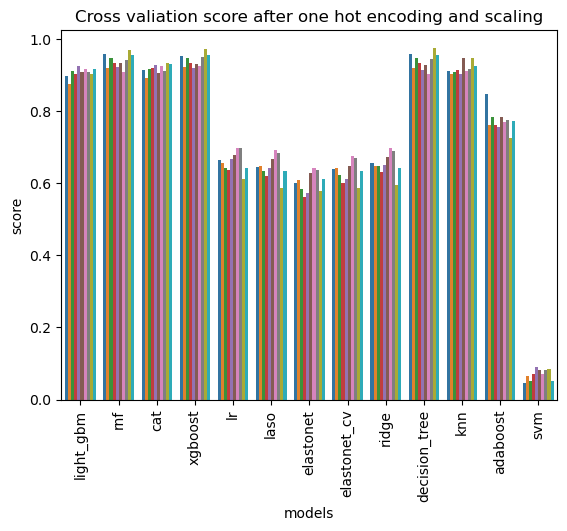

In [98]:
cv_scores_df_with_sc_melt = cv_scores_df_with_sc.melt(id_vars='models', value_vars= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]   )
b = sns.barplot(x='models', y='value', hue = 'variable', data=cv_scores_df_with_sc_melt )
b.set_xticklabels(b.get_xticklabels(), rotation=90);
b.set_ylabel('score')
b.legend_.remove()
b.set_title('Cross valiation score after one hot encoding and scaling')

# With OHE without scaling

In [100]:
cv_score_with_OHE_no_scalling = pd.read_csv("with OHE without scaling.csv")

In [101]:
cv_score_with_OHE_no_scalling

,0,1,2,3,4,5,6,7,8,9,models
0,0.919066,0.886177,0.913327,0.890234,0.889475,0.901032,0.904798,0.914289,0.905846,0.925708,light_gbm
1,0.957651,0.918816,0.946321,0.932773,0.923085,0.931990,0.911713,0.938737,0.966834,0.959163,rnf
2,0.912922,0.890487,0.917828,0.919113,0.926764,0.905286,0.925771,0.912353,0.933010,0.930742,cat
3,0.952070,0.921516,0.946382,0.932883,0.919478,0.930142,0.925580,0.948762,0.970866,0.955890,xgboost
4,0.664159,0.654358,0.658897,0.639010,0.666394,0.677728,0.699425,0.699520,0.610314,0.641405,lr
5,0.641511,0.635636,0.624111,0.607236,0.640670,0.662957,0.683425,0.685797,0.590699,0.624799,laso
6,0.641517,0.635136,0.624062,0.606932,0.640355,0.662738,0.683334,0.685411,0.590745,0.624627,elastonet
7,0.637052,0.633159,0.619754,0.603604,0.638622,0.663535,0.680702,0.683326,0.588795,0.619772,elastonet_cv
8,0.664253,0.654541,0.658716,0.638900,0.666370,0.677896,0.699621,0.699709,0.610523,0.641652,ridge
9,0.959082,0.919256,0.946789,0.934349,0.922111,0.928538,0.898382,0.946281,0.976222,0.956269,decision_tree


In [106]:
cv_score_with_OHE_no_scalling = cv_score_with_OHE_no_scalling.rename(columns={
    '0': 'CV_1',
    '1': 'CV_2',
    '2': 'CV_3',
    '3': 'CV_4',
    '4': 'CV_5',
    '5': 'CV_6',
    '6': 'CV_7',
    '7': 'CV_8',
    '8': 'CV_9',
    '9': 'CV_10',
})

In [108]:
cv_score_with_OHE_no_scalling.columns

Index(['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8', 'CV_9',
       'CV_10', 'models'],
      dtype='object')

In [111]:
cv_score_with_OHE_no_scalling_melt = cv_score_with_OHE_no_scalling.melt(id_vars='models', 
                                                               value_vars= ['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8', 'CV_9',
       'CV_10']   )

In [112]:
cv_score_with_OHE_no_scalling_melt

,models,variable,value
0,light_gbm,CV_1,0.919066
1,rnf,CV_1,0.957651
2,cat,CV_1,0.912922
3,xgboost,CV_1,0.952070
4,lr,CV_1,0.664159
...,...,...,...
125,ridge,CV_10,0.641652
126,decision_tree,CV_10,0.956269
127,knn,CV_10,0.923695
128,adaboost,CV_10,0.804375


Text(0.5, 1.0, 'Cross valiation score after one hot encoding without scaling')

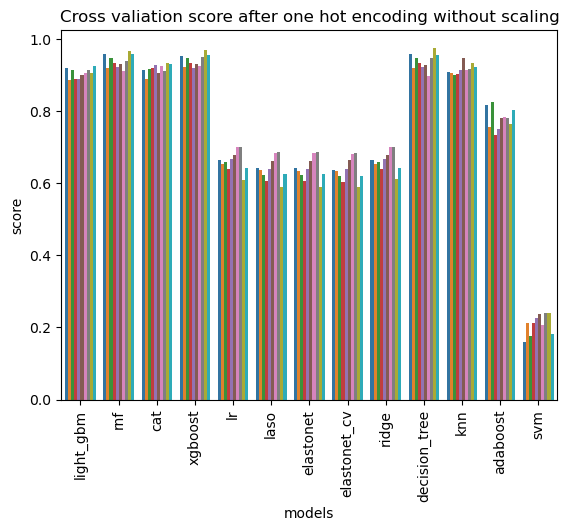

In [144]:
c = sns.barplot(x='models', y='value', hue = 'variable', data=cv_score_with_OHE_no_scalling_melt )
c.set_xticklabels(c.get_xticklabels(), rotation=90);
c.set_ylabel('score')
c.legend_.remove()
c.set_title('Cross valiation score after one hot encoding without scaling')

# CV score with only warp count OHE

In [119]:
cv_OHE_only_warp_cout= pd.read_csv('CV-score-with-OHE only one categorical colum-warp count.csv')

In [128]:
cv_OHE_only_warp_cout.drop('Mean', axis=1, inplace= True)

In [139]:
cv_OHE_only_warp_cout= cv_OHE_only_warp_cout.drop(13, axis=0)

In [140]:
cv_OHE_only_warp_cout_melt = cv_OHE_only_warp_cout.melt(id_vars='models', 
                                value_vars= ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']   )

In [149]:
cv_OHE_only_warp_cout_melt[['variable','value']] = cv_OHE_only_warp_cout_melt[['variable','value']].astype(float)

Text(0.5, 1.0, 'CV-score-with-OHE only one categorical colum')

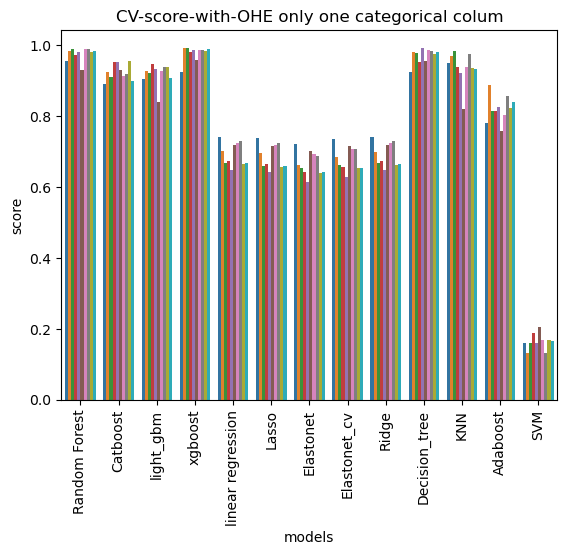

In [153]:
d = sns.barplot(x='models', y='value', hue = 'variable', data=cv_OHE_only_warp_cout_melt, errorbar=None )
d.set_xticklabels(d.get_xticklabels(), rotation=90);
d.set_ylabel('score')
d.legend_.remove()
d.set_title('CV-score-with-OHE only one categorical colum')

# visualization

In [1]:
import pandas as pd

In [77]:
d = pd.read_csv('CV-all-okay---.csv')

In [78]:
with_out_scaling = d.iloc[0:12, :]

In [79]:
with_scaling = d.iloc[14:, :]

In [80]:
d2 = pd.concat([with_scaling, with_out_scaling], keys=['scaled', 'with out scaled'])

In [81]:
d2.models

scaled           14        Random Forest
                 15             Catboost
                 16            light_gbm
                 17              xgboost
                 18    linear regression
                 19                Lasso
                 20            Elastonet
                 21         Elastonet_cv
                 22                Ridge
                 23        Decision_tree
                 24                  KNN
                 25             Adaboost
                 26                  SVM
with out scaled  0         Random Forest
                 1              Catboost
                 2             light_gbm
                 3               xgboost
                 4     linear regression
                 5                 Lasso
                 6             Elastonet
                 7          Elastonet_cv
                 8                 Ridge
                 9         Decision_tree
                 10                  KNN
                

In [82]:
d3 = d2.reset_index()

In [83]:
d3['level_1'] = d3.models

In [84]:
d4= d3.drop('models', axis=1)

In [85]:
d4['index'] = d3['level_0'] +'_'+ d3['level_1']
# d4

In [86]:
import seaborn as sns

In [88]:
d5= d4.melt(id_vars='index', value_vars=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], )

In [100]:
d4= d4.rename(columns={'level_0': 'Scaling', 'level_1': 'Algorithms'})

In [101]:
d4.head()

,Scaling,Algorithms,0,1,2,3,4,5,6,7,8,9,Mean,index
0,scaled,Random Forest,0.956097194,0.984867,0.989701,0.970520,0.979354,0.931479,0.989040,0.991334,0.983029,0.984728,0.976015,scaled_Random Forest
1,scaled,Catboost,0.892214094,0.924444,0.910316,0.951999,0.953047,0.930616,0.914382,0.919393,0.955160,0.898209,0.924978,scaled_Catboost
2,scaled,light_gbm,0.897425726,0.922892,0.919599,0.954547,0.939939,0.866795,0.926926,0.931476,0.945380,0.893284,0.919826,scaled_light_gbm
3,scaled,xgboost,0.924373225,0.993285,0.992800,0.981458,0.987239,0.958999,0.987755,0.986792,0.982967,0.989911,0.978558,scaled_xgboost
4,scaled,linear regression,0.742418546,0.700871,0.667498,0.673742,0.648562,0.719458,0.724211,0.731188,0.664248,0.666962,0.693916,scaled_linear regression


In [102]:
d6 = d4.melt(id_vars=['Scaling', 'Algorithms'], value_vars=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] )
d6['value']= d6['value'].astype(float)

In [90]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'score')

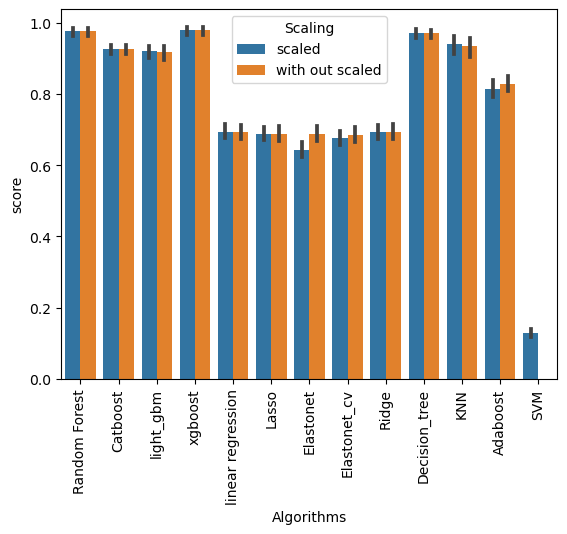

In [106]:
a = sns.barplot(x='Algorithms', y = 'value', data=d6, hue = 'Scaling' )
a.set_xticklabels(a.get_xticklabels(), rotation=90);
a.set_ylabel('score')